Calculate the theoretical bright/dark state fidelity for barium-133 using different state detection schemes. Compare with calcium for electron shelving and ytterbium for standard readout.

First, following the Roos thesis I will try to reproduce his plots for calcium

In [2]:
# Need the error function for calculating probability. Grabbed this off the internet a long time ago.
# Standard erf cannot intake array of data, found this online and modified

def erf(z):
    t = 1.0 / (1.0 + 0.5 * abs(z))
    # use Horner's method
    ans = 1 - t * np.exp( -z*z -  1.26551223 +
                            t * ( 1.00002368 +
                            t * ( 0.37409196 + 
                            t * ( 0.09678418 + 
                            t * (-0.18628806 + 
                            t * ( 0.27886807 + 
                            t * (-1.13520398 + 
                            t * ( 1.48851587 + 
                            t * (-0.82215223 + 
                            t * ( 0.17087277))))))))))
    for i in range(len(z)):
        if z[i] < 0.0:
            ans[i] = -1*ans[i]
    return ans

If the D5/2 has an infinite lifetime, then the probability of detecting less photons than the set threshold $\sigma$ with an average number of collected photons $\bar{s}$ is:<br><br>
$\Large p(s < \sigma) = \frac{1}{2}(1-erf(\frac{\bar{s}-\sigma}{\sqrt{2\bar{s}}}))$<br><br>
Sigma is chosen so that the error of detecting the atom in the dark state is the same as the error of detecting the atom in the bright state (maximizing fidelity).
<br><br>
$\Large p(n > \sigma) = p(s < \sigma)$<br><br>
which is equivalent to:<br><br>
$\Large \frac{\sigma - \bar{n}}{\sqrt{\bar{n}}} = \frac{\bar{s} - \sigma}{\sqrt{\bar{s}}}$<br><br>
$\Large \sigma = \sqrt{\bar{s}\bar{n}}$

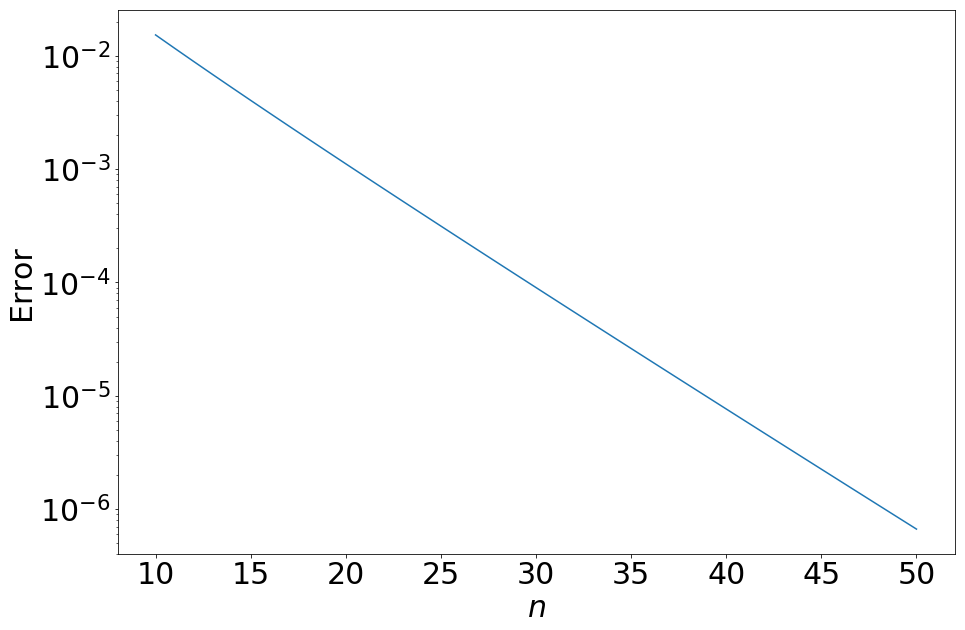

In [4]:
rcParams['figure.figsize'] = (15,10)
# In first part of the Roos appendix he calculates the reduction in error for an infinite upperstate lifetime
# and a signal to noise of 10


sbar = np.linspace(10,50,41)
# Define a signal to noise of 10
sigma = np.sqrt(sbar**2/10)

p = .5*(1-erf((sbar-sigma)/np.sqrt(2*sbar)))

semilogy(sbar,p)
xlabel(r'$n$', fontsize = 30)
ylabel('Error', fontsize = 30)
xticks(fontsize = 30)
yticks(fontsize = 30)
show()

As in Roos's thesis there is a $10^{-6}$ reduction in error when the average number of photons are increased by counting for longer. Again, this assumes an infinite lifetime.

Next look at error when the lifetime is finite.

The probability density function that the ion will decay is given by an exponential, where $\mathcal{T}$ is the lifetime of the upper state.<br><br>

$\Large{w(t) = \frac{1}{\mathcal{T}}e^{-\frac{t}{\mathcal{T}}}}$

The probability of detecting the ion in the $S_{1/2}$ state if it was prepared in the dark state ($D_{5/2}$) is given by:

$\large{p (n > \sigma) = \int^\tau_0 p(n > \sigma | t) \ w(t) \ dt + p (n_\infty > \sigma)\int_\tau^\infty \ w(t) \ dt}$

This equation has two terms corresponding to the decay happening during the detection time (first term), and the decay happening after the detection time (second term). $n_\infty$ is the number of counts detected if the upper state lifetime was infinite. $p(n > \sigma | t)$ is the probability of an error given the decay happened at time t during the detection time.

So to summarize, the probability of detecting n photons greater than the threshold $p(n > \sigma)$ is given by the probability that the ion decays during the detection time, weighted by the probability of an error due to decay at each time t $p(n > \sigma | t)$, plus the probability the ion does not decay during the detection time, weighted by the probability of detecting an error if the lifetime was infinite $p(n_\infty > \sigma)$.

For $\tau \ll \mathcal{T}$ the probability is:

$\large{p (n > \sigma) \approx \frac{1}{\mathcal{T}} \int^\tau_0 p(n > \sigma | t) \ dt + p (n_\infty > \sigma) (1-\frac{\tau}{\mathcal{T}}) }$

If the decay happens at time $t \lt \tau$ than you can introduce the number of counts as:

$\large n_t = n_{\infty}\frac{t}{\tau} + s\frac{\tau - t}{\tau}$

$n_t$ we assume has a Gaussian distribution and the mean value is given by $ \bar{n}_t = n_{\infty}\frac{t}{\tau} + \bar{s}\frac{\tau - t}{\tau}$

Now, from here you can use the error function to sum the probabilities at each time "t" to get the total probability $ p (n > \sigma \ |  \ t)$. However, if the average number of counts is large compared to the threshold, then fluctuations due to shot noise $\sqrt{\bar {s}}$ won't change the probability significantly as a function of time. The probability will be essentially one until some time $t_{\sigma}$ after which it is zero. Meaning if we set $n_t = \sigma$ and solve we see:

$\Large t_{\sigma} = \frac{\tau}{T}\frac{\bar{s}-\sigma}{\bar{s} - \bar{n_\infty}}$

So it is seen if the condition $\bar{s} - \sigma \gg \sqrt{\bar{s}}$, which is $\bar{s} - \sqrt{\bar{s}} \gg \sigma $  the change in the time it takes to reach the threshold number of counts is negligible for fluctuations in s. So we get $p(n > \sigma |t) = 1 $ for $ t < t_\sigma $ and  $p(n > \sigma)  = 0$ for  $t > t_\sigma $. Integrating we get:

$p(n > \sigma) \approx \frac{\tau}{\mathcal{T}}\frac{\bar{s}-\sigma}{\bar{s}-n_\infty} + p(n_\infty > \sigma)$

Plotting the error probability for calcium and barium show and order of magnitude increase in detectioin fidelity. The dashed line is error for infinite lifetime while the solid is for finite liftime. 

c:\python27\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.
  


Minimum error for calcium: 0.0037
Minimum error for barium: 0.000137
Optimal detection time (ms) : 4.40
Optimal threshold: 4.8


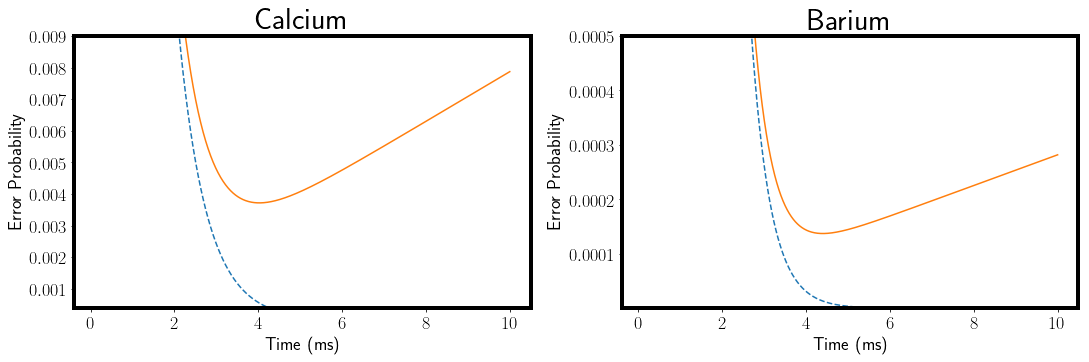

In [175]:
rcParams['figure.figsize'] = (18, 5)
tau = np.linspace(1e-4,10e-3,1e3)

# Calcium, using numbers from Roos appendix
T = 1.045
Rs = 4.3e3 # scattering rate for S state
Rn = 200 # scattering rate for D state
sbar = Rs*tau
ninf = Rn*tau
sigma = np.sqrt(sbar*ninf)

subplot(1,2,1)
pinf = .5*(1-erf((sigma - ninf)/np.sqrt(2*ninf)))
plot(tau*1e3,pinf, '--')
ptau = tau*(sbar-sigma)/T/(sbar-ninf) + (pinf)
print "Minimum error for calcium:", '{:.4f}'.format(np.min(ptau))
ylim([.0004,.009])
xlabel(r'Time (ms)', fontsize = 18)
ylabel('Error Probability', fontsize = 18)
plot(tau*1e3,ptau)
xticks(fontsize = 18)
yticks(fontsize = 18)
title('Calcium', fontsize = 30)



# Barium
T = 30
Rs = 6.0e3 # scattering rate for S state
Rn = 200.0 # scattering rate for D state
sbar = Rs*tau
ninf = Rn*tau
sigma = np.sqrt(sbar*ninf)



subplot(1,2,2)
pinf = .5*(1-erf((sigma - ninf)/np.sqrt(2*ninf)))
plot(tau*1e3,pinf,'--')
ylim([.00001,.008])
ptau = tau*(sbar-sigma)/T/(sbar-ninf) + pinf
ind = np.argmin(ptau)
print "Minimum error for barium:", '{:.6f}'.format(np.amin(ptau))
plot(tau*1e3,ptau)
xlabel(r'Time (ms)', fontsize = 18)
ylabel('Error Probability', fontsize = 18)
title('Barium', fontsize = 30)
xticks(fontsize = 18)
yticks(fontsize = 18)
ylim([.000001,.0005])

print "Optimal detection time (ms) : "'{:.2f}'.format(tau[ind]*1e3)
print "Optimal threshold: "'{:.1f}'.format(np.sqrt(Rs*Rn*tau[ind]**2))

show()

### Use theory from Langer and Burrel

In [6]:
from scipy import special as sp
from scipy.special import gamma, factorial

## input all parameters
t_detection = 4.5e-3 #s
t_D52 = 30.
gammaP = 2*np.pi*20.e6
mean_d = 200. # 200 counts/s
delta_1 = 2*np.pi*30.e6 # detuning when state detecting
s = 1.05 # saturation parameter.
eta_D = 0.2 # PMT QE
SA = 1.e-2 # fraction of solid angle collected
T = .95 # transmission efficiency
eta = eta_D*SA*T
branch_1 = .75 # p1/2 branching to d3/2 last factor
branch_2 = .75
dark_state_frac = .75

r_b =  dark_state_frac*s*gammaP*eta/2*(1/(1+s+4*(delta_1/gammaP)**2))
n_b = dark_state_frac*t_detection*s*gammaP*eta/2*(1/(1+s+4*(delta_1/gammaP)**2))
r_d = mean_d

c = (r_b + r_d)*t_detection/r_b/t_D52



print 'rate bright :', '{:.3f}'.format(r_b)
print 'detected photons :', '{:.3f}'.format(n_b)
print c

rate bright : 8507.888
detected photons : 38.285
0.000153526139591


38.8029444689


c:\python27\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: overflow encountered in power
c:\python27\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in multiply


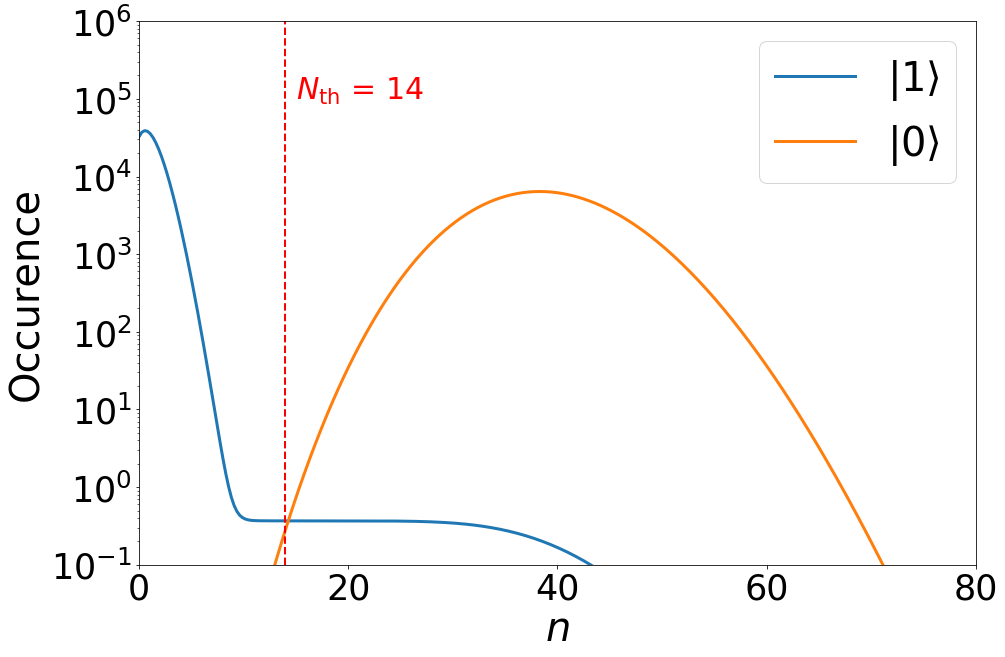

In [7]:
rcParams['figure.figsize'] = (15, 10)
## input all parameters
t_detection = 4.5e-3 #s
t_D52 = 31.5
gammaP = 2*np.pi*20.e6
mean_d = 250.#counts/s
delta_1 = 2*np.pi*30.e6 # detuning when state detecting
s = 1.10 # saturation parameter.
eta_D = 0.2 # PMT QE
SA = 1.e-2 # fraction of solid angle collected
T = .95 # transmission efficiency
eta = eta_D*SA*T
branch_1 = .75 # p1/2 branching to d3/2 last factor
branch_2 = .75
dark_state_frac = .75

r_d = mean_d
r_b =  dark_state_frac*s*gammaP*eta/2*(1/(1+s+4*(delta_1/gammaP)**2)) - r_d
n_b = dark_state_frac*t_detection*s*gammaP*eta/2*(1/(1+s+4*(delta_1/gammaP)**2)) - r_d*t_detection
print n_b

c = (r_b + r_d)*t_detection/r_b/t_D52


n = np.linspace(0,80,300)

def p_bright(n):
    return np.exp(-n_b)*n_b**n/factorial(n)

def p_dark_decay(n):
    return np.exp(-t_detection/t_D52)*(r_d*t_detection)**n*np.exp(-r_d*t_detection)/factorial(n) + \
    np.exp(-c)*(r_b*t_D52)**n/factorial(n)*(r_b*t_D52-1)**(-n-1)*gamma(n+1)*(sp.gammainc(n+1, c*(r_b*t_D52-1))\
                                                - sp.gammainc(n+1,r_d*t_detection*(r_b*t_D52-1)/r_b/t_D52))


p = p_dark_decay(n)*1.e5
p1 = p_bright(n)*1.e5

semilogy(n,p, linewidth = 3, label = r'$\vert 1 \rangle$')
semilogy(n,p1, linewidth = 3 , label = r'$\vert 0 \rangle$')
semilogy([14,14],[1.e-1,1.e6], linestyle='--', linewidth = 2, color = 'r')
ylim([1.e-1,1.e6])

xlabel(r'$n$', fontsize = 40)
ylabel(r'Occurence', fontsize = 40)
tick_params( labelsize = 35)
text(15, 1.e5, r'$N_{\mathrm{th}}$ = 14',fontsize = 30, color = 'r')
legend(loc= 'upper right', fontsize = 40)
xlim([0,80])

#savefig('hist_theory_shelving.png', bbox_inches='tight', transparent = True)
show()


14
4.805475534899489e-05


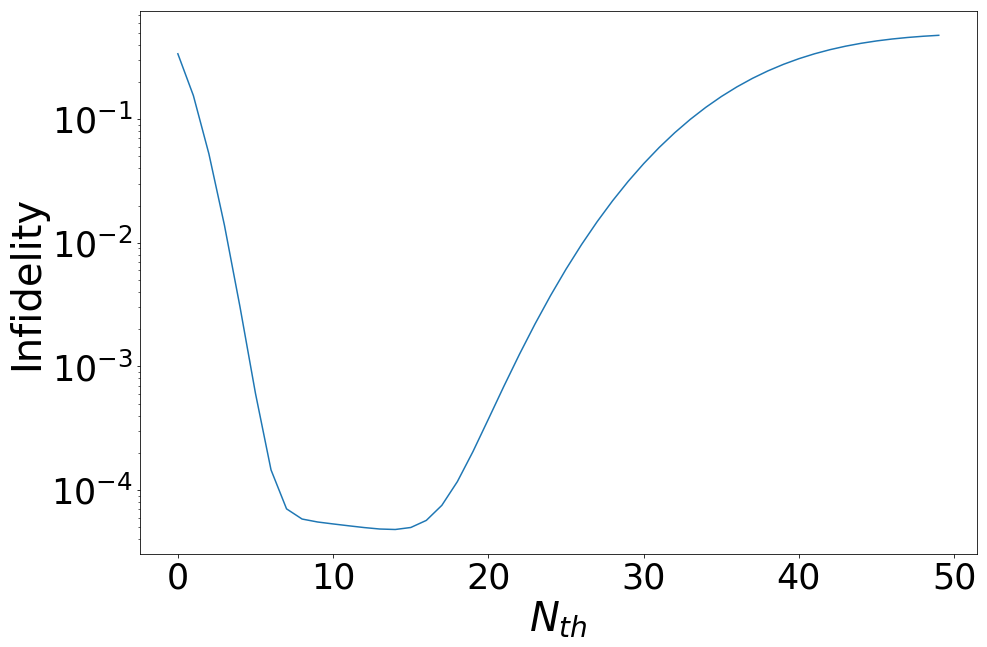

In [8]:
### Now find the discriminator that maximizes the fidelity 

n = np.arange(0,50,1)
pb_tot =np.zeros(len(n))
pd_tot = np.zeros(len(n))

pd = p_dark_decay(n)
pb = p_bright(n)

for i in range(len(n)):
    pb_tot[i] =  np.sum(pb[:i+1])
    pd_tot[i] =  np.sum(pd[:i+1])
  
infid = .5*(1- pd_tot + pb_tot)
ind = np.argmin(infid)
print n[ind]
print infid[ind]
semilogy(n, infid)
xlabel(r'$N_{th}$', fontsize = 40)
ylabel(r'Infidelity', fontsize = 40)
tick_params( labelsize = 35)
show()

### Spin-1/2

Now move to calculating the error in $^{133}\text{Ba}^+$ using the methods outlined in Acton, M. et. al, <i>Near-Perfect simultaneous measurement of a qubit register</i>. The ideas are essentially the same as outlined above, but the probability distributions are not Taylor expanded, and the Poisson distribution is used instead of a Gaussian distribution.  

Following the paper we start with dark state leakage to the bright state. The probability to scatter out of the dark state is given by an exponential decay.

$\Large{w(t) = \frac{1}{\mathcal{T}_L}e^{-\frac{t}{\mathcal{T}_L}}}$

In the paper they define the exponential with an average leak time instead of scattering time, since a scattering event could bring you back to the dark state. They also define the number of detected photons $\lambda_0 = \eta S$, as opposed to scattered photons S. The number of photons detected in any single experiment is given by:

$\Large{\lambda = \lambda_0(1-\frac{t}{\mathcal{T}_L})}$

Using this equation to replace the probability distribution as  function of time, with a probability distribution as a function of Poisson means, the probability of detecting n photons when starting in the dark state is:

$\Large{p_{dark}(n) = e^{-\alpha_1 \lambda_0/\eta}[\delta_n + \frac{\alpha_1/\eta}{(1-\alpha_1/\eta)^{n+1}}P(n+1,(1-\alpha/\eta)\lambda_0)] }$

with $\eta$ given by:

$\Large{\eta = \eta_D\frac{d\Omega}{4\pi}T}$

$\eta$ is the overal efficiency, $\eta_D$ is the detector efficiency, T is the window transmission, and $\frac{d\Omega}{4\pi}$ is the fraction of the solid angle collected.

$\Large{\alpha_1 = \frac{\tau_D\eta}{\mathcal{T}_{L1}\lambda_0}}$

$\alpha$ is defined as the leak probability per emitted photon. I don't see this....

First we need to estimate the total efficiency of our system. When fully saturated, the populations should be eqaul, giving the population in each state to be $\frac{N}{16}$ ($^{133}$Ba$^+$), since we have an sixteen level system. Since there are four states which scatter 493nm light, and the branching ratio of those state is 3:1, the total number of scattered photons when saturated are:

$\Large{\frac{dN}{dt} = (4)(2\pi\frac{\Gamma}{16})(.75)}$

$ = (4)(\frac{2\pi 20MHz}{16})(.75) \approx 2.3x10^7$ 

Since barium is a lambda system, the number of scattered photons is complicated by dark states. We likely lose a factor of 4 or 5 for barium-138 and a factor of 15 for barium-133, but a full calculation is needed. The efficiency is  

In [10]:
## input all parameters
t_detection = 4.5e-3 #s
gamma = 2*np.pi*20.e6
HF1  = 2*np.pi*9925.464e6
HF2 = 2*np.pi*1840.e6
delta_1 = 2*np.pi*30.e6 # detuning when state detecting
s = .1 # saturation parameter.
eta_D = 0.2 # PMT QE
SA = 1.e-2 # fraction of solid angle collected
T = .95 # transmission efficiency
eta = eta_D*SA*T
branch_1 = 2./9*.75 # p1/2 branching to d3/2 last factor
branch_2 = 2./9*.75

n_b = s*gamma*t_detection*eta/2*(1/(1+s+4*(delta_1/gamma)**2))

alpha1 = branch_1*(1 + s + (2*delta_1/gamma)**2)*(gamma/2/(HF1+HF2))**2
alpha2 = branch_2*(1 + s + (2*delta_1/gamma)**2)*(gamma/2/(HF2))**2


print 'n collected photons :', '{:.3f}'.format(eta)
print '{:.3e}'.format(alpha1)


n collected photons : 0.002
1.216e-06


In [2]:
# Now calculate fidelity
from scipy import special as sp
from scipy.special import factorial

n_b = s*gamma*t_detection*eta/2*(1/(1+s+4*(delta_1/gamma)**2))
alpha1 = branch_1*(1 + s + (2*delta_1/gamma)**2)*(gamma/2/(HF1+HF2))**2
alpha2 = branch_2*(1 + s + (2*delta_1/gamma)**2)*(gamma/2/(HF2))**2


def pdark(n):
    if n == 0:
        return np.exp(-alpha1*n_b/eta)*( 1 +  (alpha1/eta)/(1-alpha1/eta)**(n+1)*sp.gammainc(1, (1-alpha1/eta)*n_b))
        
    else:
        return np.exp(-alpha1*n_b/eta)*((alpha1/eta)/(1-alpha1/eta)**(n+1)*sp.gammainc(n + 1, (1-alpha1/eta)*n_b))


def pbright(n):
    return np.exp(-(1+alpha2/eta)*n_b)*n_b**2/factorial(n) + (alpha2/eta)/(1+alpha2/eta)**(n+1)*sp.gammainc((n+1), (1+alpha2/eta)*n_b)
    
n = 0 
        
print 'P dark :', '{:.2e}'.format(pdark(n))
print 'P bright :', '{:.2e}'.format(pbright(n))

P dark : 9.97e-01
P bright : 1.46e-01


alpha 1 : 1.216e-06
n_b : 5.319e+00
0.9972366493536133 0.0006188458031511977
alpha 1 : 1.240e-06
n_b : 1.565e+01
fidelity : 9.82e-01
fidelity : 9.70e-01
fidelity : 9.58e-01
alpha 1 : 1.264e-06
n : 2.558e+01


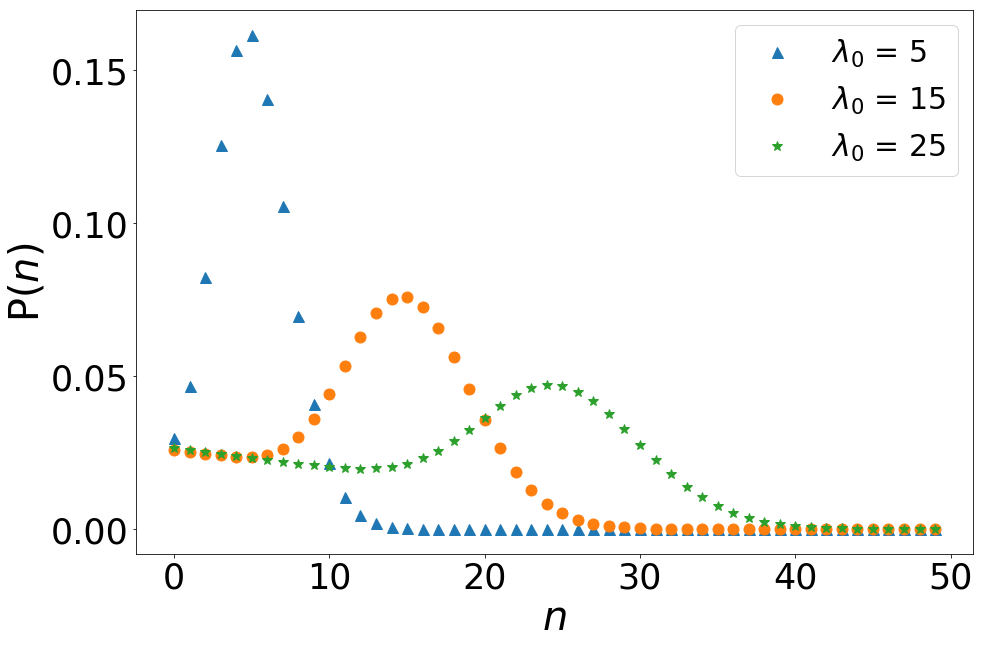

In [63]:
rcParams["figure.figsize"] = 15, 10
rcParams["text.usetex"] = False
## make some plots
t_detection = 4.5e-3 #s
gamma = 2*np.pi*20.e6
HF1  = 2*np.pi*9925.464e6
HF2 = 2*np.pi*1840.e6
delta_1 = 2*np.pi*30.e6 # detuning when state detecting
s = .1 # saturation parameter.
eta_D = 0.2 # PMT QE
SA = 1.e-2 # fraction of solid angle collected
T = .95 # transmission efficiency
eta = eta_D*SA*T
branch_1 = 2./9*.75 # p1/2 branching to d3/2 last factor
branch_2 = 2./9*.75



n_b = s*gamma*t_detection*eta/2*(1/(1+s+4*(delta_1/gamma)**2))
alpha1 = branch_1*(1 + s + (2*delta_1/gamma)**2)*(gamma/2/(HF1+HF2))**2
alpha2 = branch_2*(1 + s + (2*delta_1/gamma)**2)*(gamma/2/(HF2))**2

print 'alpha 1 :', '{:.3e}'.format(alpha1)
print 'n_b :', '{:.3e}'.format(n_b)

# use these values to compare with paper
#n_b = 12.
#alpha1 = .05*eta
#alpha2 = .05*eta

n = np.arange(0,50,1)

def pdark(n):
    if n == 0:
        return np.exp(-alpha1*n_b/eta)*( 1 +  (alpha1/eta)/(1-alpha1/eta)**(n+1)*sp.gammainc(1, (1-alpha1/eta)*n_b))
        
    else:
        return np.exp(-alpha1*n_b/eta)*((alpha1/eta)/(1-alpha1/eta)**(n+1)*sp.gammainc(n + 1, (1-alpha1/eta)*n_b))


def pbright(n):
    return np.exp(-(1+alpha2/eta)*n_b)*n_b**n/factorial(n) + (alpha2/eta)/(1+alpha2/eta)**(n+1)*sp.gammainc((n+1), (1+alpha2/eta)*n_b)
    

pb = np.zeros(len(n))
pd = np.zeros(len(n))

for i in range(len(n)):
    pb[i] = pbright(n[i])
    pd[i] = pdark(n[i]) 


pb_tot =np.zeros(len(n))
pd_tot = np.zeros(len(n))

for i in range(len(n)):
    pb_tot[i] =  np.sum(pb[:i+1])
    pd_tot[i] =  np.sum(pd[:i+1])
  
print pd[0], pd[1]
    
plot(n, pb, '^',linewidth = 3, label= r'$\lambda_0$ = ' + str(int(n_b)), markersize = 11)
#plot(n, pd,'o', color = 'b')
#xlim([0,2])
#ylim([0,.12])

## make some plots
t_detection = 4.5e-3 #s
gamma = 2*np.pi*20.e6
HF1  = 2*np.pi*9925.464e6
HF2 = 2*np.pi*1840.e6
delta_1 = 2*np.pi*30.e6 # detuning when state detecting
s = .3 # saturation parameter.
eta_D = 0.2 # PMT QE
SA = 1.e-2 # fraction of solid angle collected
T = .95 # transmission efficiency
eta = eta_D*SA*T
branch_1 = 2./9*.75 # p1/2 branching to d3/2 last factor
branch_2 = 2./9*.75



n_b = s*gamma*t_detection*eta/2*(1/(1+s+4*(delta_1/gamma)**2))
alpha1 = branch_1*(1 + s + (2*delta_1/gamma)**2)*(gamma/2/(HF1+HF2))**2
alpha2 = branch_2*(1 + s + (2*delta_1/gamma)**2)*(gamma/2/(HF2))**2

print 'alpha 1 :', '{:.3e}'.format(alpha1)
print 'n_b :', '{:.3e}'.format(n_b)


# use these values to compare with paper
#n_b = 12.
#alpha1 = .05*eta
#alpha2 = .05*eta

#n = np.arange(0,30)

def pdark(n):
    if n == 0:
        return np.exp(-alpha1*n_b/eta)*( 1 +  (alpha1/eta)/(1-alpha1/eta)**(n+1)*sp.gammainc(1, (1-alpha1/eta)*n_b))
        
    else:
        return np.exp(-alpha1*n_b/eta)*((alpha1/eta)/(1-alpha1/eta)**(n+1)*sp.gammainc(n + 1, (1-alpha1/eta)*n_b))


def pbright(n):
    return np.exp(-(1+alpha2/eta)*n_b)*n_b**n/factorial(n) + (alpha2/eta)/(1+alpha2/eta)**(n+1)*sp.gammainc((n+1), (1+alpha2/eta)*n_b)
    

pb = np.zeros(len(n))
pd = np.zeros(len(n))

for i in range(len(n)):
    pb[i] = pbright(n[i])
    pd[i] = pdark(n[i]) 


pb_tot =np.zeros(len(n))
pd_tot = np.zeros(len(n))

for i in range(len(n)):
    pb_tot[i] =  np.sum(pb[:i+1])
    pd_tot[i] =  np.sum(pd[:i+1])


plot(n, pb, 'o', linewidth = 3, label= r'$\lambda_0$ = ' + str(int(n_b)), markersize = 11)    
    
fid0 = (pd[0] + (1 - pb[0]))/2
fid1 = (pd[0] + pd[1] + (1 - pb[0] - pb[1]))/2
fid2 = (pd[0] + pd[1] + pd[2] + (1 - pb[0] - pb[1] - pb[2]))/2

print 'fidelity :', '{:.2e}'.format(fid0)
print 'fidelity :', '{:.2e}'.format(fid1)
print 'fidelity :', '{:.2e}'.format(fid2)

#print 'P dark :', '{:.2e}'.format(pdark(0))
#print 'P bright :', '{:.2e}'.format(pbright(0))


## make some plots
t_detection = 4.5e-3 #s
gamma = 2*np.pi*20.e6
HF1  = 2*np.pi*9925.464e6
HF2 = 2*np.pi*1840.e6
delta_1 = 2*np.pi*30.e6 # detuning when state detecting
s = .5 # saturation parameter.
eta_D = 0.2 # PMT QE
SA = 1.e-2 # fraction of solid angle collected
T = .95 # transmission efficiency
eta = eta_D*SA*T
branch_1 = 2./9*.75 # p1/2 branching to d3/2 last factor
branch_2 = 2./9*.75



n_b = s*gamma*t_detection*eta/2*(1/(1+s+4*(delta_1/gamma)**2))
alpha1 = branch_1*(1 + s + (2*delta_1/gamma)**2)*(gamma/2/(HF1+HF2))**2
alpha2 = branch_2*(1 + s + (2*delta_1/gamma)**2)*(gamma/2/(HF2))**2


print 'alpha 1 :', '{:.3e}'.format(alpha1)
print 'n :', '{:.3e}'.format(n_b)

# use these values to compare with paper
#n_b = 12.
#alpha1 = .05*eta
#alpha2 = .05*eta

#n = np.arange(0,30)

def pdark(n):
    if n == 0:
        return np.exp(-alpha1*n_b/eta)*( 1 +  (alpha1/eta)/(1-alpha1/eta)**(n+1)*sp.gammainc(1, (1-alpha1/eta)*n_b))
        
    else:
        return np.exp(-alpha1*n_b/eta)*((alpha1/eta)/(1-alpha1/eta)**(n+1)*sp.gammainc(n + 1, (1-alpha1/eta)*n_b))


def pbright(n):
    return np.exp(-(1+alpha2/eta)*n_b)*n_b**n/factorial(n) + (alpha2/eta)/(1+alpha2/eta)**(n+1)*sp.gammainc((n+1), (1+alpha2/eta)*n_b)
    

pb = np.zeros(len(n))
pd = np.zeros(len(n))

for i in range(len(n)):
    pb[i] = pbright(n[i])
    pd[i] = pdark(n[i]) 


pb_tot =np.zeros(len(n))
pd_tot = np.zeros(len(n))

for i in range(len(n)):
    pb_tot[i] =  np.sum(pb[:i+1])
    pd_tot[i] =  np.sum(pd[:i+1])


plot(n, pb, '*', linewidth = 3, label= r'$\lambda_0$ = ' + str(int(n_b)), markersize = 11)
legend(loc= 'upper right', fontsize = 30)

xlabel(r'$n$', fontsize = 40)
ylabel(r'P($n$)', fontsize = 40)
tick_params( labelsize = 35)


#savefig('p_bright_theory_spam.pdf', bbox_inches='tight')
show()


alpha 1 : 1.216e-06
avg collected photons : 5.319e+00
alpha 1 : 1.240e-06
avg collected photons : 1.565e+01
fidelity : 9.82e-01
fidelity : 9.70e-01
fidelity : 9.58e-01
alpha 1 : 1.264e-06
n_b: 2.558e+01
0.983122732675746
0.983777313279347
[0.00065458 0.00065502 0.00065545 0.00065589 0.00065633 0.00065676
 0.0006572  0.00065763 0.00065804 0.00065841 0.00065868 0.00065872
 0.00065831 0.00065708 0.00065447 0.00064971 0.00064183 0.00062975
 0.0006124  0.00058888 0.00055866 0.00052175 0.00047874 0.00043083
 0.00037972 0.00032738 0.00027584 0.000227   0.00018235 0.00014296]


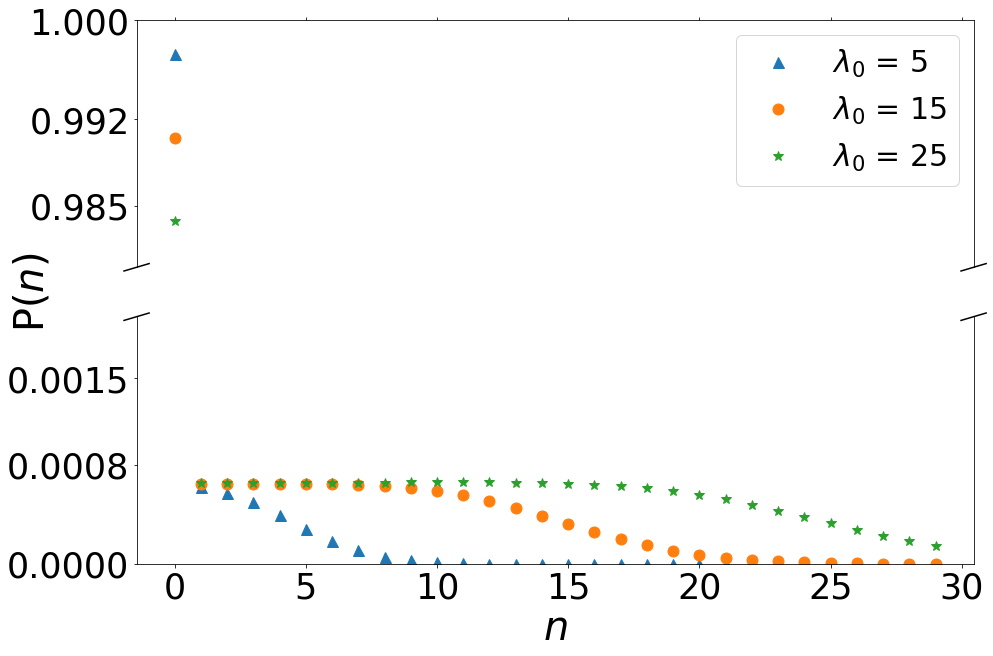

In [69]:
rcParams["figure.figsize"] = 15, 10
## make some plots
t_detection = 4.5e-3 #s
gamma = 2*np.pi*20.e6
HF1  = 2*np.pi*9925.464e6
HF2 = 2*np.pi*1840.e6
delta_1 = 2*np.pi*30.e6 # detuning when state detecting
s = .1 # saturation parameter.
eta_D = 0.2 # PMT QE
SA = 1.e-2 # fraction of solid angle collected
T = .95 # transmission efficiency
eta = eta_D*SA*T
branch_1 = 2./9*.75 # p1/2 branching to d3/2 last factor
branch_2 = 2./9*.75



n_b = s*gamma*t_detection*eta/2*(1/(1+s+4*(delta_1/gamma)**2))
alpha1 = branch_1*(1 + s + (2*delta_1/gamma)**2)*(gamma/2/(HF1+HF2))**2
alpha2 = branch_2*(1 + s + (2*delta_1/gamma)**2)*(gamma/2/(HF2))**2

print 'alpha 1 :', '{:.3e}'.format(alpha1)
print 'avg collected photons :', '{:.3e}'.format(n_b)

# use these values to compare with paper
#n_b = 12.
#alpha1 = .05*eta
#alpha2 = .05*eta

n = np.arange(0,30,1)

def pdark(n):
    if n == 0:
        return np.exp(-alpha1*n_b/eta)*( 1 +  (alpha1/eta)/(1-alpha1/eta)**(n+1)*sp.gammainc(1, (1-alpha1/eta)*n_b))
        
    else:
        return np.exp(-alpha1*n_b/eta)*((alpha1/eta)/(1-alpha1/eta)**(n+1)*sp.gammainc(n + 1, (1-alpha1/eta)*n_b))


def pbright(n):
    return np.exp(-(1+alpha2/eta)*n_b)*n_b**n/factorial(n) + (alpha2/eta)/(1+alpha2/eta)**(n+1)*sp.gammainc((n+1), (1+alpha2/eta)*n_b)
    

pb = np.zeros(len(n))
pd = np.zeros(len(n))

for i in range(len(n)):
    pb[i] = pbright(n[i])
    pd[i] = pdark(n[i]) 


pb_tot =np.zeros(len(n))
pd_tot = np.zeros(len(n))

for i in range(len(n)):
    pb_tot[i] =  np.sum(pb[:i+1])
    pd_tot[i] =  np.sum(pd[:i+1])
  

# set up plotting with broken axis
f, (ax, ax2) = plt.subplots(2, 1, sharex=True)

ax.plot(n[0], pd[0], '^',  linewidth = 3, label= r'$\lambda_0$ = ' + str(int(n_b)), markersize = 11)
ax2.plot(n[1:], pd[1:], '^',  linewidth = 3, label= r'$\lambda_0$ = ' + str(int(n_b)), markersize = 11)
#plot(n, pd,'o', color = 'b')
#xlim([0,2])
#ylim([0,.12])

ax.set_ylim(.98, 1.)  # outliers only
ax.set_yticks([0.985,0.992, 1.0])
ax2.set_ylim(0, .002)
ax2.set_yticks([0, 0.0008, .0015])
ax.tick_params(axis='y',labelsize = 35)

# hide the spines between ax and ax2
ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax.xaxis.tick_top()
ax.tick_params(labeltop='off')  # don't put tick labels at the top
ax2.xaxis.tick_bottom()


d = .015  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal


t_detection = 4.5e-3 #s
gamma = 2*np.pi*20.e6
HF1  = 2*np.pi*9925.464e6
HF2 = 2*np.pi*1840.e6
delta_1 = 2*np.pi*30.e6 # detuning when state detecting
s = .3 # saturation parameter.
eta_D = 0.2 # PMT QE
SA = 1.e-2 # fraction of solid angle collected
T = .95 # transmission efficiency
eta = eta_D*SA*T
branch_1 = 2./9*.75 # p1/2 branching to d3/2 last factor
branch_2 = 2./9*.75



n_b = s*gamma*t_detection*eta/2*(1/(1+s+4*(delta_1/gamma)**2))
alpha1 = branch_1*(1 + s + (2*delta_1/gamma)**2)*(gamma/2/(HF1+HF2))**2
alpha2 = branch_2*(1 + s + (2*delta_1/gamma)**2)*(gamma/2/(HF2))**2

print 'alpha 1 :', '{:.3e}'.format(alpha1)
print 'avg collected photons :', '{:.3e}'.format(n_b)


# use these values to compare with paper
#n_b = 12.
#alpha1 = .05*eta
#alpha2 = .05*eta

#n = np.arange(0,30)

def pdark(n):
    if n == 0:
        return np.exp(-alpha1*n_b/eta)*( 1 +  (alpha1/eta)/(1-alpha1/eta)**(n+1)*sp.gammainc(1, (1-alpha1/eta)*n_b))
        
    else:
        return np.exp(-alpha1*n_b/eta)*((alpha1/eta)/(1-alpha1/eta)**(n+1)*sp.gammainc(n + 1, (1-alpha1/eta)*n_b))


def pbright(n):
    return np.exp(-(1+alpha2/eta)*n_b)*n_b**n/factorial(n) + (alpha2/eta)/(1+alpha2/eta)**(n+1)*sp.gammainc((n+1), (1+alpha2/eta)*n_b)
    

pb = np.zeros(len(n))
pd = np.zeros(len(n))

for i in range(len(n)):
    pb[i] = pbright(n[i])
    pd[i] = pdark(n[i]) 


pb_tot =np.zeros(len(n))
pd_tot = np.zeros(len(n))

for i in range(len(n)):
    pb_tot[i] =  np.sum(pb[:i+1])
    pd_tot[i] =  np.sum(pd[:i+1])


ax.plot(n[0], pd[0], 'o',  linewidth = 3, label= r'$\lambda_0$ = ' + str(int(n_b)), markersize = 11)
ax2.plot(n[1:], pd[1:], 'o',  linewidth = 3, label= r'$\lambda_0$ = ' + str(int(n_b)), markersize = 11)
    
fid0 = (pd[0] + (1 - pb[0]))/2
fid1 = (pd[0] + pd[1] + (1 - pb[0] - pb[1]))/2
fid2 = (pd[0] + pd[1] + pd[2] + (1 - pb[0] - pb[1] - pb[2]))/2

print 'fidelity :', '{:.2e}'.format(fid0)
print 'fidelity :', '{:.2e}'.format(fid1)
print 'fidelity :', '{:.2e}'.format(fid2)

#print 'P dark :', '{:.2e}'.format(pdark(0))
#print 'P bright :', '{:.2e}'.format(pbright(0))


## make some plots
t_detection = 4.5e-3 #s
gamma = 2*np.pi*20.e6
HF1  = 2*np.pi*9925.464e6
HF2 = 2*np.pi*1840.e6
delta_1 = 2*np.pi*30.e6 # detuning when state detecting
s =.5# saturation parameter.
eta_D = 0.2 # PMT QE
SA = 1.e-2 # fraction of solid angle collected
T = .95 # transmission efficiency
eta = eta_D*SA*T
branch_1 = 2./9*.75 # p1/2 branching to d3/2 last factor
branch_2 = 2./9*.75



n_b = s*gamma*t_detection*eta/2*(1/(1+s+4*(delta_1/gamma)**2))
alpha1 = branch_1*(1 + s + (2*delta_1/gamma)**2)*(gamma/2/(HF1+HF2))**2
alpha2 = branch_2*(1 + s + (2*delta_1/gamma)**2)*(gamma/2/(HF2))**2


print 'alpha 1 :', '{:.3e}'.format(alpha1)
print 'n_b:', '{:.3e}'.format(n_b)

# use these values to compare with paper
#n_b = 12.
#alpha1 = .05*eta
#alpha2 = .05*eta

#n = np.arange(0,30)

def pdark(n):
    if n == 0:
        return np.exp(-alpha1*n_b/eta)*( 1 +  (alpha1/eta)/(1-alpha1/eta)**(n+1)*sp.gammainc(1, (1-alpha1/eta)*n_b))
        
    else:
        return np.exp(-alpha1*n_b/eta)*((alpha1/eta)/(1-alpha1/eta)**(n+1)*sp.gammainc(n + 1, (1-alpha1/eta)*n_b))


def pbright(n):
    return np.exp(-(1+alpha2/eta)*n_b)*n_b**n/factorial(n) + (alpha2/eta)/(1+alpha2/eta)**(n+1)*sp.gammainc((n+1), (1+alpha2/eta)*n_b)
    

pb = np.zeros(len(n))
pd = np.zeros(len(n))

for i in range(len(n)):
    pb[i] = pbright(n[i])
    pd[i] = pdark(n[i]) 


pb_tot =np.zeros(len(n))
pd_tot = np.zeros(len(n))

for i in range(len(n)):
    pb_tot[i] =  np.sum(pb[:i+1])
    pd_tot[i] =  np.sum(pd[:i+1])


ax.plot(n[0], pd[0], '*', linewidth = 3, label= r'$\lambda_0$ = ' + str(int(n_b)), markersize = 11)
ax2.plot(n[1:], pd[1:], '*', linewidth = 3, label= r'$\lambda_0$ = ' + str(int(n_b)), markersize = 11)
ax.legend(loc= 'upper right', fontsize = 30)

ax2.set_xlabel(r'$n$', fontsize = 40)
ax.set_ylabel(r'P($n$)', fontsize = 40)
tick_params( labelsize = 35)
ax.yaxis.set_label_coords(-0.1,-.1)
#ylim([0,1])
#savefig('p_dark_theory_spam.pdf', bbox_inches='tight')

show()


0.9849190348615314
0.9719371837473338
[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45]
[ 0.          2.67269823  5.3189341   7.93909868 10.53357537 13.10274009
 15.64696147 18.166601   20.66201322 23.1335459 ]


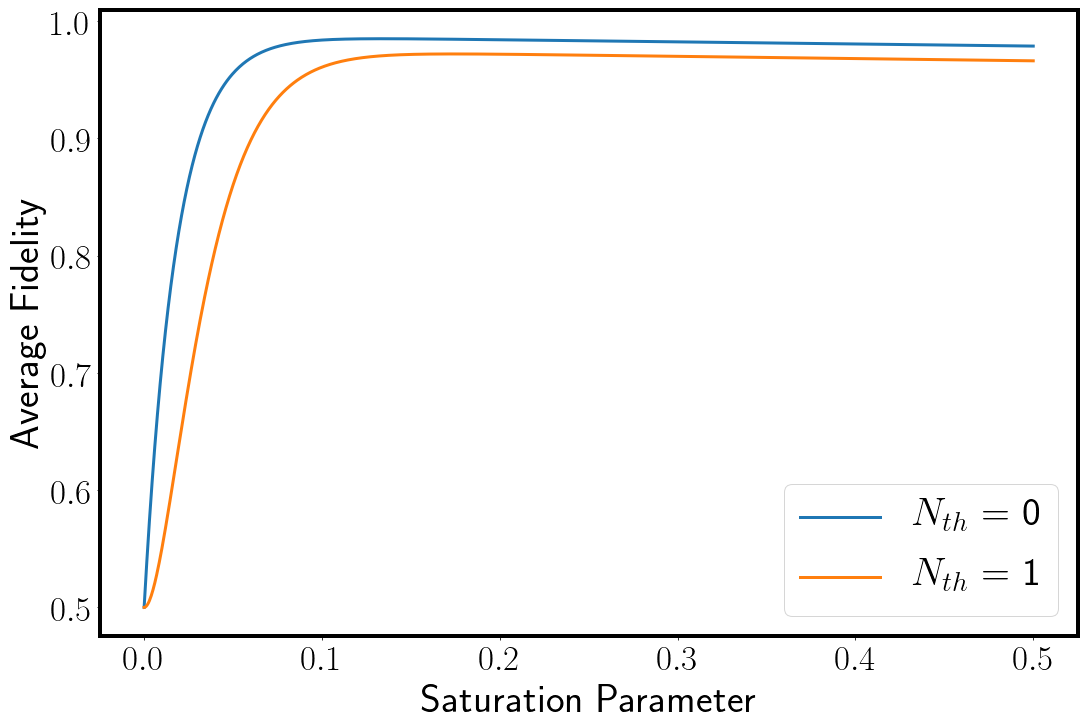

In [276]:
### What is the maxium for our experiment?
rcParams['axes.linewidth'] = 4
rcParams["figure.figsize"] = 15, 10
import matplotlib.pyplot as plt
from matplotlib.transforms import Transform
from matplotlib.ticker import (
    AutoLocator, AutoMinorLocator)

t_detection = 4.5e-3 #s
gamma = 2*np.pi*20.e6
HF1  = 2*np.pi*9925.464e6
HF2 = 2*np.pi*1840.e6
delta_1 = 2*np.pi*30.e6 # detuning when state detecting
s = .1 # saturation parameter.
eta_D = 0.2 # PMT QE
SA = 1.e-2 # fraction of solid angle collected
T = .95 # transmission efficiency
eta = eta_D*SA*T
branch_1 = 2./9*.75 # p1/2 branching to d3/2 last factor
branch_2 = 2./9*.75


s = np.linspace(0,.5,1000)

n_b = s*gamma*t_detection*eta/2*(1/(1+s+4*(delta_1/gamma)**2))
alpha1 = branch_1*(1 + s + (2*delta_1/gamma)**2)*(gamma/2/(HF1+HF2))**2
alpha2 = branch_2*(1 + s + (2*delta_1/gamma)**2)*(gamma/2/(HF2))**2

# functions to plot dual axes...

def s_to_n(s):
    return  s*gamma*t_detection*eta/2*(1/(1+s+4*(delta_1/gamma)**2))


def n_to_s(n):
    return (1 + 4*(delta_1/gamma)**2)*2*n/gamma/eta/t_detection/(1- 2*n/gamma/eta/t_detection)

n = 0

pb = pbright(n)
pd = pdark(n) 

pb1 = pbright(1)
pd1 = pdark(1) 

fid0 = (pd + (1 - pb))/2  
fid1 = (pd + pd1 + (1 - pb - pb1))/2

print np.amax(fid0)
print np.amax(fid1)

fig, ax = plt.subplots(constrained_layout=True)

ax.plot(s, fid0, linewidth = 3,  label= r'$N_{th}$ = 0')
ax.plot(s, fid1, linewidth = 3, label= r'$N_{th}$ = 1')
#xlim([0,2])
#ylim([0,.12])
ax.legend(loc = 'lower right', fontsize = 40)

ax.set_xlabel('Saturation Parameter', fontsize = 40)
ax.set_ylabel('Average Fidelity', fontsize = 40)
ax.tick_params( labelsize = 35)

#tax = ax.twiny()
#tax.set_xlim(ax.get_xlim())
#tax.set_xlabel('Average Number of Collected Photons', fontsize = 40)
#tax.tick_params( labelsize = 30)
#newpos = np.arange(0,.5, .05)
#newlabel = s_to_n(newpos)
print newpos
print newlabel
#tax.set_xticks(newpos)
#tax.set_xticklabels(np.round(newlabel,1))

#xlim([0, 10])
#ylim([0,10])
#tick_params(labelsize = 40)
#tick_params(width=5, length=10)

show()
#savefig('hyperfine_theory_spam.pdf', bbox_inches='tight')

### Shelving with 585nm

Start with a simplified approach to estimate the shelving fidelity. Every 455nm photon scattered can result in one of three things:

Shelve to D5/2

Scatter to S1/2 F = 0

Return to S1/2 F = 1

This of course assumes that the clean out of the D3/2 is perfect. First calculate the probability of scattering to either F = 1 or F = 2 with 455nm. Assume a two level system and calculate the ratio of the scattering rates. It was not clear if the matrix element needed to be included for the different transitions when comparing the scattering rates. It turns out that for small saturation parameter it does not since the linewidth and saturation parameter are both related to the matrix element.

$ \Gamma \propto ||F||^2C^2$

$ S = \frac{I}{I_{sat}} \propto \frac{I}{(const)||F||^2C^2}$

where $||F||$ is the reduced matrix element and $C$ is the coefficient from the Wigner-Eckhart theorem. For the scattering rate in a two level system:

$S = \frac{\Gamma \mathcal{S}}{2}\frac{1}{1+\mathcal{S}+4(\Delta/\Gamma)^2}$

The matrix elements cancel in the prefactor, so for large detuning or small $\mathcal{S}$ these different matrix elements do not matter.

$ \Large\frac{S_{1}}{S_{2}} = \frac{1+\mathcal{S}_2}{1 + \mathcal{S}_1 + 4(\frac{\Delta}{\Gamma})^2}$

$ \Large\frac{S_{1}}{S_{2}} \approx \frac{1+\mathcal{S}}{1 + \mathcal{S} + 4(\frac{\Delta}{\Gamma})^2} \approx (1+\mathcal{S})(\frac{\Gamma}{2\Delta})^2$

To include all of the states we can just multiply by the degenercy of the states:

$\frac{g1}{g2}$

For linear polarization or just unpolarized this is 2/3 since the |F = 1;mf = 0> <-> |F = 1;mf = 0> transision is forbidden.

<img src="scatt_pro.jpg">



In [6]:
S = 1.
delta = 625. #MHz
gamma = 25.4 # MHz

# calculate probabilities for scattering to one of the P3/2 F manifolds
scatt_ratio = 2./3*(1+S)/(1+S+4*(delta/gamma)**2)
p_P32F2 = 1-scatt_ratio
p_P32F1 = scatt_ratio

#print p_P32F2, p_P32F1

# Branching ratios for P3/2; F = 2
p_D32 = .0286
p_D52 = .2333
p_S12 = .738

p_D32 = p_D32/(p_D32 + p_D52 + p_S12)
p_D52 = p_D52/(p_D32 + p_D52 + p_S12)
p_S12 = p_S12/(p_D32 + p_D52 + p_S12)

# Branching ratios to S1/2 if we go to P3/2; F = 1
# First sum all coefficients going to S1/2 F = 1
B_P32F1_S12F1 = (6.*1/6.)/(6.*1/6. + 3.*2/3.)
B_P32F1_S12F0 = (3.*2/3.)/(6.*1/6. + 3.*2/3.)

# start by assuming we clean out D3/2 perfectly
# First photon can't cause an error with linear polarization, so only the branching ratio matters
p1 = p_S12 +p_D32
p2 = p_D52

# Only P1 can cause an error, there are two options, scatter off P3/2 F = 2 or F = 1

p3 = p1 * p_P32F1
p4 = p1 * p_P32F2

# p3 can get stuck in S1/2 F = 0 give by the branching ratio, or get shelved

p5 = p3*(p_D32+ p_S12)*B_P32F1_S12F0 # stuck in F = 0
p6 = p3*p_D52 # shelved
p7 = p3*(p_D32 + p_S12)*B_P32F1_S12F1

# from P3/2 F = 2 can only go back to S1/2 F= 1 or D5/2

p8 = p4* (p_D32+ p_S12)
p9 = p4* p_D52


# sum final states to make sure we get 1
pt = p2 + p5 + p6 + p7 + p8 + p9

print pt

# Calculate the probability for each of the three outcomes



# First to end up back in S1/2; F = 1. Assume if we're in D3/2 we get back perfectly
p_start = p7 + p8
p_error = p5
p_shelve = p2 + p6 + p9

err_fid = p_error/(p_error+p_shelve)

print p_start, p_error, p_shelve

print err_fid

0.999965535494
0.587548677599 0.000215545786561 0.412201312109
0.000522640581817


Q: Is it fair calculate the error this way? I've calculated the probabilities for the final states after scattering two photons, and then just used ratio of the prob for an error (S1/2;F=0) to the total prob of going to D5/2 or S1/2;F=0. 

Yes for the following reason. Assume I don't consider the first photon selection rule as I'm about to calculate below, so that an error is possible to the P3/2; F = 1. Once I know the probabilities for the three outcomes after scattering one photon, I can just use the probabilities of scattering to D5/2 or S1/2;F=0 renormalized to figure out my error. This just assumes you scatter enough photons so that you're sure you've either shelved or made an error.

$P_{err} = \frac{P_{err}}{P_{shelve} + P_{err}}$

This calculation assume all the population before the first scattering event was in an equal statistical mixture of S1/2;F=1. I can instead say that only (.738 + .0286) (branching ratio to S1/2 assuming perfect cleanout) started in the S1/2;F=1, and rest is already shelved. Then I just need to renormalize my probabilites and include the fraction already shevled.

$P_{tot} = (.738+.0286)(P_{err} + P_{shelve}) + .2333$

So the total probability of an error is:

$P_{err} = \frac{(.738+.0286)P_{err}}{[(.738+.0286)(P_{shelve} + P_{err})] + .2333}$

Looking above this is exactly what is calculated.

Now I want to caculate what we should expect for unpolarized light. To do this we just need to divide out p1 from the final states, and not include p2 in our total probability.

In [7]:
ptt =  (p5 + p6 + p7 + p8 + p9)/p1

print ptt

pp_start = (p7 + p8)/p1
pp_error = p5/p1
pp_shelve = (p6 + p9)/p1

err_fid_pp = pp_error/(pp_error+pp_shelve)

print pp_start, pp_error, pp_shelve

print err_fid_pp

0.999980491692
0.766376676875 0.000281149919858 0.233322664897
0.00120353308476


So it looks like about a factor of 2 for starting with linearly polarized light.

### Sigma Light

Now we need to estimate the fidelity if we start with all of the population in the F = 1; mf = 1 state and have pure sigma plus light. First I'll calculate the probability of ending up in either the S, F = 0 or the mixed S, F = 1. 

In [8]:
S = 1.
delta = 625. #MHz
gamma = 25.4 # MHz

# calculate probabilities for scattering to one of the P3/2 F manifolds
scatt_ratio = 2./3*(1+S)/(1+S+4*(delta/gamma)**2)
p_P32F2 = 1-scatt_ratio
p_P32F1 = scatt_ratio

#print p_P32F2, p_P32F1

# Branching ratios for P3/2; F = 2
p_D32 = .02862
p_D52 = .2333
p_S12 = .738

p_D32 = p_D32/(p_D32 + p_D52 + p_S12)
p_D52 = p_D52/(p_D32 + p_D52 + p_S12)
p_S12 = p_S12/(p_D32 + p_D52 + p_S12)

# Branching ratios to S1/2 if we go to P3/2; F = 1
# First sum all coefficients going to S1/2 F = 1
B_P32F1_S12F1 = (6.*1/6.)/(6.*1/6. + 3.*2/3.)
B_P32F1_S12F0 = (3.*2/3.)/(6.*1/6. + 3.*2/3.)


# First photon can't cause an error with sigma polarization, so only the branching ratio matters
p1 = p_S12
p2 = p_D52
p3 = p_D32


# p1 and p2 have no error

# Only P3 can cause an error, there are two options, scatter off P3/2 F = 2 or F = 1

p4 = p3 * p_P32F1
p5 = p3 * p_P32F2

# p4 can go to all states

p6 = p4*p_S12*B_P32F1_S12F0 # stuck in F = 0
p7 = p4*p_S12*B_P32F1_S12F1
p8 = p4*p_D52
p9 = p4*p_D32

# from P3/2 F = 2 can only go back to S1/2 F= 1, D3/2, or D5/2

p10 =  p5*p_S12
p11 = p5*p_D52
p12 = p5*p_D32

# sum final states to make sure we get 1
pt = p1 + p2 + p6 + p7 + p8 + p9 + p10 + p11 + p12

print pt

# How much population ends in either F = 0 or a mixed F = 1 after scattering 1 455 photon and 1 585 photon
print "pop in F = 0", p6
print "pop in F = 1 mixed", p7 + p10
print "pop in D3/2", p9 + p12

# If we ask how much of our population we move into a mixed F = 1 or a F = 0 in the S manifold, we pretend we only clean out
# F = 1, mf = 1, we need to scatter 35 photons to clean it out to the 10^-5 level. Use a geometric series to compute this.

tot_mixed_f1 = (p7+p10)*(1-p_S12**35)/(1-p_S12)
tot_mixed_f0 = (p6)*(1-p_S12**35)/(1-p_S12)
print tot_mixed_f, tot_mixed_f0

0.999983946208
pop in F = 0 7.74681174134e-06
pop in F = 1 mixed 0.0211167616256
pop in D3/2 0.000819235472432


NameError: name 'tot_mixed_f' is not defined

### Deshelving Optimization

Currently we deshelve with a broadband LED. The time constant to deshelve is about 5ms. If we want to reduce our deshelving error to $10^{-5}$, we can figure out how long we need to deshelve for:

$\Large P_{desh} = 1-e^{-\frac{t}{\tau}} = 1 - err$

The total experiment time is then the time per experiment to deshelve, plus the time for the other steps in the pulse sequence, times the number of experiments to run, which must be at least as many as the error you hope to achieve, i.e. $10^{5}$.

$\Large T_{exp} = N(T_{desh} + T_{other})$

If however you could monitor the deshelving so that you know whether or not you have deshelved, you could decrease the experiment time by reducing the deshelving time, throwing away experiments that were unsucessful. You would have to run more experiments to get to the same total number of sucessful runs, but since this is an exponential function you probably can do a lot better by waiting only a few time constants. To quantify this we first write down how many experiments we need to run based on our deshelving rate. We need to do at least as many experiments as the error we want to achieve.

$\Large N_s = N_TP_{desh}(t)$

If $N_s$ is the number of experiments we need to be sucessful to achieve the error rate we want, we need to run $N_T$ experiments, where $P_{desh}(t)$ is the fraction of sucessfully deshelving in one experiment. The total deshelving time then is:

$\Large T_{desh} = \frac{tN_s}{1-e^{-t/\tau}} $

and the time for the other part of the pulse sequence is the total number of experiments time the total other time:

$\Large T_{other} = t_{other}N_T = \frac{t_{other}}{1-e^{t/\tau}} $

so that the total experiment time is:

$\Large T = T_{desh} + T_{other} $

Taking the derivative of this function to find the minimum gives a trancendtal function:

$\Large e^{\frac{-t}{\tau}} = 1 + \frac{t}{\tau} + \frac{t_{other}}{\tau} $

This, or just the total time can be plotted to find the minimum time.

Time Constant(s):  0.0027


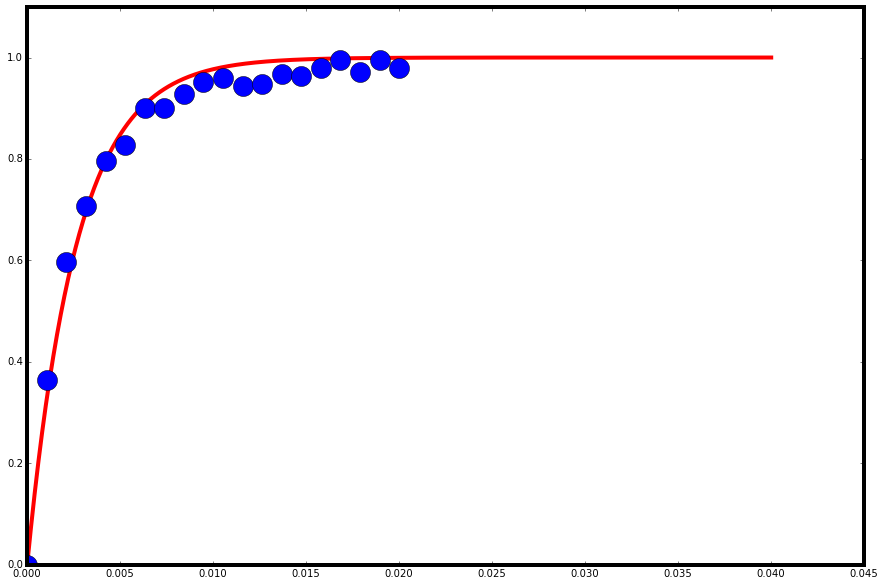

In [112]:
# First fit the deshelving data to find the time constant
# Read in the data
rcParams['axes.linewidth'] = 4
from scipy.optimize import curve_fit
rcParams["figure.figsize"] = 15, 10

data = np.loadtxt('Z:/Group_Share/Barium/Data/2018.dir/05.dir/2018_05_11.dir/00177 - deshelving.csv', delimiter = ',')
t = data[:,0]*1e-6
probability = data[:,1]


# Fit function
def prob(x, tau):
    return 1-np.exp(-1*x/tau)

p0 = [4.e-3]

fit, va = curve_fit(prob,t, probability,p0)
tau = fit[0]
print "Time Constant(s): ", '{:.4f}'.format(tau)


x_fit = np.linspace(0, .04, 1e3)
y_fit = prob(x_fit,fit[0])

plot(x_fit,y_fit,'r', linewidth = 4)
plot(t, probability,'o', color = 'b', markersize = 20)

ylim([0,1.1])
show()

Optimized Deshelve Time (s):  0.0063
Optimized Exp Time (s):  290
Standard Exp Time (s): 444


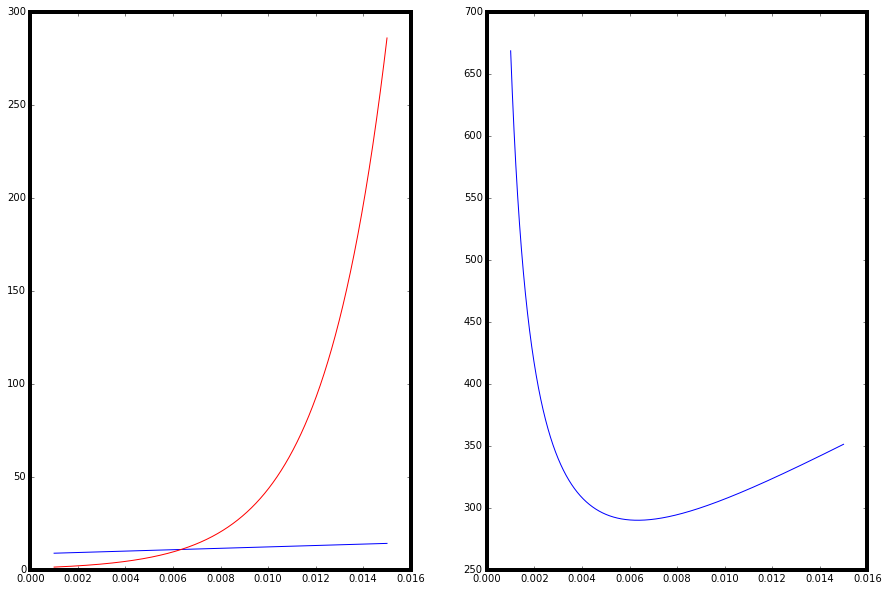

In [113]:
# Now calculate the optimal deshelving time
t = np.linspace(0.001,.015,1e6)
toth = 20.e-3
N = 1e4
y1 = 1 + t/tau + toth/tau
y2 = np.exp(t/tau)
y3 = N*t/(1-np.exp(-t/tau)) + N*toth/(1-np.exp(-t/tau))
subplot(1,2,1)
plot(t,y1,'b')
plot(t,y2,'r')


print "Optimized Deshelve Time (s): ", "{:.4f}".format(t[np.argmin(y3)])
print "Optimized Exp Time (s): ", "{:.0f}".format(np.amin(y3))
print "Standard Exp Time (s): ""{:.0f}".format(-1*tau*np.log(1./N)*N + toth*N)
subplot(1,2,2)
plot(t,y3)
show()

## Estimating Saturation from Time Constant

We can estimate what our S is based on our shelving time constant. We know that to shelve to the $10^{-5}$ level we need to scatter N photons given approximately by $(.73)^N = 10^{-5}$. It't easier to look at a %50 shelved time and see how many photons we need to scatter. The scattering rate is given by:

$S = \frac{\Gamma \mathcal{S}}{2}\frac{1}{1+\mathcal{S}}$

We want to be in the low S limit.

In [ ]:
N = np.log10(.5)/np.log10(.73)
print 'Numbe of photons for %50 shelving prob: ', '{:.1f}'.format(N)
gamma = 25.4*1e6*np.pi*2 # MHz

scatt = 2.2/1e-6
beta = 2*scatt/gamma
print beta
S = beta/(1-beta)
print S


### Data run on 8/5/18

93
Number of errors:  12
Fractional error : 0.0007
Number of exps:  16547


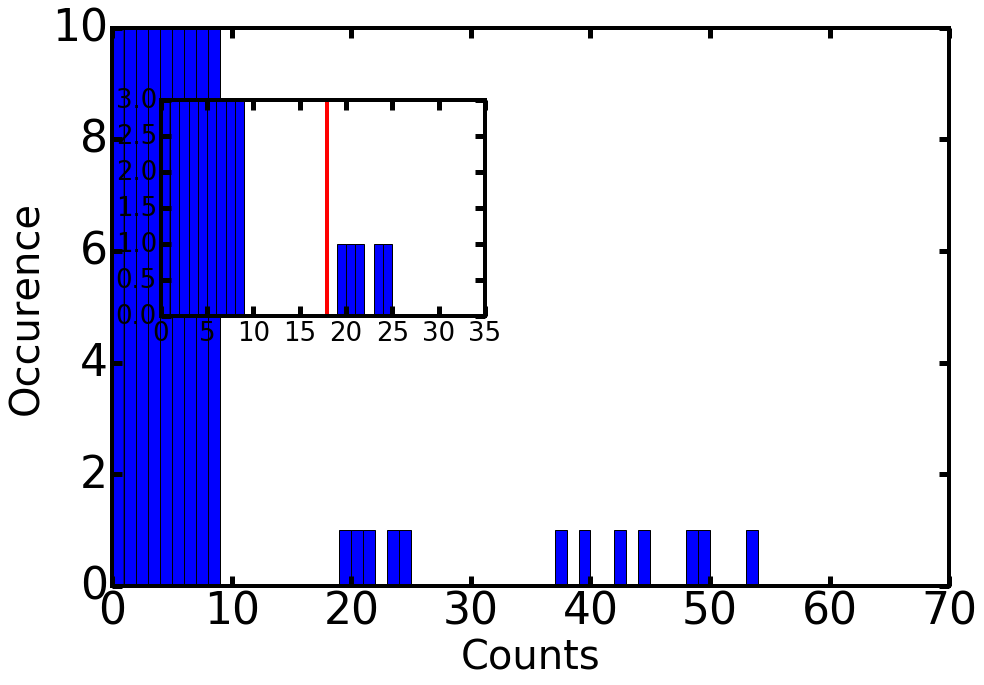

In [24]:
# Read in the data
rcParams['axes.linewidth'] = 4
from scipy.optimize import curve_fit
rcParams["figure.figsize"] = 15, 10
import matplotlib.pyplot as plt

data = np.loadtxt('Z:/Group_Share/Barium/Data/2018.dir/08.dir/2018_08_05.dir/00121 - RabiFlopping_prob.csv', delimiter = ',')
data1 = np.loadtxt('Z:/Group_Share/Barium/Data/2018.dir/08.dir/2018_08_05.dir/00122 - RabiFlopping_hist.csv', delimiter = ',')

discriminator = 18
t_points = data[:,0]
print len(t_points)
num_exps = 200


#counts = data1[point*num_exps:(point+1)*num_exps-1,1]
counts = data1[:,1]
err = np.where(counts > discriminator)
print "Number of errors: ", len(err[0])
print "Fractional error :", "{:.4f}".format(float(len(err[0]))/len(counts))
print "Number of exps: ", len(counts)
bins = int(counts.max() - counts.min())

hist_dat = plt.hist(counts, bins)

# Fit a histogram
x = hist_dat[1][:-1]
y = hist_dat[0]
p0 = [1.0 ,90 ,10]


#title(str(t_points[num]) + ' us Shelving Time', fontsize = 46)
plt.xlabel('Counts', fontsize = 40)
plt.ylabel('Occurence', fontsize = 40)
plt.xlim([0, 70])
ylim([0,10])
plt.tick_params(labelsize = 44)
plt.tick_params(width=5, length=10)


a = plt.axes([.17,.5,.3,.3])
hist_dat = plt.hist(counts, bins)
plt.plot([discriminator,discriminator], [0,10],color = 'r', linewidth = 4)
plt.xlim([0,35])
plt.ylim([0,3])
plt.tick_params(labelsize = 26)
plt.tick_params(width=5, length=10)
plt.show()

#plt.savefig('ba_133_bright_hist.png', bbox_inches='tight')
#plt.savefig('ba_133_bright_hist.pdf', bbox_inches='tight')
#plt.savefig('ba_133_bright_hist.eps', bbox_inches='tight', format='eps', dpi = 1000)

Number of errors:  18155
Fractional error : 0.99972
Number of exps:  18160


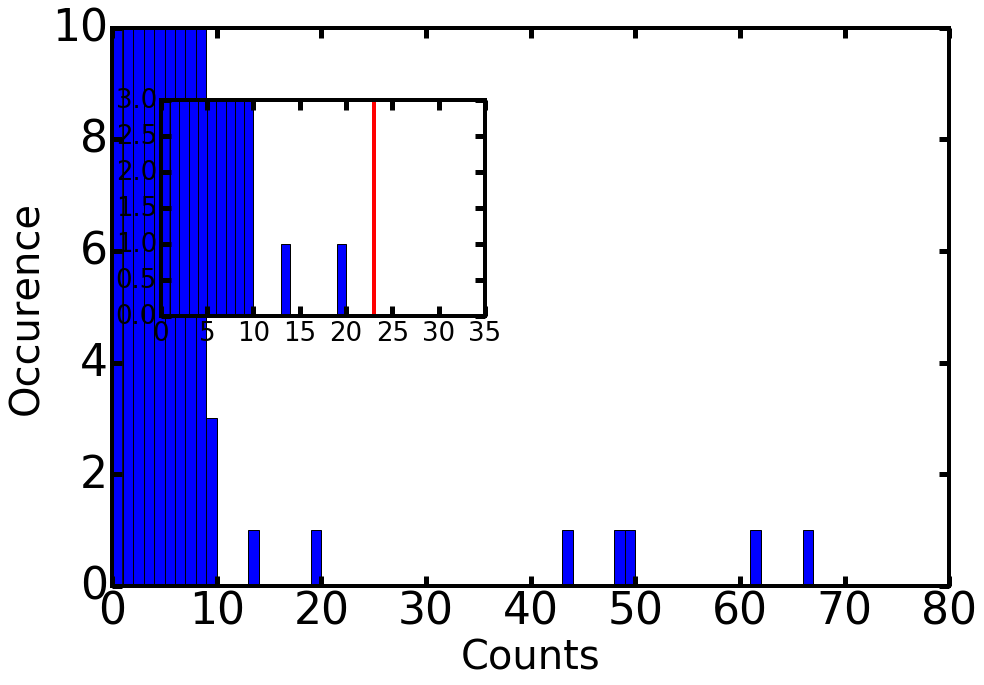

In [33]:
# Read in the data
rcParams['axes.linewidth'] = 4
from scipy.optimize import curve_fit
rcParams["figure.figsize"] = 15, 10
import matplotlib.pyplot as plt

data = np.loadtxt('Z:/Group_Share/Barium/Data/2018.dir/08.dir/2018_08_05.dir/00133 - RabiFlopping_prob.csv', delimiter = ',')
data1 = np.loadtxt('Z:/Group_Share/Barium/Data/2018.dir/08.dir/2018_08_05.dir/00134 - RabiFlopping_hist.csv', delimiter = ',')

discriminator = 23
t_points = data[:,0]
num_exps = 200


#counts = data1[point*num_exps:(point+1)*num_exps-1,1]
counts = data1[:,1]
err = np.where(counts < discriminator)
print "Number of errors: ", len(err[0])
print "Fractional error :", "{:.5f}".format(float(len(err[0]))/len(counts))
print "Number of exps: ", len(counts)
bins = int(counts.max() - counts.min())

hist_dat = plt.hist(counts, bins)

# Fit a histogram
x = hist_dat[1][:-1]
y = hist_dat[0]
p0 = [1.0 ,90 ,10]


#title(str(t_points[num]) + ' us Shelving Time', fontsize = 46)
plt.xlabel('Counts', fontsize = 40)
plt.ylabel('Occurence', fontsize = 40)
plt.xlim([0, 80])
ylim([0,10])
plt.tick_params(labelsize = 44)
plt.tick_params(width=5, length=10)


a = plt.axes([.17,.5,.3,.3])
hist_dat = plt.hist(counts, bins)
plt.plot([discriminator,discriminator], [0,10],color = 'r', linewidth = 4)
plt.xlim([0,35])
plt.ylim([0,3])
plt.tick_params(labelsize = 26)
plt.tick_params(width=5, length=10)
plt.show()

#plt.savefig('ba_133_bright_hist.png', bbox_inches='tight')
#plt.savefig('ba_133_bright_hist.pdf', bbox_inches='tight')
#plt.savefig('ba_133_bright_hist.eps', bbox_inches='tight', format='eps', dpi = 1000)

Number of errors:  38
Fractional error : 0.00103
Fidelity : 0.99897
Number of exps:  36968


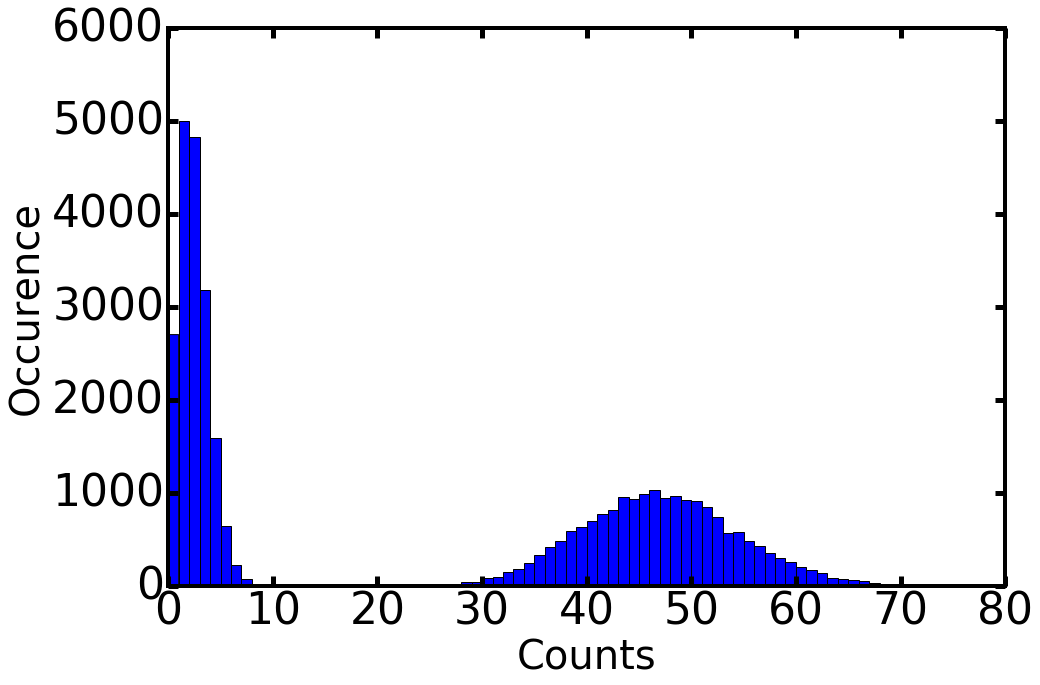

In [36]:
# Read in the data
rcParams['axes.linewidth'] = 4
from scipy.optimize import curve_fit
rcParams["figure.figsize"] = 15, 10
import matplotlib.pyplot as plt

data = np.loadtxt('Z:/Group_Share/Barium/Data/2018.dir/08.dir/2018_08_05.dir/00146 - RabiFlopping_bright_hist.csv', delimiter = ',')
data1 = np.loadtxt('Z:/Group_Share/Barium/Data/2018.dir/08.dir/2018_08_05.dir/00147 - RabiFlopping_hist_dark.csv', delimiter = ',')

discriminator = 23
t_points = data[:,0]
num_exps = 200



bright_counts = data[:,1]
dark_counts = data1[:,1]
counts = np.concatenate((bright_counts,dark_counts), axis = 0)
bright_err = np.where(bright_counts < discriminator)
dark_err = np.where(dark_counts > discriminator)
tot_err = len(bright_err[0]) + len(dark_err[0])
print "Number of errors: ", tot_err
print "Fractional error :", "{:.5f}".format(float(tot_err)/len(counts))
print "Fidelity :", "{:.5f}".format(1 - float(tot_err)/len(counts))
print "Number of exps: ", len(counts)
bins = int(counts.max() - counts.min())

hist_dat = plt.hist(counts, bins)

# Fit a histogram
x = hist_dat[1][:-1]
y = hist_dat[0]
p0 = [1.0 ,90 ,10]


#title(str(t_points[num]) + ' us Shelving Time', fontsize = 46)
plt.xlabel('Counts', fontsize = 40)
plt.ylabel('Occurence', fontsize = 40)
plt.xlim([0, 80])
#ylim([0,10])
plt.tick_params(labelsize = 44)
plt.tick_params(width=5, length=10)

'''
a = plt.axes([.17,.5,.3,.3])
hist_dat = plt.hist(counts, bins)
plt.plot([discriminator,discriminator], [0,10],color = 'r', linewidth = 4)
plt.xlim([0,35])
plt.ylim([0,3])
plt.tick_params(labelsize = 26)
plt.tick_params(width=5, length=10)
'''
plt.show()

#plt.savefig('ba_133_bright_hist.png', bbox_inches='tight')
#plt.savefig('ba_133_bright_hist.pdf', bbox_inches='tight')
#plt.savefig('ba_133_bright_hist.eps', bbox_inches='tight', format='eps', dpi = 1000)

Number of errors:  29
Fractional error : 0.00051
Fidelity : 0.99949 +/-  9.5e-05
Number of exps:  56737


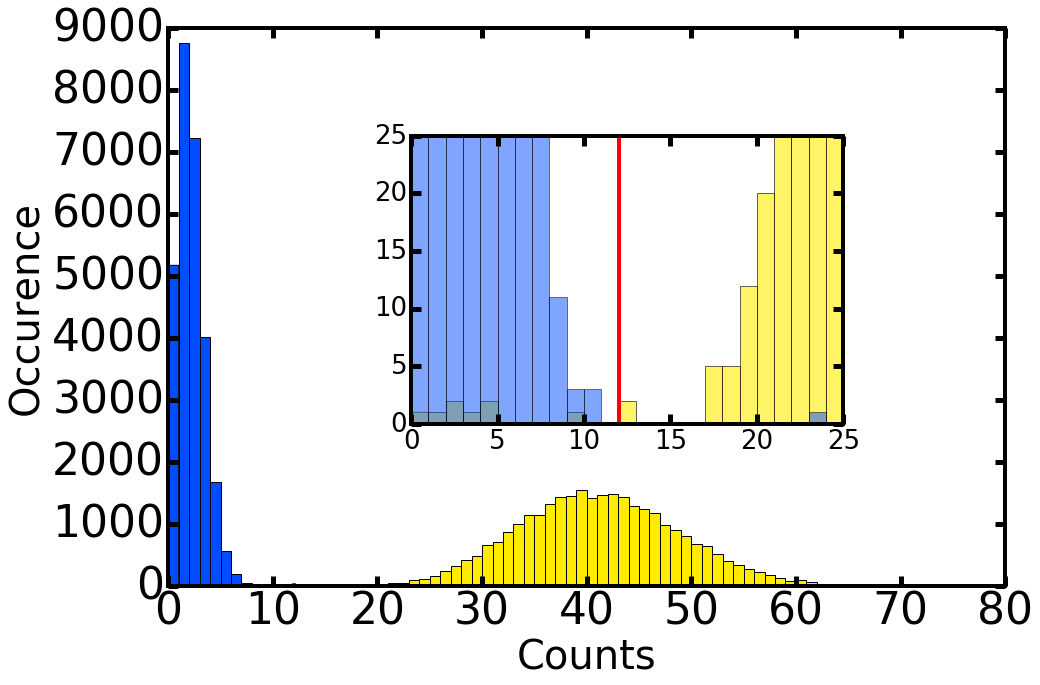

In [144]:
# Read in the data
rcParams['axes.linewidth'] = 4
from scipy.optimize import curve_fit
rcParams["figure.figsize"] = 15, 10
import matplotlib.pyplot as plt

data = np.loadtxt('Z:/Group_Share/Barium/Data/2018.dir/08.dir/2018_08_05.dir/00194 - RabiFlopping_bright_hist.csv', delimiter = ',')
data1 = np.loadtxt('Z:/Group_Share/Barium/Data/2018.dir/08.dir/2018_08_05.dir/00195 - RabiFlopping_hist_dark.csv', delimiter = ',')

discriminator = 12 
t_points = data[:,0]
num_exps = 200



bright_counts = data[:,1]
dark_counts = data1[:,1]
counts = np.concatenate((bright_counts,dark_counts), axis = 0)
bright_err = np.where(bright_counts < discriminator)
dark_err = np.where(dark_counts > discriminator)
tot_err = len(bright_err[0]) + len(dark_err[0])
print "Number of errors: ", tot_err
print "Fractional error :", "{:.5f}".format(float(tot_err)/len(counts))
print "Fidelity :", "{:.5f}".format(1 - float(tot_err)/len(counts)), '+/- ', "{:.1e}".format(np.sqrt(tot_err)/len(counts))
print "Number of exps: ", len(counts)
bins_bright = int(bright_counts.max())
bins_dark = int(dark_counts.max())

hist_dat_bright = plt.hist(bright_counts, bins_bright, color  = '#FFEB00', alpha = 1)
hist_dat_dark = plt.hist(dark_counts, bins_dark, color =  '#004CFF', alpha = 1)

# Fit a histogram
x = hist_dat[1][:-1]
y = hist_dat[0]
p0 = [1.0 ,90 ,10]



#title(str(t_points[num]) + ' us Shelving Time', fontsize = 46)
plt.xlabel('Counts', fontsize = 40)
plt.ylabel('Occurence', fontsize = 40)
#plt.xlim([0, 10])
#ylim([0,10])
plt.plot([discriminator,discriminator], [0,10],color = 'r', linewidth = 4)
plt.tick_params(labelsize = 44)
plt.tick_params(width=5, length=10)


a = plt.axes([.35,.35,.4,.4])
hist_dat_bright = plt.hist(bright_counts, bins_bright, color  = '#FFEB00', alpha = .6)
hist_dat_dark = plt.hist(dark_counts, bins_dark, color = '#004CFF', alpha = .5)
plt.plot([discriminator,discriminator], [0,25],color = '#FF0000', linewidth = 4)
plt.xlim([0,25])
plt.ylim([0,25])
plt.tick_params(labelsize = 26)
plt.tick_params(width=5, length=10)
plt.show()

#plt.savefig('ba_133_bright_hist.png', bbox_inches='tight')
#plt.savefig('ba_133_bright_hist.pdf', bbox_inches='tight')
#plt.savefig('ba_133_bright_hist.eps', bbox_inches='tight', format='eps', dpi = 1000)

Number of errors:  101
Fractional error : 0.00050
Fidelity : 0.99950 +/-  5.0e-05
Number of exps:  200513


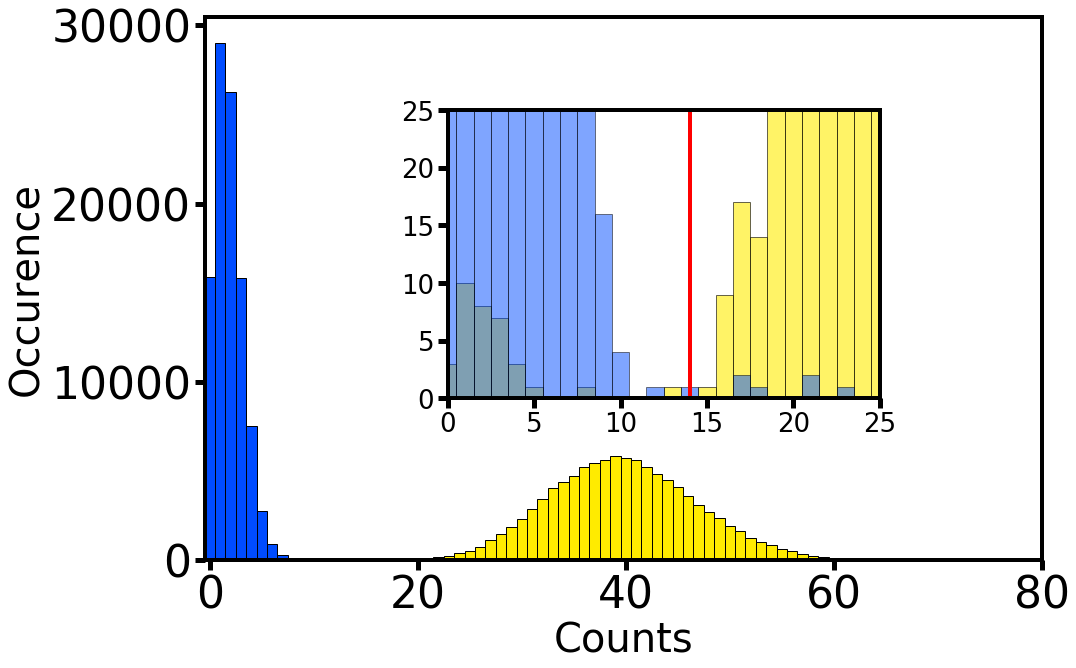

In [9]:
# Read in the data
rcParams['axes.linewidth'] = 4
from scipy.optimize import curve_fit
rcParams["figure.figsize"] = 15, 10
import matplotlib.pyplot as plt

data = np.loadtxt('Z:/Group_Share/Barium/Data/2018.dir/08.dir/2018_08_05.dir/00222 - RabiFlopping_bright_hist.csv', delimiter = ',')
data1 = np.loadtxt('Z:/Group_Share/Barium/Data/2018.dir/08.dir/2018_08_05.dir/00223 - RabiFlopping_hist_dark.csv', delimiter = ',')
data2 = np.loadtxt('Z:/Group_Share/Barium/Data/2018.dir/08.dir/2018_08_05.dir/00226 - RabiFlopping_bright_hist.csv', delimiter = ',')
data3 = np.loadtxt('Z:/Group_Share/Barium/Data/2018.dir/08.dir/2018_08_05.dir/00227 - RabiFlopping_hist_dark.csv', delimiter = ',')
data4 = np.loadtxt('Z:/Group_Share/Barium/Data/2018.dir/08.dir/2018_08_05.dir/00230 - RabiFlopping_bright_hist.csv', delimiter = ',')
data5 = np.loadtxt('Z:/Group_Share/Barium/Data/2018.dir/08.dir/2018_08_05.dir/00231 - RabiFlopping_hist_dark.csv', delimiter = ',')
data6 = np.loadtxt('Z:/Group_Share/Barium/Data/2018.dir/08.dir/2018_08_05.dir/00234 - RabiFlopping_bright_hist.csv', delimiter = ',')
data7 = np.loadtxt('Z:/Group_Share/Barium/Data/2018.dir/08.dir/2018_08_05.dir/00235 - RabiFlopping_hist_dark.csv', delimiter = ',')
data8 = np.loadtxt('Z:/Group_Share/Barium/Data/2018.dir/08.dir/2018_08_05.dir/00238 - RabiFlopping_bright_hist.csv', delimiter = ',')
data9 = np.loadtxt('Z:/Group_Share/Barium/Data/2018.dir/08.dir/2018_08_05.dir/00239 - RabiFlopping_hist_dark.csv', delimiter = ',')
data10 = np.loadtxt('Z:/Group_Share/Barium/Data/2018.dir/08.dir/2018_08_05.dir/00242 - RabiFlopping_bright_hist.csv', delimiter = ',')
data11= np.loadtxt('Z:/Group_Share/Barium/Data/2018.dir/08.dir/2018_08_05.dir/00243 - RabiFlopping_hist_dark.csv', delimiter = ',')


discriminator = 14
t_points = data[:,0]
num_exps = 200



bright_counts =np.concatenate((data[:,1],data2[:,1], data4[:,1], data6[:,1],data8[:,1],data10[:,1]),axis = 0)
dark_counts = np.concatenate((data1[:,1],data3[:,1], data5[:,1], data7[:,1],data9[:,1], data11[:,1]),axis = 0)
counts = np.concatenate((bright_counts,dark_counts), axis = 0)
bright_err = np.where(bright_counts <= discriminator)
dark_err = np.where(dark_counts > discriminator)
tot_err = len(bright_err[0]) + len(dark_err[0])
print "Number of errors: ", tot_err
print "Fractional error :", "{:.5f}".format(float(tot_err)/len(counts))
print "Fidelity :", "{:.5f}".format(1 - float(tot_err)/len(counts)), '+/- ', "{:.1e}".format(np.sqrt(tot_err)/len(counts))
print "Number of exps: ", len(counts)
bins_bright = int(bright_counts.max())
bins_dark = int(dark_counts.max())

hist_dat_bright = plt.hist(bright_counts, bins_bright, color  =  '#FFEB00', alpha = 1, align ='left', edgecolor = 'black')
hist_dat_dark = plt.hist(dark_counts, bins_dark, color = '#004CFF', alpha = 1, align ='left', edgecolor = 'black')

#title(str(t_points[num]) + ' us Shelving Time', fontsize = 46)
plt.xlabel('Counts', fontsize = 40)
plt.ylabel('Occurence', fontsize = 40)
plt.xlim([-.5, 80])
#ylim([0,10])
plt.plot([discriminator,discriminator], [0,10],color = 'r', linewidth = 4)
plt.tick_params(labelsize = 44)
plt.tick_params(width=5, length=10)


a = plt.axes([.35,.35,.4,.4])
hist_dat_bright = plt.hist(bright_counts, bins_bright, color  = '#FFEB00', alpha = .6, align ='left', edgecolor = 'black')
hist_dat_dark = plt.hist(dark_counts, bins_dark, color = '#004CFF', alpha = .5, align ='left', edgecolor = 'black')
plt.plot([discriminator,discriminator], [0,25],color = '#FF0000', linewidth = 4)
plt.xlim([0,25])
plt.ylim([0,25])
plt.tick_params(labelsize = 26)
plt.tick_params(width=5, length=10)
plt.show()

#plt.savefig('ba_133_bright_hist.png', bbox_inches='tight')
#plt.savefig('ba_133_bright_hist.pdf', bbox_inches='tight')
#plt.savefig('ba_133_bright_hist.eps', bbox_inches='tight', format='eps', dpi = 1000)

Number of bright errors:  18
Fractional error : 0.00024
Fidelity : 0.99976 +/-  5.6e-05
Number of exps:  76409 

Number of dark errors:  34
Fractional error : 0.00045
Fidelity : 0.99955 +/-  7.8e-05
Number of exps:  74817 

Number of errors:  52
Fractional error : 0.00034
Fidelity : 0.99966 +/-  4.8e-05
Number of exps:  151226


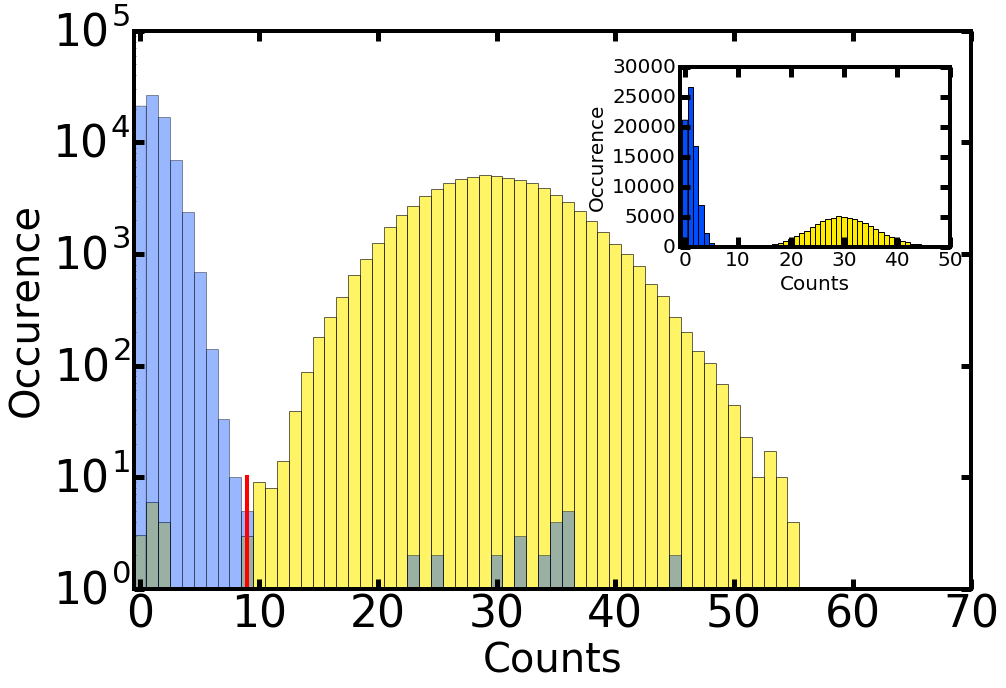

In [5]:
# Read in the data
rcParams['axes.linewidth'] = 4
from scipy.optimize import curve_fit
rcParams["figure.figsize"] = 15, 10
import matplotlib.pyplot as plt

data = np.loadtxt('Z:/Group_Share/Barium/Data/2018.dir/08.dir/2018_08_05.dir/00262 - RabiFlopping_bright_hist.csv', delimiter = ',')
data1 = np.loadtxt('Z:/Group_Share/Barium/Data/2018.dir/08.dir/2018_08_05.dir/00263 - RabiFlopping_hist_dark.csv', delimiter = ',')
data2 = np.loadtxt('Z:/Group_Share/Barium/Data/2018.dir/08.dir/2018_08_05.dir/00266 - RabiFlopping_bright_hist.csv', delimiter = ',')
data3 = np.loadtxt('Z:/Group_Share/Barium/Data/2018.dir/08.dir/2018_08_05.dir/00267 - RabiFlopping_hist_dark.csv', delimiter = ',')
data4 = np.loadtxt('Z:/Group_Share/Barium/Data/2018.dir/08.dir/2018_08_05.dir/00270 - RabiFlopping_bright_hist.csv', delimiter = ',')
data5 = np.loadtxt('Z:/Group_Share/Barium/Data/2018.dir/08.dir/2018_08_05.dir/00271 - RabiFlopping_hist_dark.csv', delimiter = ',')

discriminator = 9
t_points = data[:,0]
num_exps = 200


bright_counts =np.concatenate((data[:,1],data2[:,1], data4[:,1]),axis = 0)
dark_counts = np.concatenate((data1[:,1],data3[:,1], data5[:,1]),axis = 0)

counts = np.concatenate((bright_counts,dark_counts), axis = 0)
bright_err = len(np.where(bright_counts <= discriminator)[0])
dark_err = len(np.where(dark_counts > discriminator)[0])
tot_err = bright_err + dark_err



print "Number of bright errors: ", bright_err
print "Fractional error :", "{:.5f}".format(float(bright_err)/len(bright_counts))
print "Fidelity :", "{:.5f}".format(1 - float(bright_err)/len(bright_counts)), '+/- ', "{:.1e}".format(np.sqrt(bright_err)/len(bright_counts))
print "Number of exps: ", len(bright_counts), '\n'

print "Number of dark errors: ", dark_err
print "Fractional error :", "{:.5f}".format(float(dark_err)/len(dark_counts))
print "Fidelity :", "{:.5f}".format(1 - float(dark_err)/len(dark_counts)), '+/- ', "{:.1e}".format(np.sqrt(dark_err)/len(dark_counts))
print "Number of exps: ", len(dark_counts), '\n'

print "Number of errors: ", tot_err
print "Fractional error :", "{:.5f}".format(float(tot_err)/len(counts))
print "Fidelity :", "{:.5f}".format(1 - float(tot_err)/len(counts)), '+/- ', "{:.1e}".format(np.sqrt(tot_err)/len(counts))
print "Number of exps: ", len(counts)
bins_bright = int(bright_counts.max())
bins_dark = int(dark_counts.max())


hist_dat_bright = plt.hist(bright_counts, bins_bright, color  = '#FFEB00', alpha = .6, align ='left',edgecolor = 'black', log=True)
hist_dat_dark = plt.hist(dark_counts, bins_dark, color = '#004CFF',alpha = .4, align ='left', edgecolor = 'black', log=True)



#title(str(t_points[num]) + ' us Shelving Time', fontsize = 46)
plt.xlabel('Counts', fontsize = 40)
plt.ylabel('Occurence', fontsize = 40)
plt.xlim([-.5, 70])
#ylim([0,10])
plt.plot([discriminator,discriminator], [0,10],color = 'r', linewidth = 4)
plt.tick_params(labelsize = 44)
plt.tick_params(width=5, length=10)



a = plt.axes([.63,.6,.25,.25])
hist_dat_bright = plt.hist(bright_counts, bins_bright, color  = '#FFEB00', alpha = 1, align ='left', edgecolor = 'black')
hist_dat_dark = plt.hist(dark_counts, bins_dark, color = '#004CFF', alpha = 1, align ='left', edgecolor = 'black')
plt.plot([discriminator,discriminator], [0,25],color = '#FF0000', linewidth = 4)
plt.xlim([-1,50])
#plt.ylim([0,25])
plt.tick_params(labelsize = 20)
plt.tick_params(width=5, length=10)
plt.xlabel('Counts', fontsize = 20)
plt.ylabel('Occurence', fontsize = 20)

#plt.show()

savefig('High_Fig_hist_no_bg.png', transparent = True)
savefig('High_Fig_hist_no_bg.pdf', transparent = True)
savefig('High_Fig_hist_no_bg.eps', format='eps', dpi = 1000, transparent = True)

30.0222225131
1.28607134742
Bright Fit:  29.9955896667 0.0822861382381
Dark Fit:  1.26343744595 0.00148120649477


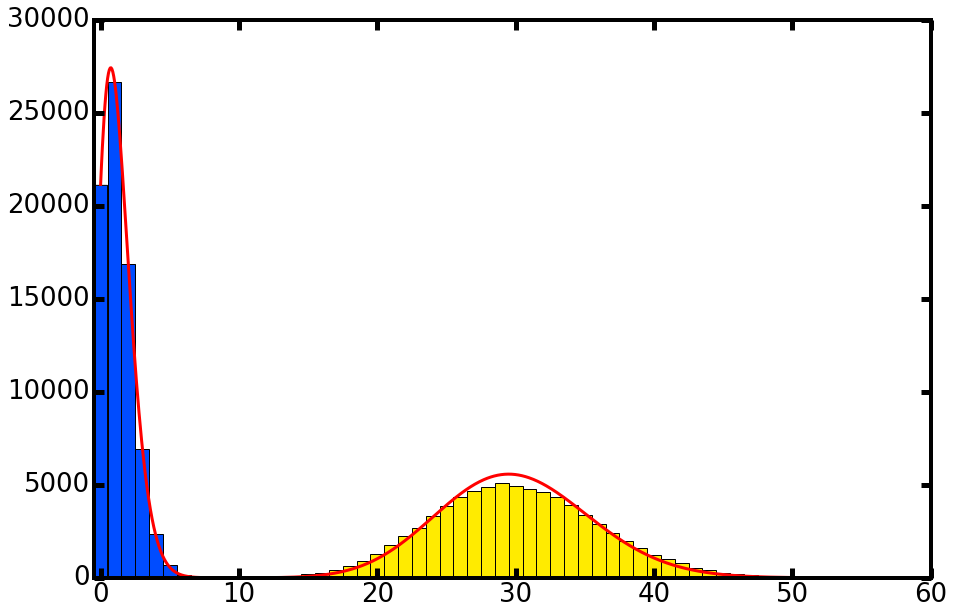

In [100]:
from scipy.optimize import curve_fit
from scipy.special import factorial
# Fit Poisson distributions to both
rcParams['axes.linewidth'] = 4
rcParams["figure.figsize"] = 15, 10

def gauss(x, A, mu, sigma):
    return A*np.exp(-(x-mu)**2/2/sigma**2)

def poiss(x, mu):
        return (np.exp(-mu)*mu**x)/factorial(x)

hist_dat_bright = plt.hist(bright_counts, bins_bright, color  = '#FFEB00', alpha = 1, align ='left', edgecolor = 'black')
hist_dat_dark = plt.hist(dark_counts, bins_dark, color = '#004CFF',alpha = 1, align='left', edgecolor = 'black')    



x_bright = hist_dat_bright[1][:-1]  
y_bright = hist_dat_bright[0]/len(bright_counts)

x_dark = hist_dat_dark[1][:-1]
y_dark = hist_dat_dark[0]/len(dark_counts)


x_bright_mean = np.sum(x_bright*hist_dat_bright[0])/np.sum(hist_dat_bright[0])
print x_bright_mean

x_dark_mean = np.sum(x_dark*hist_dat_dark[0])/np.sum(hist_dat_dark[0])
print x_dark_mean

fit_bright, bright_err = curve_fit(poiss,x_bright, y_bright, p0 = [30])
print 'Bright Fit: ', fit_bright[0], np.sqrt(bright_err[0][0])

fit_dark, dark_err = curve_fit(poiss,x_dark, y_dark, p0 = [1])
print 'Dark Fit: ', fit_dark[0], np.sqrt(dark_err[0][0])

x_fit = np.linspace(0,counts.max(),1e3)
y_fit_bright = poiss(x_fit,fit_bright[0])*len(bright_counts)
y_fit_dark = poiss(x_fit,fit_dark[0])*len(dark_counts)


#x_fit = x_fit + .5

plot(x_fit,y_fit_bright,'r', linewidth = 3)
plot(x_fit,y_fit_dark,'r', linewidth = 3)

tick_params(labelsize = 26)
tick_params(width=5, length=10)
xlim([-.5,60])
#ylim([0,100])
show()

#savefig('High_Fig_hist_fit.png', bbox_inches='tight')
#savefig('High_Fig_hist_fit.pdf', bbox_inches='tight')
#savefig('High_Fig_hist_fit.eps', bbox_inches='tight', format='eps', dpi = 1000)


### Histogram Overlap

Using the two means determined by the Poisson fits we can calculate the overlap of the distributions and the statistical error based on our discriminator.

In [84]:
# Calculate probability of detecting N number of photon given a Poisson distribution and given mean 

mean_dark = 1.2
mean_bright = 30
threshold = 9



prob_dark = 0
prob_bright = 0

def poiss(x, mu):
        return (np.exp(-mu)*mu**x)/factorial(x)
    

for i in range(threshold + 1):
    prob_dark = poiss(i, mean_dark) + prob_dark
    prob_bright = poiss(i,mean_bright) + prob_bright
    

print 'Statistical Error: ' '{:.1e}'.format(((1- prob_dark) + prob_bright)/2)
print 'Measured optimal threshold: ', threshold

# Optimal discriminator based on Burrell Thesis
td = 5.e-3
rd = mean_dark/td
rb = mean_bright/td

opt = rb*td/np.log(1 + rb/rd)
print 'Calculated optimal threshold: ', '{:.1f}'.format(opt)

Statistical Error: 3.8e-06
Measured optimal threshold:  9
Calculated optimal threshold:  9.2


## Determining $\pi$-Time

Take Rabi flopping curve and fit it to get the Rabi frequency and pi time.

Rabi Frequency (kHz):  35.42612
Amplitude:  1.003
Pi-Time (us):  14.11388
[[  1.62691237e+04  -1.84354563e-03]
 [ -1.84354563e-03   2.88477833e-05]]
127.550475113


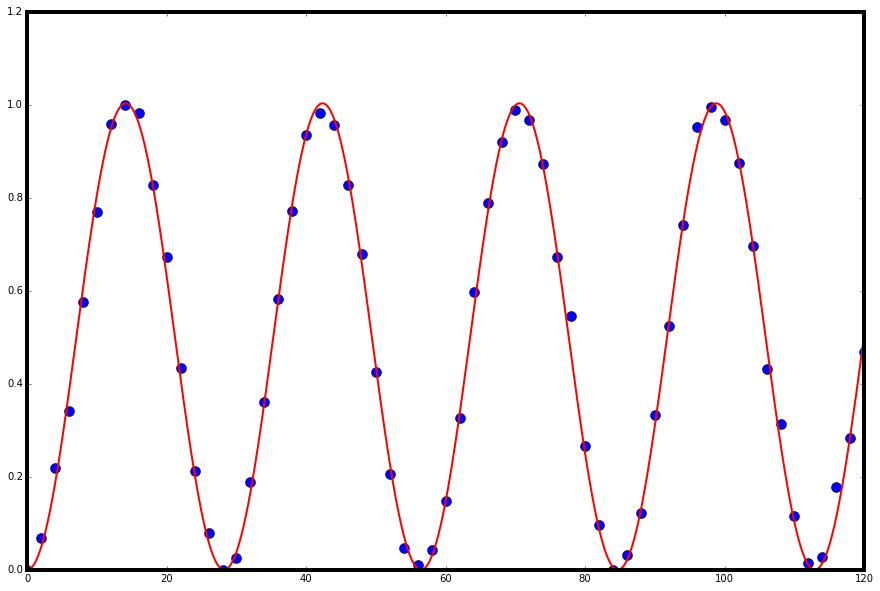

In [89]:
from scipy.optimize import curve_fit
from scipy.special import factorial
# Fit Poisson distributions to both
rcParams['axes.linewidth'] = 4
rcParams["figure.figsize"] = 15, 10

def rabi(x, omega, A):
    return A*np.sin(omega*x/2)**2

data = np.loadtxt('H:/Data/2018.dir/09.dir/2018_09_14.dir/00130 - Rabi_prob.csv', delimiter = ',')
#data = np.loadtxt('H:/Data/2019.dir/07.dir/2019_07_12.dir/00217 - Rabi_prob.csv', delimiter = ',')


t = data[:,0]*1e-6
prob = data[:,1]

#t = np.append(t, data1[:,0]*1e-6)
#prob = np.append(prob, data1[:,1])

#t = np.concatenate((data[:,0], data1[:,0]), axis = 0)*1e-6
#prob = np.concatenate((data[:,1], data1[:,1]), axis = 0)

rabi_fit, rabi_err = curve_fit(rabi,t, prob, p0 = [2*np.pi*35.0e3,1])
print 'Rabi Frequency (kHz): ', '{:.5f}'.format(rabi_fit[0]/2/np.pi/1e3)
print 'Amplitude: ', '{:.3f}'.format(rabi_fit[1])
print 'Pi-Time (us): ', '{:.5f}'.format(np.pi/rabi_fit[0]*1e6)

print rabi_err
print np.sqrt(rabi_err[0,0])


x_fit = np.linspace(0,t[-1],5e3)
y_fit = rabi(x_fit, rabi_fit[0], rabi_fit[1])

#xlim([1990,2500])
plot(t*1e6,prob,'o',color = 'b', markersize = 10)
plot(x_fit*1e6, y_fit, color = 'r', linewidth = 2)
show()

### Shelving Time Constant


Time Constant(s):  1.8577e-03


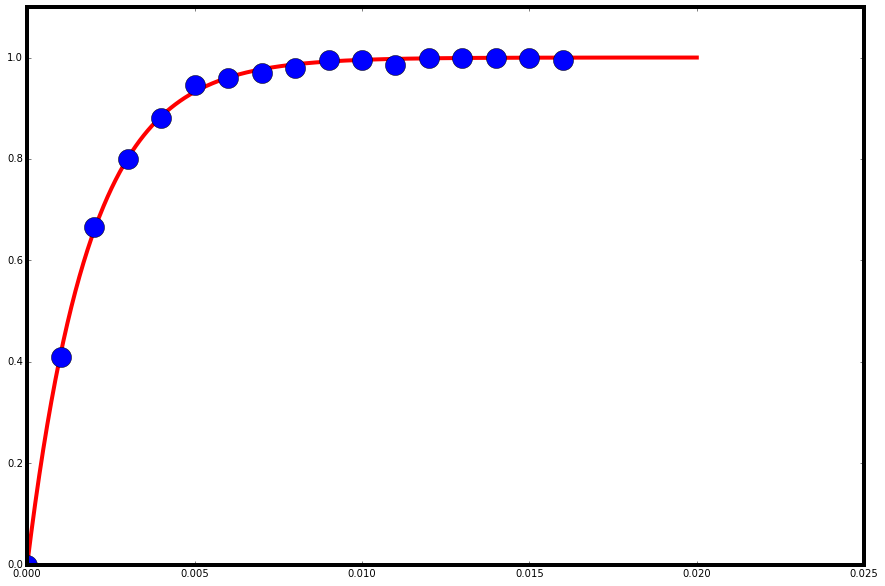

In [356]:
# First fit the deshelving data to find the time constant
# Read in the data
rcParams['axes.linewidth'] = 4
from scipy.optimize import curve_fit
rcParams["figure.figsize"] = 15, 10

data = np.loadtxt('H:/Data/2018.dir/09.dir/2018_09_27.dir/00013 - deshelving.csv', delimiter = ',')
t = data[:,0]*1e-6
probability = data[:,1]


# Fit function
def prob(x, tau):
    return 1-np.exp(-1*x/tau)

p0 = [2.e-3]

fit, va = curve_fit(prob,t, probability,p0)
tau = fit[0]
print "Time Constant(s): ", '{:.4e}'.format(tau)


x_fit = np.linspace(0, 20e-3, 1e3)
y_fit = prob(x_fit,fit[0])

plot(x_fit,y_fit,'r', linewidth = 4)
plot(t, probability,'o', color = 'b', markersize = 20)

ylim([0,1.1])
show()

## Composite Pulse Sequence Errors

In the following two data sets there were 20 composite pulse sequences for the bright hist and 21 composite sequences for the dark state. 

Number of bright errors:  427
Fractional error : 0.06490
Fidelity : 0.93510 +/-  3.1e-03
Number of exps:  6579 

Number of dark errors:  61
Fractional error : 0.00987
Fidelity : 0.99013 +/-  1.3e-03
Number of exps:  6178 



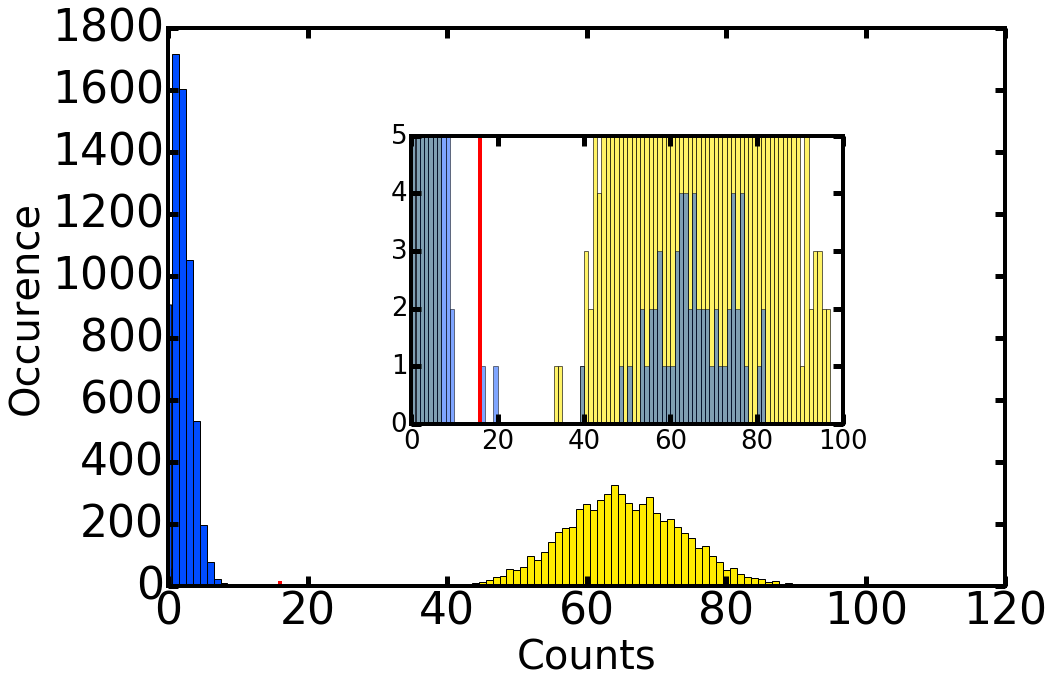

In [121]:
# Read in the data
rcParams['axes.linewidth'] = 4
from scipy.optimize import curve_fit
rcParams["figure.figsize"] = 15, 10
import matplotlib.pyplot as plt

hst_b = np.loadtxt('Z:/Group_Share/Barium/Data/2018.dir/08.dir/2018_08_31.dir/00153 - Rabi_hist.csv', delimiter = ',')
hst_d = np.loadtxt('Z:/Group_Share/Barium/Data/2018.dir/08.dir/2018_08_31.dir/00150 - Rabi_hist.csv', delimiter = ',')

discriminator = 16
dc_threshold = 22

dc_counts = hst_b[:,1]
sd_counts = hst_b[:,2]

sd_new_b = np.array([])

for i in range(len(sd_counts)):
    if dc_counts[i] > dc_threshold:
        sd_new_b = np.append(sd_new_b, sd_counts[i])


dc_counts = hst_d[:,1]
sd_counts = hst_d[:,2]

sd_new_d = np.array([])

for i in range(len(sd_counts)):
    if dc_counts[i] > dc_threshold:
        sd_new_d = np.append(sd_new_d, sd_counts[i])

        
bright_counts = sd_new_b
dark_counts = sd_new_d
counts = np.concatenate((bright_counts,dark_counts), axis = 0)
bright_err = np.where(bright_counts < discriminator)
dark_err = np.where(dark_counts > discriminator)

bright_err = len(bright_err[0])
dark_err = len(dark_err[0])
tot_err = bright_err + dark_err
bins_bright = int(bright_counts.max())
bins_dark = int(dark_counts.max())

print "Number of bright errors: ", bright_err
print "Fractional error :", "{:.5f}".format(float(bright_err)/len(bright_counts))
print "Fidelity :", "{:.5f}".format(1 - float(bright_err)/len(bright_counts)), '+/- ', "{:.1e}".format(np.sqrt(bright_err)/len(bright_counts))
print "Number of exps: ", len(bright_counts), '\n'

print "Number of dark errors: ", dark_err
print "Fractional error :", "{:.5f}".format(float(dark_err)/len(dark_counts))
print "Fidelity :", "{:.5f}".format(1 - float(dark_err)/len(dark_counts)), '+/- ', "{:.1e}".format(np.sqrt(dark_err)/len(dark_counts))
print "Number of exps: ", len(dark_counts), '\n'


hist_dat_bright = plt.hist(bright_counts, bins_bright, color  = '#FFEB00', alpha = 1, align ='left', edgecolor = 'black')
hist_dat_dark = plt.hist(dark_counts, bins_dark, color =  '#004CFF', alpha = 1, align ='left', edgecolor = 'black')




#title(str(t_points[num]) + ' us Shelving Time', fontsize = 46)
plt.xlabel('Counts', fontsize = 40)
plt.ylabel('Occurence', fontsize = 40)
plt.xlim([0, 120])
#ylim([0,10])
plt.plot([discriminator,discriminator], [0,10],color = 'r', linewidth = 4)
plt.tick_params(labelsize = 44)
plt.tick_params(width=5, length=10)


a = plt.axes([.35,.35,.4,.4])
hist_dat_bright = plt.hist(bright_counts, bins_bright, color  = '#FFEB00', alpha = .6)
hist_dat_dark = plt.hist(dark_counts, bins_dark, color = '#004CFF', alpha = .5)
plt.plot([discriminator,discriminator], [0,25],color = '#FF0000', linewidth = 4)
plt.xlim([0,100])
plt.ylim([0,5])
plt.tick_params(labelsize = 26)
plt.tick_params(width=5, length=10)
plt.show()

In the following two data sets there were 10 composite pulse sequences for the bright hist and 11 composite sequences for the dark state. 

Number of bright errors:  82
Fractional error : 0.03054
Fidelity : 0.96946 +/-  3.4e-03
Number of exps:  2685 

Number of dark errors:  36
Fractional error : 0.01259
Fidelity : 0.98741 +/-  2.1e-03
Number of exps:  2859 



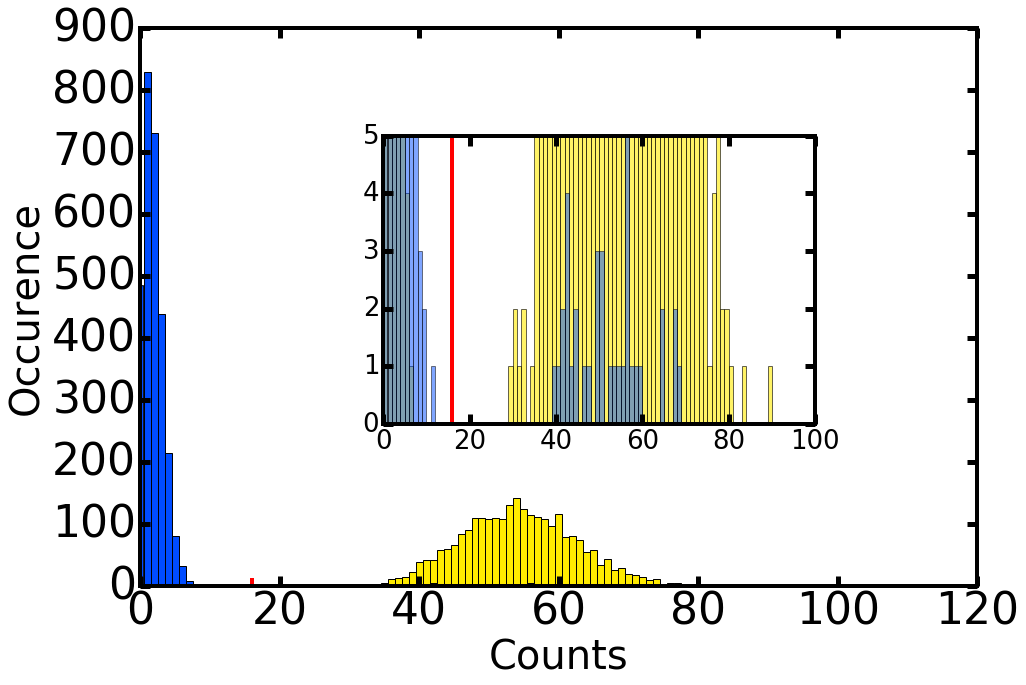

In [143]:
# Read in the data
rcParams['axes.linewidth'] = 4
from scipy.optimize import curve_fit
rcParams["figure.figsize"] = 15, 10
import matplotlib.pyplot as plt

hst_b = np.loadtxt('Z:/Group_Share/Barium/Data/2018.dir/08.dir/2018_08_30.dir/00543 - Rabi_hist.csv', delimiter = ',')
hst_d = np.loadtxt('Z:/Group_Share/Barium/Data/2018.dir/08.dir/2018_08_30.dir/00546 - Rabi_hist.csv', delimiter = ',')

discriminator = 16
dc_threshold = 22

dc_counts = hst_b[:,1]
sd_counts = hst_b[:,2]

sd_new_b = np.array([])

for i in range(len(sd_counts)):
    if dc_counts[i] > dc_threshold:
        sd_new_b = np.append(sd_new_b, sd_counts[i])


dc_counts = hst_d[:,1]
sd_counts = hst_d[:,2]

sd_new_d = np.array([])

for i in range(len(sd_counts)):
    if dc_counts[i] > dc_threshold:
        sd_new_d = np.append(sd_new_d, sd_counts[i])

        
bright_counts = sd_new_b
dark_counts = sd_new_d
counts = np.concatenate((bright_counts,dark_counts), axis = 0)
bright_err = np.where(bright_counts < discriminator)
dark_err = np.where(dark_counts > discriminator)

bright_err = len(bright_err[0])
dark_err = len(dark_err[0])
tot_err = bright_err + dark_err
bins_bright = int(bright_counts.max())
bins_dark = int(dark_counts.max())

print "Number of bright errors: ", bright_err
print "Fractional error :", "{:.5f}".format(float(bright_err)/len(bright_counts))
print "Fidelity :", "{:.5f}".format(1 - float(bright_err)/len(bright_counts)), '+/- ', "{:.1e}".format(np.sqrt(bright_err)/len(bright_counts))
print "Number of exps: ", len(bright_counts), '\n'

print "Number of dark errors: ", dark_err
print "Fractional error :", "{:.5f}".format(float(dark_err)/len(dark_counts))
print "Fidelity :", "{:.5f}".format(1 - float(dark_err)/len(dark_counts)), '+/- ', "{:.1e}".format(np.sqrt(dark_err)/len(dark_counts))
print "Number of exps: ", len(dark_counts), '\n'


hist_dat_bright = plt.hist(bright_counts, bins_bright, color  = '#FFEB00', alpha = 1, align ='left', edgecolor = 'black')
hist_dat_dark = plt.hist(dark_counts, bins_dark, color =  '#004CFF', alpha = 1, align ='left', edgecolor = 'black')




#title(str(t_points[num]) + ' us Shelving Time', fontsize = 46)
plt.xlabel('Counts', fontsize = 40)
plt.ylabel('Occurence', fontsize = 40)
plt.xlim([0, 120])
#ylim([0,10])
plt.plot([discriminator,discriminator], [0,10],color = 'r', linewidth = 4)
plt.tick_params(labelsize = 44)
plt.tick_params(width=5, length=10)


a = plt.axes([.35,.35,.4,.4])
hist_dat_bright = plt.hist(bright_counts, bins_bright, color  = '#FFEB00', alpha = .6)
hist_dat_dark = plt.hist(dark_counts, bins_dark, color = '#004CFF', alpha = .5)
plt.plot([discriminator,discriminator], [0,25],color = '#FF0000', linewidth = 4)
plt.xlim([0,100])
plt.ylim([0,5])
plt.tick_params(labelsize = 26)
plt.tick_params(width=5, length=10)
plt.show()

Using the fidelity caclulated above we can estimate the average rotation error per pulse. We start by assuming we are on resonance and the probability of the |1> state is:

$\large P(1) = sin^2(\frac{\Omega_Rt}{2}) = sin^2(\frac{\theta}{2}) $

We then Taylor expand around $\theta = N\pi$ where N is the number of pi-pulses we're trying to do.

$sin^2(\frac{\theta}{2}) \approx 1 - \frac{1}{4}(\theta - N\pi)^2$

and we say that $\theta = N\pi + N\epsilon$:

$sin^2(\frac{\theta}{2}) \approx 1 - \frac{1}{4}(N\epsilon)^2$

$\large P_N(1) \approx 1 - \frac{1}{4}(N\epsilon)^2$

Then the error per pulse is:

$\large \epsilon = \frac{\sqrt{4(1-P_N)}}{N}$


In [148]:
# Calculate error per pulse for different number of composite pulses

N21 = 21
N20 = 20
N11 = 11
N10 = 10

p21 = .99
p20 = .935
p11 = .9874
p10 = .9694

e21 = np.sqrt(4*(1-p21))/N21
e20 = np.sqrt(4*(1-p20))/N20
e11 = np.sqrt(4*(1-p11))/N11
e10 = np.sqrt(4*(1-p10))/N10

print '{:.6f}'.format(e21), '{:.2e}'.format(.25*e21**2)
print '{:.6f}'.format(e11), '{:.2e}'.format(.25*e11**2)
print '{:.6f}'.format(e20), '{:.2e}'.format(.25*e20**2)
print '{:.6f}'.format(e10), '{:.2e}'.format(.25*e10**2)

0.009524 2.27e-05
0.020409 1.04e-04
0.025495 1.62e-04
0.034986 3.06e-04


## Updated Composite Pulse Data 9/11/18

For this data we pick a random overall phase at the beginning of each composite pulse sequence. Due to the nature of our pulser we cannot do this for each experiment, but have the same n random phases for n composite

Pulse number:  0    Fidelity:  1.0000e+00    Number of errors:  0    Number of exps:  9625    Error:  0.0e+00
Pulse number:  4    Fidelity:  9.9874e-01    Number of errors:  26    Number of exps:  20573    Error:  2.5e-04
Pulse number:  10    Fidelity:  9.8905e-01    Number of errors:  115    Number of exps:  10500    Error:  1.0e-03
Pulse number:  16    Fidelity:  9.8660e-01    Number of errors:  139    Number of exps:  10376    Error:  1.1e-03
Pulse number:  22    Fidelity:  9.8359e-01    Number of errors:  66    Number of exps:  4021    Error:  2.0e-03
Pulse number:  1    Fidelity:  9.9958e-01    Number of errors:  5    Number of exps:  11879    Error:  1.9e-04
Pulse number:  5    Fidelity:  9.9817e-01    Number of errors:  29    Number of exps:  15881    Error:  3.4e-04
Pulse number:  11    Fidelity:  9.9800e-01    Number of errors:  41    Number of exps:  20535    Error:  3.1e-04
Pulse number:  17    Fidelity:  9.9689e-01    Number of errors:  64    Number of exps:  20570    Error

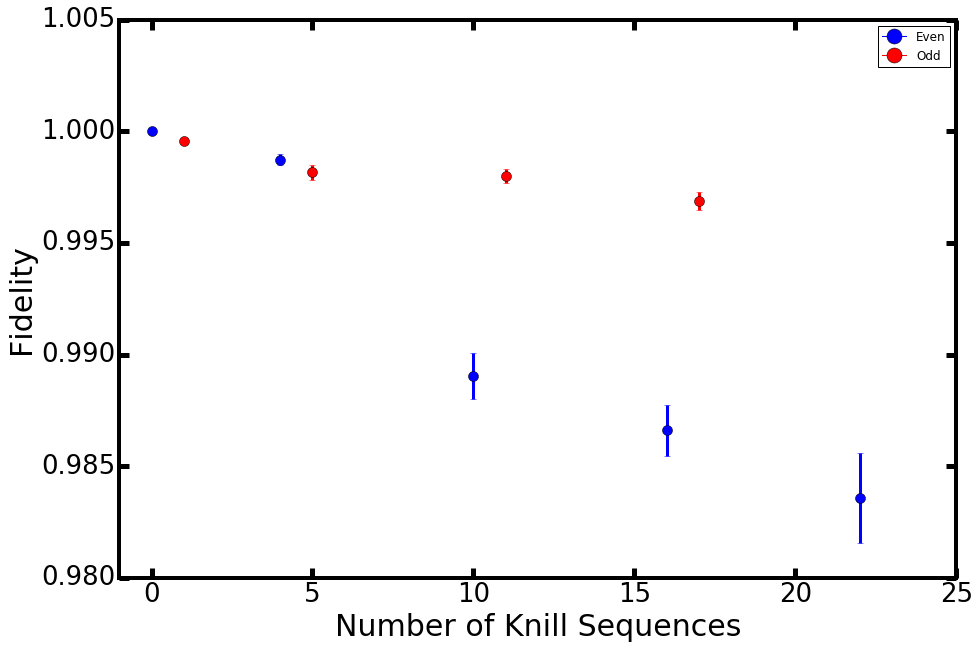

In [271]:
# Read in the data
rcParams['axes.linewidth'] = 4
from scipy.optimize import curve_fit
rcParams["figure.figsize"] = 15, 10
rcParams['legend.numpoints'] = 1
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

hst_0cp = np.loadtxt('Z:/Group_Share/Barium/Data/2018.dir/09.dir/2018_09_11.dir/00239 - Rabi_hist.csv', delimiter = ',')
hst_1cp = np.loadtxt('Z:/Group_Share/Barium/Data/2018.dir/09.dir/2018_09_11.dir/00251 - Rabi_hist.csv', delimiter = ',')
hst_4cp = np.loadtxt('Z:/Group_Share/Barium/Data/2018.dir/09.dir/2018_09_11.dir/00260 - Rabi_hist.csv', delimiter = ',')
hst_5cp = np.loadtxt('Z:/Group_Share/Barium/Data/2018.dir/09.dir/2018_09_11.dir/00263 - Rabi_hist.csv', delimiter = ',')
hst_10cp = np.loadtxt('Z:/Group_Share/Barium/Data/2018.dir/09.dir/2018_09_11.dir/00284 - Rabi_hist.csv', delimiter = ',')
hst_11cp = np.loadtxt('Z:/Group_Share/Barium/Data/2018.dir/09.dir/2018_09_12.dir/00003 - Rabi_hist.csv', delimiter = ',')
hst_16cp = np.loadtxt('Z:/Group_Share/Barium/Data/2018.dir/09.dir/2018_09_12.dir/00006 - Rabi_hist.csv', delimiter = ',')
hst_17cp = np.loadtxt('Z:/Group_Share/Barium/Data/2018.dir/09.dir/2018_09_12.dir/00009 - Rabi_hist.csv', delimiter = ',')
hst_22cp = np.loadtxt('Z:/Group_Share/Barium/Data/2018.dir/09.dir/2018_09_12.dir/00012 - Rabi_hist.csv', delimiter = ',')

hist_b = {0:hst_0cp, 4:hst_4cp, 10:hst_10cp, 16:hst_16cp, 22:hst_22cp}
hist_d = {1:hst_1cp, 5:hst_5cp, 11:hst_11cp, 17:hst_17cp}

discriminator = 13
dc_threshold = 14

sd_hist_b = {}
sd_hist_d = {}

for key in hist_b:
    dc_counts = hist_b[key][:,1]
    sd_counts = hist_b[key][:,2]
    sd_new_b = np.array([])
    
    for i in range(len(sd_counts)):
        if dc_counts[i] > dc_threshold:
            sd_new_b = np.append(sd_new_b, sd_counts[i])
    
    sd_hist_b[key] = sd_new_b

    
for key in hist_d:
    dc_counts = hist_d[key][:,1]
    sd_counts = hist_d[key][:,2]
    sd_new_d = np.array([])
    
    for i in range(len(sd_counts)):
        if dc_counts[i] > dc_threshold:
            sd_new_d = np.append(sd_new_d, sd_counts[i])
    
    sd_hist_d[key] = sd_new_d    

hist_b_fid = {}
hist_d_fid = {}    
hist_b_err = {}
hist_d_err = {}

fig, ax = plt.subplots()
for key in sd_hist_b:
    hist_b_err[key] = len(np.where(sd_hist_b[key] <= discriminator)[0])
    hist_b_fid[key] = float(hist_b_err[key])/len(sd_hist_b[key])
    
    ax.plot(key,1 - hist_b_fid[key], 'o', color = 'b', markersize = 10)
    ax.errorbar(key,1 - hist_b_fid[key], yerr= np.sqrt(hist_b_err[key])/len(sd_hist_b[key]), color='b', linewidth = 3)
    
for key in sd_hist_d:
    hist_d_err[key] = len(np.where(sd_hist_d[key] >= discriminator)[0])
    hist_d_fid[key] = float(hist_d_err[key])/len(sd_hist_d[key])    
    
    ax.plot(key, 1- hist_d_fid[key], 'o', color = 'r', markersize = 10)
    ax.errorbar(key,1- hist_d_fid[key], yerr= np.sqrt(hist_d_err[key])/len(sd_hist_d[key]), color='r', linewidth = 3)    
plt.xlim([-1,25])    
plt.xlabel('Number of Knill Sequences', fontsize = 30)
plt.ylabel('Fidelity', fontsize = 30)
plt.tick_params(labelsize = 26)
plt.tick_params(width=5, length=10)

legend_elements = [Line2D([0], [0], color='b', marker = 'o', label='Even', markersize = 15),
                   Line2D([0], [0], marker='o', color='r', label='Odd', markersize=15)]
ax.legend(handles=legend_elements, loc='upper right')



for key in sorted(sd_hist_b):
    print 'Pulse number: ', key, '   Fidelity: ', '{:.4e}'.format(1- hist_b_fid[key]), '   Number of errors: ', \
    hist_b_err[key], '   Number of exps: ', len(sd_hist_b[key]), '   Error: ', \
    '{:.1e}'.format(np.sqrt(hist_b_err[key])/len(sd_hist_b[key]))

    
for key in sorted(sd_hist_d):
    print 'Pulse number: ', key, '   Fidelity: ', '{:.4e}'.format(1- hist_d_fid[key]), '   Number of errors: ', \
    hist_d_err[key], '   Number of exps: ', len(sd_hist_d[key]), '   Error: ', \
    '{:.1e}'.format(np.sqrt(hist_d_err[key])/len(sd_hist_d[key]))


### Shelving via 4F5/2 ?

In [150]:
c = 2.99792458e10 #cm
fiveD32 = 4873.852*c
fiveD52 = 5674.807*c
sixD32 = 45949.472*c
sixD52 = 46154.847*c
fourf52 = 48258.617*c
fourf72 = 48483.332*c
omega46 = fourf52-sixD32
omega45 = fourf52 - fiveD52

print '{:.5e}'.format(c*1e-2/(fourf52 - fiveD32)), '{:.5e}'.format(2*c*1e-2/(fourf52 - fiveD32)), '{:.5e}'.format((fourf52 - fiveD32))
print '{:.5e}'.format((fourf52 - sixD32)), '{:.5e}'.format((fourf52 - sixD52))

print 1- 1/((fourf52 - fiveD52)/(fourf52-sixD32))**3*17/10


2.30496e-07 4.60991e-07 1.30064e+15
6.92264e+13 6.30694e+13
0.999728937781


Using Mathematica I have numerically integrated the radial wavefunctions to estimate the difference in the matrix elements.

In [158]:
gamma46 = -.029422
gamma45 = -.055606

# Ratio of linewidths

r = (omega45/omega46)**3*(gamma45/gamma46)
print 7/r/2

0.00029528313844


Use quantum defect theory to estimate the quantum defect in the states of interest.

In [178]:
# Define constants
mass_e = 9.10939356e-31
mass_ba = 133*1.66054e-27
rm = mass_e*mass_ba/(mass_e + mass_ba)

E0 = 13.59844

E6S12 = 0.0
E5D32 = .6042806
E5D52 = .7035864
E6P12 = 2.5121134
E6P32 = 2.7217512
E7S12 = 5.2513724
E6D32 = 5.6970084
E6D52 = 5.7224717
E4F52 = 5.9833059
E4F72 = 6.0111670



# need to account for quantum defect
n = 6
E_ba = 10.003826

def q_defect(n, E):
    return (n - np.sqrt(rm*E0/mass_e/E))

N = np.array([6, 5, 5, 6, 6, 7, 6, 6, 4, 4])
E = E_ba - np.array([E6S12, E5D32, E5D52, E6P12, E6P32, E7S12, E6D32, E6D52, E4F52, E4F72])

delta = q_defect(N,E)

print delta

[ 4.83410193  3.79720885  3.79080434  4.65273479  4.63347972  5.30845052
  4.22309009  4.21781385  2.16091192  2.15450642]


Graphs for Wes of standard spin-1/2 detection

Number of bright errors:  4468
Fractional error : 0.26535
Fidelity : 0.73465 +/-  4.0e-03
Number of exps:  16838 

Number of dark errors:  1188
Fractional error : 0.07388
Fidelity : 0.92612 +/-  2.1e-03
Number of exps:  16081 

Number of errors:  5656
Fractional error : 0.17182
Fidelity : 0.82818 +/-  2.3e-03
Number of exps:  32919


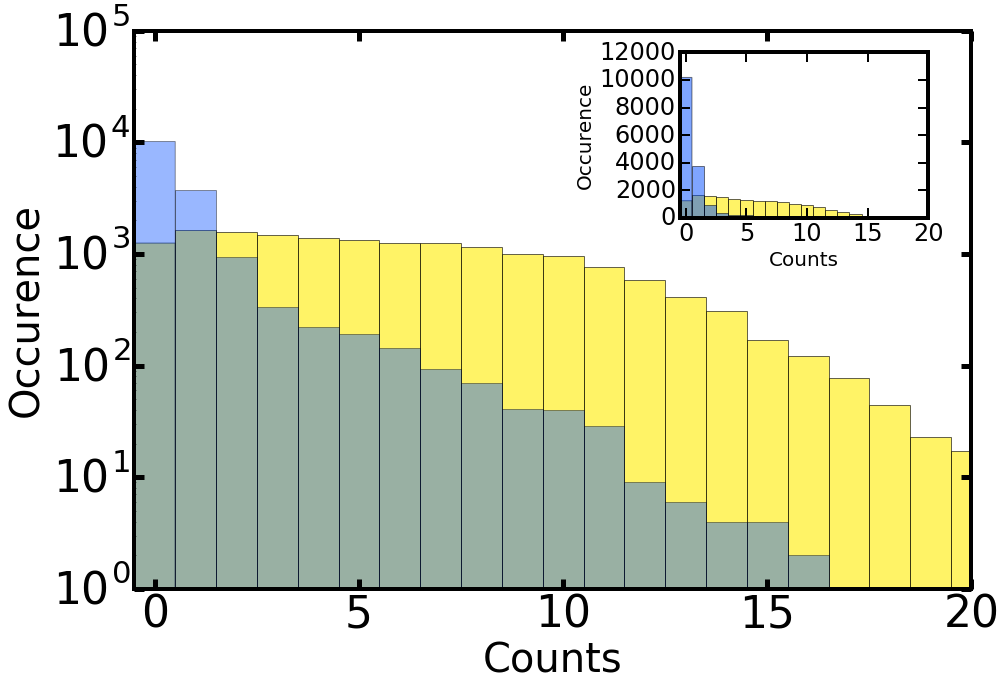

In [24]:
# Read in the data
rcParams['axes.linewidth'] = 4
from scipy.optimize import curve_fit
rcParams["figure.figsize"] = 15, 10
import matplotlib.pyplot as plt

hst_b = np.loadtxt('Z:/Group_Share/Barium/Data/2018.dir/09.dir/2018_09_11.dir/00173 - Rabi_hist.csv', delimiter = ',')
hst_d = np.loadtxt('Z:/Group_Share/Barium/Data/2018.dir/09.dir/2018_09_11.dir/00167 - Rabi_hist.csv', delimiter = ',')

discriminator = 2
dc_threshold = 14

dc_counts = hst_b[:,1]
sd_counts = hst_b[:,2]

sd_new_b = np.array([])

for i in range(len(sd_counts)):
    if dc_counts[i] > dc_threshold:
        sd_new_b = np.append(sd_new_b, sd_counts[i])


dc_counts = hst_d[:,1]
sd_counts = hst_d[:,2]

sd_new_d = np.array([])

for i in range(len(sd_counts)):
    if dc_counts[i] > dc_threshold:
        sd_new_d = np.append(sd_new_d, sd_counts[i])

        
bright_counts = sd_new_b
dark_counts = sd_new_d
counts = np.concatenate((bright_counts,dark_counts), axis = 0)
bright_err = np.where(bright_counts <= discriminator)
dark_err = np.where(dark_counts > discriminator)

bright_err = len(bright_err[0])
dark_err = len(dark_err[0])
tot_err = bright_err + dark_err
bins_bright = int(bright_counts.max())
bins_dark = int(dark_counts.max())

print "Number of bright errors: ", bright_err
print "Fractional error :", "{:.5f}".format(float(bright_err)/len(bright_counts))
print "Fidelity :", "{:.5f}".format(1 - float(bright_err)/len(bright_counts)), '+/- ', "{:.1e}".format(np.sqrt(bright_err)/len(bright_counts))
print "Number of exps: ", len(bright_counts), '\n'

print "Number of dark errors: ", dark_err
print "Fractional error :", "{:.5f}".format(float(dark_err)/len(dark_counts))
print "Fidelity :", "{:.5f}".format(1 - float(dark_err)/len(dark_counts)), '+/- ', "{:.1e}".format(np.sqrt(dark_err)/len(dark_counts))
print "Number of exps: ", len(dark_counts), '\n'

print "Number of errors: ", tot_err
print "Fractional error :", "{:.5f}".format(float(tot_err)/len(counts))
print "Fidelity :", "{:.5f}".format(1 - float(tot_err)/len(counts)), '+/- ', "{:.1e}".format(np.sqrt(tot_err)/len(counts))
print "Number of exps: ", len(counts)


#hist_dat_bright = plt.hist(bright_counts, bins_bright, color  = '#FFEB00', alpha = 1, align ='left', edgecolor = 'black')
#hist_dat_dark = plt.hist(dark_counts, bins_dark, color =  '#004CFF', alpha = 1, align ='left', edgecolor = 'black')

hist_dat_bright = plt.hist(bright_counts, bins_bright, color  = '#FFEB00', alpha = .6, align ='left',edgecolor = 'black', log=True)
hist_dat_dark = plt.hist(dark_counts, bins_dark, color = '#004CFF',alpha = .4, align ='left', edgecolor = 'black', log=True)


#title(str(t_points[num]) + ' us Shelving Time', fontsize = 46)
plt.xlabel('Counts', fontsize = 40)
plt.ylabel('Occurence', fontsize = 40)
plt.xlim([-.5, 20])
#ylim([0,10])
#plt.plot([discriminator,discriminator], [0,12000],color = 'r', linewidth = 4)
plt.tick_params(labelsize = 44)
plt.tick_params(width=5, length=10)


a = plt.axes([.63,.64,.23,.23])
hist_dat_bright = plt.hist(bright_counts, bins_bright, color  = '#FFEB00', alpha = .6, align ='left', edgecolor = 'black')
hist_dat_dark = plt.hist(dark_counts, bins_dark, color = '#004CFF', alpha = .5, align ='left', edgecolor = 'black')
plt.plot([discriminator,discriminator], [0,25],color = '#FF0000', linewidth = 4)
plt.xlabel('Counts', fontsize = 20)
plt.ylabel('Occurence', fontsize = 20)
plt.xlim([-0.5,20])
#plt.ylim([0,2000])
plt.tick_params(labelsize = 24)
plt.tick_params(width=2, length=10)
plt.show()

#savefig('spin12_hist_no_bg.png', bbox_inches='tight', transparent = True)
#savefig('spin12_hist_no_bg.pdf', bbox_inches='tight', transparent = True)
#savefig('spin12_hist_no_bg.eps', bbox_inches='tight', format='eps', dpi = 1000, transparent = True)

## 9/14/18 Composite Pulse with addtional pi-pulse on zeeman state

Pulse number:  16    Fidelity:  9.8753e-01    Number of errors:  135    Number of exps:  10823    Error:  1.1e-03
Pulse number:  24    Fidelity:  9.7753e-01    Number of errors:  251    Number of exps:  11170    Error:  1.4e-03
Pulse number:  17    Fidelity:  9.9717e-01    Number of errors:  57    Number of exps:  20127    Error:  3.8e-04
Pulse number:  25    Fidelity:  9.9593e-01    Number of errors:  74    Number of exps:  18192    Error:  4.7e-04
Pulse number w/ zeeman:  17    Fidelity:  9.9281e-01    Number of errors:  145    Number of exps:  20175    Error:  6.0e-04
Pulse number w/ zeeman:  25    Fidelity:  9.8794e-01    Number of errors:  205    Number of exps:  17001    Error:  8.4e-04


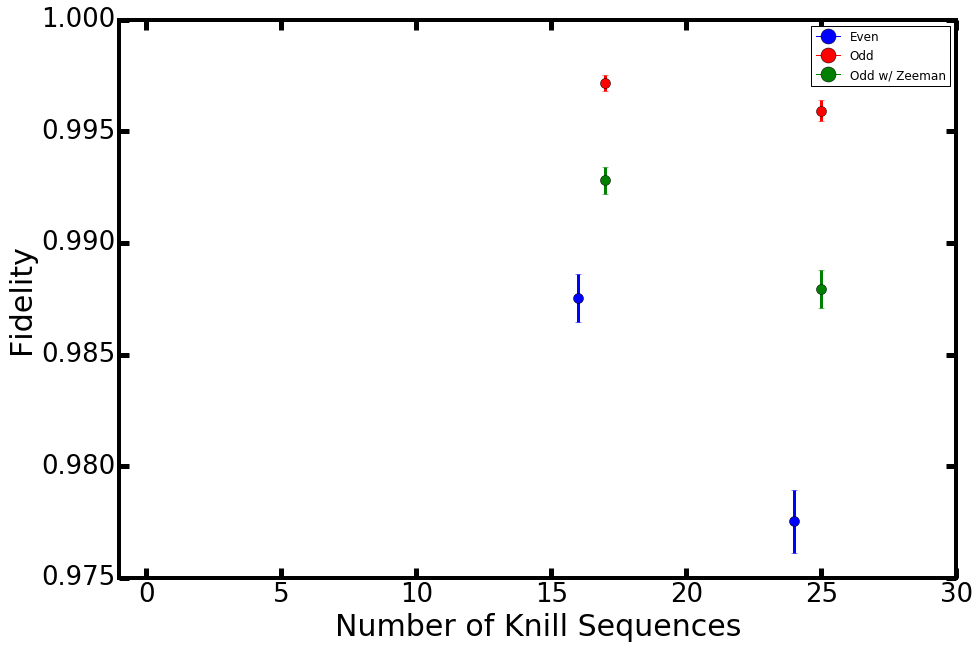

In [320]:
# Read in the data
rcParams['axes.linewidth'] = 4
from scipy.optimize import curve_fit
rcParams["figure.figsize"] = 15, 10
rcParams['legend.numpoints'] = 1
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

hst_16cp = np.loadtxt('Z:/Group_Share/Barium/Data/2018.dir/09.dir/2018_09_14.dir/00162 - Rabi_hist.csv', delimiter = ',')
hst_17cp = np.loadtxt('Z:/Group_Share/Barium/Data/2018.dir/09.dir/2018_09_14.dir/00159 - Rabi_hist.csv', delimiter = ',')
hst_17cp_z = np.loadtxt('Z:/Group_Share/Barium/Data/2018.dir/09.dir/2018_09_14.dir/00171 - Rabi_hist.csv', delimiter = ',')
hst_24cp = np.loadtxt('Z:/Group_Share/Barium/Data/2018.dir/09.dir/2018_09_14.dir/00189 - Rabi_hist.csv', delimiter = ',')
hst_25cp = np.loadtxt('Z:/Group_Share/Barium/Data/2018.dir/09.dir/2018_09_14.dir/00174 - Rabi_hist.csv', delimiter = ',')
hst_25cp_z = np.loadtxt('Z:/Group_Share/Barium/Data/2018.dir/09.dir/2018_09_14.dir/00177 - Rabi_hist.csv', delimiter = ',')

hist_b = { 16:hst_16cp, 24:hst_24cp}
hist_d = {17:hst_17cp, 25:hst_25cp}
hist_d_z = {17:hst_17cp_z, 25:hst_25cp_z}

discriminator = 11
dc_threshold = 28

sd_hist_b = {}
sd_hist_d = {}
sd_hist_d_z = {}

for key in hist_b:
    dc_counts = hist_b[key][:,1]
    sd_counts = hist_b[key][:,2]
    sd_new_b = np.array([])
    
    for i in range(len(sd_counts)):
        if dc_counts[i] > dc_threshold:
            sd_new_b = np.append(sd_new_b, sd_counts[i])
    
    sd_hist_b[key] = sd_new_b

    
for key in hist_d:
    dc_counts = hist_d[key][:,1]
    sd_counts = hist_d[key][:,2]
    sd_new_d = np.array([])
    
    for i in range(len(sd_counts)):
        if dc_counts[i] > dc_threshold:
            sd_new_d = np.append(sd_new_d, sd_counts[i])
    
    sd_hist_d[key] = sd_new_d    

for key in hist_d_z:
    dc_counts = hist_d_z[key][:,1]
    sd_counts = hist_d_z[key][:,2]
    sd_new_d_z = np.array([])
    
    for i in range(len(sd_counts)):
        if dc_counts[i] > dc_threshold:
            sd_new_d_z = np.append(sd_new_d_z, sd_counts[i])
    
    sd_hist_d_z[key] = sd_new_d_z      
    
hist_b_fid = {}
hist_d_fid = {}    
hist_d_z_fid = {}    
hist_b_err = {}
hist_d_err = {}
hist_d_z_err = {}

fig, ax = plt.subplots()
for key in sd_hist_b:
    hist_b_err[key] = len(np.where(sd_hist_b[key] <= discriminator)[0])
    hist_b_fid[key] = float(hist_b_err[key])/len(sd_hist_b[key])
    
    ax.plot(key,1 - hist_b_fid[key], 'o', color = 'b', markersize = 10)
    ax.errorbar(key,1 - hist_b_fid[key], yerr= np.sqrt(hist_b_err[key])/len(sd_hist_b[key]), color='b', linewidth = 3)
    
for key in sd_hist_d:
    hist_d_err[key] = len(np.where(sd_hist_d[key] >= discriminator)[0])
    hist_d_fid[key] = float(hist_d_err[key])/len(sd_hist_d[key])    
    
    ax.plot(key, 1- hist_d_fid[key], 'o', color = 'r', markersize = 10)
    ax.errorbar(key,1- hist_d_fid[key], yerr= np.sqrt(hist_d_err[key])/len(sd_hist_d[key]), color='r', linewidth = 3)
    

for key in sd_hist_d_z:
    hist_d_z_err[key] = len(np.where(sd_hist_d_z[key] >= discriminator)[0])
    hist_d_z_fid[key] = float(hist_d_z_err[key])/len(sd_hist_d_z[key])    
    
    ax.plot(key, 1- hist_d_z_fid[key], 'o', color = 'g', markersize = 10)
    ax.errorbar(key,1- hist_d_z_fid[key], yerr= np.sqrt(hist_d_z_err[key])/len(sd_hist_d_z[key]), color='g', linewidth = 3)    
    
plt.xlim([-1,30])    
plt.xlabel('Number of Knill Sequences', fontsize = 30)
plt.ylabel('Fidelity', fontsize = 30)
plt.tick_params(labelsize = 26)
plt.tick_params(width=5, length=10)

legend_elements = [Line2D([0], [0], color='b', marker = 'o', label='Even', markersize = 15),
                   Line2D([0], [0], marker='o', color='r', label='Odd', markersize=15),
                  Line2D([0], [0], marker='o', color='g', label='Odd w/ Zeeman', markersize=15)]
ax.legend(handles=legend_elements, loc='upper right')



for key in sorted(sd_hist_b):
    print 'Pulse number: ', key, '   Fidelity: ', '{:.4e}'.format(1- hist_b_fid[key]), '   Number of errors: ', \
    hist_b_err[key], '   Number of exps: ', len(sd_hist_b[key]), '   Error: ', \
    '{:.1e}'.format(np.sqrt(hist_b_err[key])/len(sd_hist_b[key]))

    
for key in sorted(sd_hist_d):
    print 'Pulse number: ', key, '   Fidelity: ', '{:.4e}'.format(1- hist_d_fid[key]), '   Number of errors: ', \
    hist_d_err[key], '   Number of exps: ', len(sd_hist_d[key]), '   Error: ', \
    '{:.1e}'.format(np.sqrt(hist_d_err[key])/len(sd_hist_d[key]))
    
for key in sorted(sd_hist_d_z):
    print 'Pulse number w/ zeeman: ', key, '   Fidelity: ', '{:.4e}'.format(1- hist_d_z_fid[key]), '   Number of errors: ', \
    hist_d_z_err[key], '   Number of exps: ', len(sd_hist_d_z[key]), '   Error: ', \
    '{:.1e}'.format(np.sqrt(hist_d_z_err[key])/len(sd_hist_d_z[key]))    

## Ramsey Fringes & Coherence Time

[  0. 100. 200. 300. 400. 500. 600. 700. 800. 900.]
Detuning (kHz):  0.99646 0.00015
Amplitude:  1.019
Time Constant (t):  0.404 0.182
Time Constant (t^2):  0.808


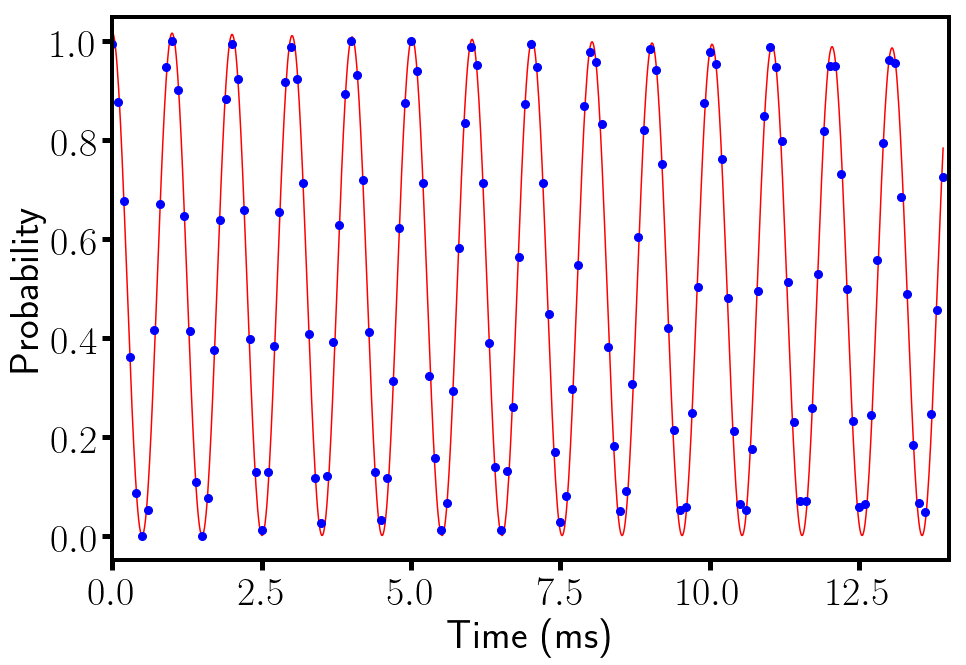

In [4]:
from scipy.optimize import curve_fit
from scipy.special import factorial
# Fit Poisson distributions to both
rcParams['axes.linewidth'] = 4
rcParams["figure.figsize"] = 15, 10

def ramsey1(x, delta, A, tau):
    return A*np.cos(delta*x/2)**2*np.exp(-x/tau)


def ramsey2(x, delta, A, tau):
    return A*np.cos(delta*x/2)**2*np.exp(-(x/tau))**2
                                         
data = np.loadtxt('Z:/Group_Share/Barium/Data/2018.dir/09.dir/2018_09_13.dir/00091 - Ramsey_prob.csv', delimiter = ',')
#data1 = np.loadtxt('Z:/Group_Share/Barium/Data/2018.dir/08.dir/2018_08_01.dir/00143 - RabiFlopping_prob.csv', delimiter = ',')


t = data[:,0]*1e-6
prob = data[:,1]

print data[:10,0]

#t = np.concatenate((data[:,0], data1[:,0]), axis = 0)*1e-6
#prob = np.concatenate((data[:,1], data1[:,1]), axis = 0)

ramsey1_fit, ramsey1_err = curve_fit(ramsey1,t, prob, p0 = [2*np.pi*1.e3,1, 500e-3])
ramsey2_fit, ramsey2_err = curve_fit(ramsey2,t, prob, p0 = [2*np.pi*1.e3,1, 500e-3])
       
    
print 'Detuning (kHz): ', '{:.5f}'.format(ramsey1_fit[0]/2/np.pi/1e3) , '{:.5f}'.format(np.sqrt(ramsey1_err[0,0])/2/np.pi/1e3)
print 'Amplitude: ', '{:.3f}'.format(ramsey1_fit[1])
print 'Time Constant (t): ', '{:.3f}'.format(ramsey1_fit[2]), '{:.3f}'.format(np.sqrt(ramsey1_err[2,2]))
print 'Time Constant (t^2): ', '{:.3f}'.format(ramsey2_fit[2])


x_fit = np.linspace(0,t[-1],1000)
y1_fit = ramsey1(x_fit, ramsey1_fit[0], ramsey1_fit[1], ramsey1_fit[2])
y2_fit = ramsey2(x_fit, ramsey2_fit[0], ramsey2_fit[1], ramsey2_fit[2])

#red_chi_ramsey1 = np.sum(y1_fit - prob)**2/(len(prob) - 3)
#red_chi_ramsey2 = np.sum(y2_fit - prob)**2/(len(prob) - 3)

#print red_chi_ramsey1
#print red_chi_ramsey2

plot(x_fit*1e3, y1_fit, color = 'r', linewidth = 1.5)
plot(t*1e3,prob,'o',color = 'b', markersize = 8)
xlim([0,14])
ylim([-0.05,1.05])
xlabel('Time (ms)', fontsize = 40)
ylabel('Probability', fontsize = 40)
tick_params(labelsize = 40)
tick_params(width=5, length=10)

#savefig('ramsey_no_bg_google.png', bbox_inches='tight', transparent = True)
#savefig('ramsey_no_bg.pdf', bbox_inches='tight', transparent = True)
#savefig('ramsey_no_bg.eps', bbox_inches='tight', format='eps', dpi = 1000)

show()

Pulse number:  10    Fidelity:  9.9737e-01    Number of errors:  34    Number of exps:  12937    Error:  4.5e-04
Pulse number:  16    Fidelity:  9.9710e-01    Number of errors:  51    Number of exps:  17576    Error:  4.1e-04
Pulse number:  24    Fidelity:  9.9604e-01    Number of errors:  112    Number of exps:  28265    Error:  3.7e-04
Pulse number:  11    Fidelity:  9.9789e-01    Number of errors:  19    Number of exps:  9012    Error:  4.8e-04
Pulse number:  17    Fidelity:  9.9701e-01    Number of errors:  50    Number of exps:  16739    Error:  4.2e-04
Pulse number:  25    Fidelity:  9.9591e-01    Number of errors:  62    Number of exps:  15157    Error:  5.2e-04
Pulse number w/ zeeman:  17    Fidelity:  9.9900e-01    Number of errors:  20    Number of exps:  19995    Error:  2.2e-04
Pulse number w/ zeeman:  25    Fidelity:  9.9871e-01    Number of errors:  13    Number of exps:  10116    Error:  3.6e-04


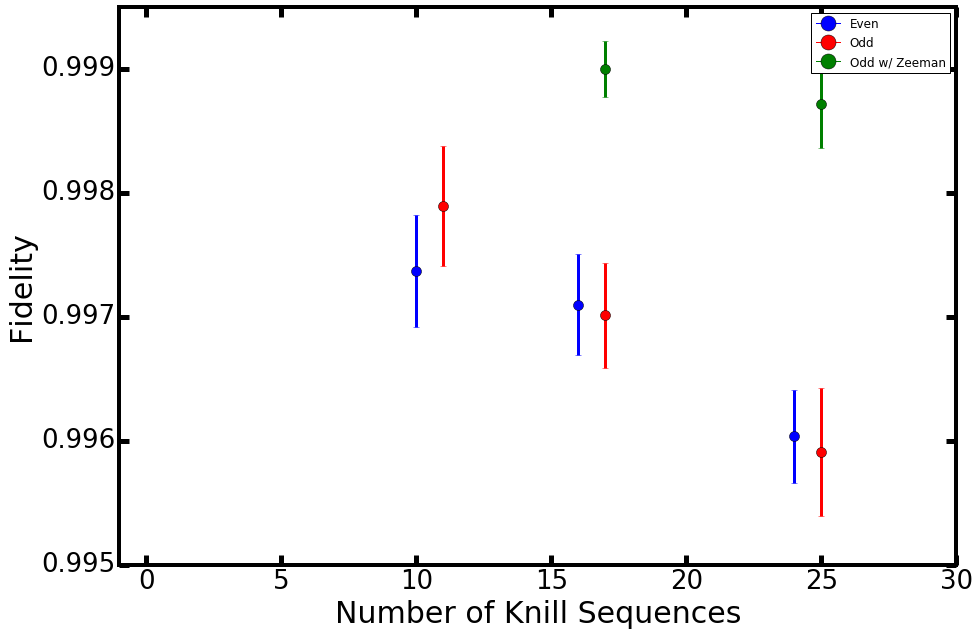

In [338]:
# Read in the data
rcParams['axes.linewidth'] = 4
from scipy.optimize import curve_fit
rcParams["figure.figsize"] = 15, 10
rcParams['legend.numpoints'] = 1
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

hst_10cp = np.loadtxt('Z:/Group_Share/Barium/Data/2018.dir/09.dir/2018_09_17.dir/00110 - Microwave_hist.csv', delimiter = ',')
hst_11cp = np.loadtxt('Z:/Group_Share/Barium/Data/2018.dir/09.dir/2018_09_17.dir/00104 - Microwave_hist.csv', delimiter = ',')
hst_16cp = np.loadtxt('Z:/Group_Share/Barium/Data/2018.dir/09.dir/2018_09_17.dir/00125 - Microwave_hist.csv', delimiter = ',')
hst_17cp = np.loadtxt('Z:/Group_Share/Barium/Data/2018.dir/09.dir/2018_09_17.dir/00113 - Microwave_hist.csv', delimiter = ',')
hst_17cp_z = np.loadtxt('Z:/Group_Share/Barium/Data/2018.dir/09.dir/2018_09_17.dir/00131 - Microwave_hist.csv', delimiter = ',')
hst_24cp = np.loadtxt('Z:/Group_Share/Barium/Data/2018.dir/09.dir/2018_09_17.dir/00140 - Microwave_hist.csv', delimiter = ',')
hst_25cp = np.loadtxt('Z:/Group_Share/Barium/Data/2018.dir/09.dir/2018_09_17.dir/00143 - Microwave_hist.csv', delimiter = ',')
hst_25cp_z = np.loadtxt('Z:/Group_Share/Barium/Data/2018.dir/09.dir/2018_09_17.dir/00146 - Microwave_hist.csv', delimiter = ',')

hist_b = {10: hst_10cp, 16:hst_16cp, 24:hst_24cp}
hist_d = {11:hst_11cp, 17:hst_17cp, 25:hst_25cp}
hist_d_z = {17:hst_17cp_z, 25:hst_25cp_z}

discriminator = 11
dc_threshold = 28

sd_hist_b = {}
sd_hist_d = {}
sd_hist_d_z = {}

for key in hist_b:
    dc_counts = hist_b[key][:,1]
    sd_counts = hist_b[key][:,2]
    sd_new_b = np.array([])
    
    for i in range(len(sd_counts)):
        if dc_counts[i] > dc_threshold:
            sd_new_b = np.append(sd_new_b, sd_counts[i])
    
    sd_hist_b[key] = sd_new_b

    
for key in hist_d:
    dc_counts = hist_d[key][:,1]
    sd_counts = hist_d[key][:,2]
    sd_new_d = np.array([])
    
    for i in range(len(sd_counts)):
        if dc_counts[i] > dc_threshold:
            sd_new_d = np.append(sd_new_d, sd_counts[i])
    
    sd_hist_d[key] = sd_new_d    

for key in hist_d_z:
    dc_counts = hist_d_z[key][:,1]
    sd_counts = hist_d_z[key][:,2]
    sd_new_d_z = np.array([])
    
    for i in range(len(sd_counts)):
        if dc_counts[i] > dc_threshold:
            sd_new_d_z = np.append(sd_new_d_z, sd_counts[i])
    
    sd_hist_d_z[key] = sd_new_d_z      
    
hist_b_fid = {}
hist_d_fid = {}    
hist_d_z_fid = {}    
hist_b_err = {}
hist_d_err = {}
hist_d_z_err = {}

fig, ax = plt.subplots()
for key in sd_hist_b:
    hist_b_err[key] = len(np.where(sd_hist_b[key] <= discriminator)[0])
    hist_b_fid[key] = float(hist_b_err[key])/len(sd_hist_b[key])
    
    ax.plot(key,1 - hist_b_fid[key], 'o', color = 'b', markersize = 10)
    ax.errorbar(key,1 - hist_b_fid[key], yerr= np.sqrt(hist_b_err[key])/len(sd_hist_b[key]), color='b', linewidth = 3)
    
for key in sd_hist_d:
    hist_d_err[key] = len(np.where(sd_hist_d[key] >= discriminator)[0])
    hist_d_fid[key] = float(hist_d_err[key])/len(sd_hist_d[key])    
    
    ax.plot(key, 1- hist_d_fid[key], 'o', color = 'r', markersize = 10)
    ax.errorbar(key,1- hist_d_fid[key], yerr= np.sqrt(hist_d_err[key])/len(sd_hist_d[key]), color='r', linewidth = 3)
    

for key in sd_hist_d_z:
    hist_d_z_err[key] = len(np.where(sd_hist_d_z[key] >= discriminator)[0])
    hist_d_z_fid[key] = float(hist_d_z_err[key])/len(sd_hist_d_z[key])    
    
    ax.plot(key, 1- hist_d_z_fid[key], 'o', color = 'g', markersize = 10)
    ax.errorbar(key,1- hist_d_z_fid[key], yerr= np.sqrt(hist_d_z_err[key])/len(sd_hist_d_z[key]), color='g', linewidth = 3)    
    
plt.xlim([-1,30])    
plt.xlabel('Number of Knill Sequences', fontsize = 30)
plt.ylabel('Fidelity', fontsize = 30)
plt.tick_params(labelsize = 26)
plt.tick_params(width=5, length=10)

legend_elements = [Line2D([0], [0], color='b', marker = 'o', label='Even', markersize = 15),
                   Line2D([0], [0], marker='o', color='r', label='Odd', markersize=15),
                  Line2D([0], [0], marker='o', color='g', label='Odd w/ Zeeman', markersize=15)]
ax.legend(handles=legend_elements, loc='upper right')



for key in sorted(sd_hist_b):
    print 'Pulse number: ', key, '   Fidelity: ', '{:.4e}'.format(1- hist_b_fid[key]), '   Number of errors: ', \
    hist_b_err[key], '   Number of exps: ', len(sd_hist_b[key]), '   Error: ', \
    '{:.1e}'.format(np.sqrt(hist_b_err[key])/len(sd_hist_b[key]))

    
for key in sorted(sd_hist_d):
    print 'Pulse number: ', key, '   Fidelity: ', '{:.4e}'.format(1- hist_d_fid[key]), '   Number of errors: ', \
    hist_d_err[key], '   Number of exps: ', len(sd_hist_d[key]), '   Error: ', \
    '{:.1e}'.format(np.sqrt(hist_d_err[key])/len(sd_hist_d[key]))
    
for key in sorted(sd_hist_d_z):
    print 'Pulse number w/ zeeman: ', key, '   Fidelity: ', '{:.4e}'.format(1- hist_d_z_fid[key]), '   Number of errors: ', \
    hist_d_z_err[key], '   Number of exps: ', len(sd_hist_d_z[key]), '   Error: ', \
    '{:.1e}'.format(np.sqrt(hist_d_z_err[key])/len(sd_hist_d_z[key]))    

## Composite Pulse MW Scan

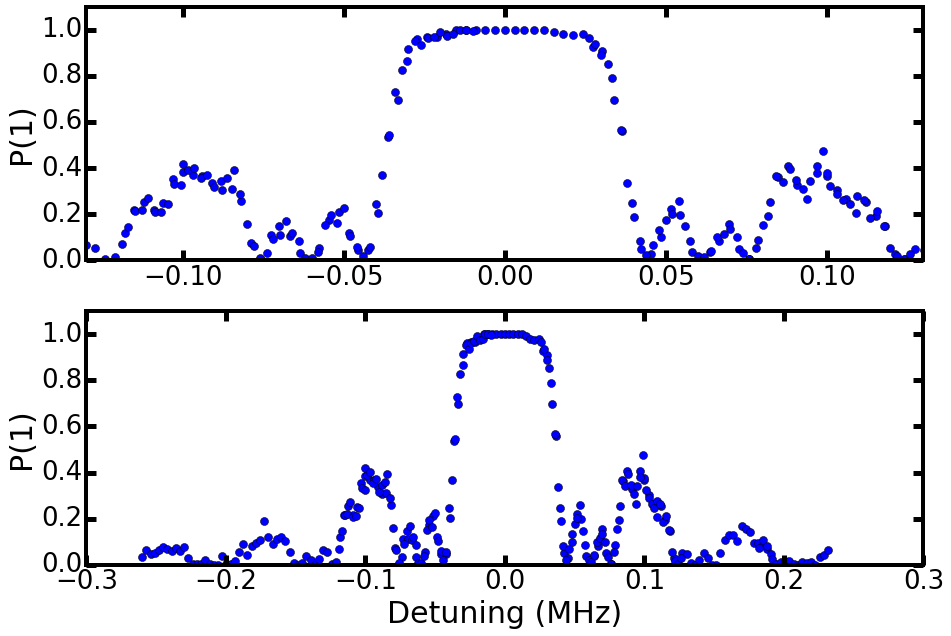

In [349]:
# Read in the data
rcParams['axes.linewidth'] = 4
from scipy.optimize import curve_fit
rcParams["figure.figsize"] = 15, 10
rcParams['legend.numpoints'] = 1
import matplotlib.pyplot as plt

data0 = np.loadtxt('Z:/Group_Share/Barium/Data/2018.dir/09.dir/2018_09_17.dir/00168 - MicrowaveSweep_prob.csv', delimiter = ',')
data1 = np.loadtxt('Z:/Group_Share/Barium/Data/2018.dir/09.dir/2018_09_17.dir/00171 - MicrowaveSweep_prob.csv', delimiter = ',')
data2 = np.loadtxt('Z:/Group_Share/Barium/Data/2018.dir/09.dir/2018_09_17.dir/00174 - MicrowaveSweep_prob.csv', delimiter = ',')
data3 = np.loadtxt('Z:/Group_Share/Barium/Data/2018.dir/09.dir/2018_09_17.dir/00177 - MicrowaveSweep_prob.csv', delimiter = ',')
data4 = np.loadtxt('Z:/Group_Share/Barium/Data/2018.dir/09.dir/2018_09_17.dir/00180 - MicrowaveSweep_prob.csv', delimiter = ',')
data5 = np.loadtxt('Z:/Group_Share/Barium/Data/2018.dir/09.dir/2018_09_17.dir/00183 - MicrowaveSweep_prob.csv', delimiter = ',')
data6 = np.loadtxt('Z:/Group_Share/Barium/Data/2018.dir/09.dir/2018_09_17.dir/00186 - MicrowaveSweep_prob.csv', delimiter = ',')
data7 = np.loadtxt('Z:/Group_Share/Barium/Data/2018.dir/09.dir/2018_09_17.dir/00189 - MicrowaveSweep_prob.csv', delimiter = ',')


data = {0:data0, 1:data1, 2:data2, 3:data3, 4:data4, 5:data5, 6:data6, 7:data7}

f0 = 9925.464600
freq = np.array([])
prob = np.array([])
for key in data:
    freq = np.append(freq, data[key][:,0])
    prob = np.append(prob, data[key][:,1])

subplot(2,1,1)
det = freq - f0
plot(det, prob, 'o', color = 'b', markersize = 8)
xlim([-.13, .13])
ylim([0,1.1])
ylabel('P(1)', fontsize = 30)
tick_params(labelsize = 26)
tick_params(width=5, length=10)
subplot(2,1,2)
det = freq - f0
plot(det, prob, 'o', color = 'b', markersize = 8)
xlabel('Detuning (MHz)', fontsize = 30)
ylabel('P(1)', fontsize = 30)
tick_params(labelsize = 26)
tick_params(width=5, length=10)
ylim([0,1.1])
show()


### 11/27/18 More Stacked Composite Pulses

Pulse number:  4    Fidelity:  9.9908e-01    Number of errors:  20    Number of exps:  21784    Error:  2.1e-04
Pulse number:  10    Fidelity:  9.9754e-01    Number of errors:  48    Number of exps:  19482    Error:  3.6e-04
Pulse number:  3    Fidelity:  9.9959e-01    Number of errors:  5    Number of exps:  12201    Error:  1.8e-04
Pulse number:  11    Fidelity:  9.9760e-01    Number of errors:  49    Number of exps:  20378    Error:  3.4e-04


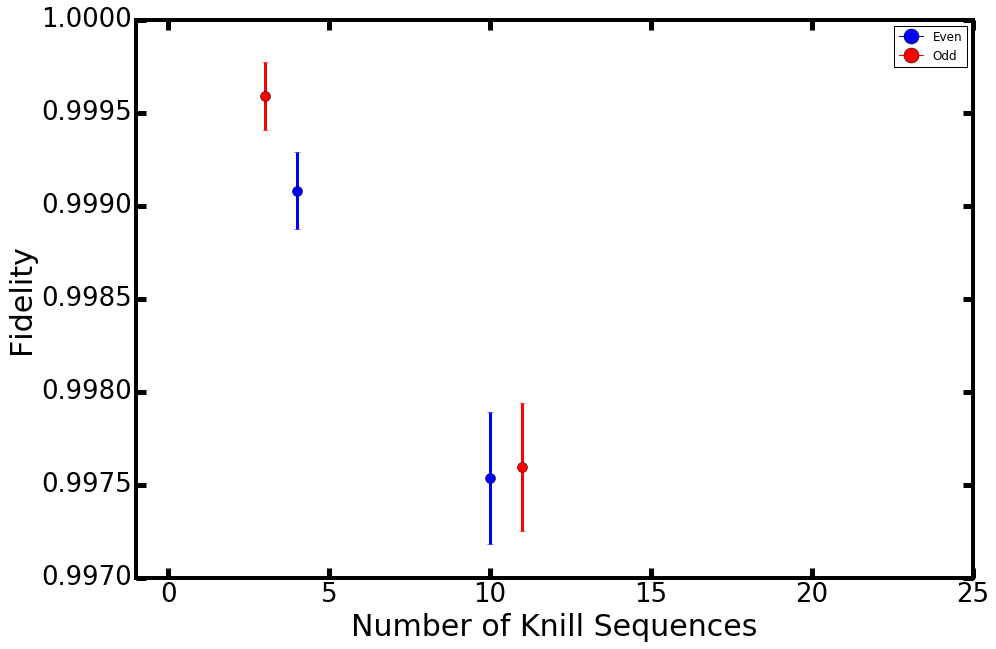

In [417]:
# Read in the data
rcParams['axes.linewidth'] = 4
from scipy.optimize import curve_fit
rcParams["figure.figsize"] = 15, 10
rcParams['legend.numpoints'] = 1
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

hst_3cp = np.loadtxt('Z:/Group_Share/Barium/Data/2018.dir/11.dir/2018_11_27.dir/00148 - Microwave_hist.csv', delimiter = ',')
hst_4cp = np.loadtxt('Z:/Group_Share/Barium/Data/2018.dir/11.dir/2018_11_27.dir/00151 - Microwave_hist.csv', delimiter = ',')
hst_10cp1 = np.loadtxt('Z:/Group_Share/Barium/Data/2018.dir/11.dir/2018_11_27.dir/00142 - Microwave_hist.csv', delimiter = ',')
hst_10cp2 = np.loadtxt('Z:/Group_Share/Barium/Data/2018.dir/11.dir/2018_11_27.dir/00145 - Microwave_hist.csv', delimiter = ',')
hst_11cp1 = np.loadtxt('Z:/Group_Share/Barium/Data/2018.dir/11.dir/2018_11_27.dir/00139 - Microwave_hist.csv', delimiter = ',')
hst_11cp2 = np.loadtxt('Z:/Group_Share/Barium/Data/2018.dir/11.dir/2018_11_27.dir/00136 - Microwave_hist.csv', delimiter = ',')


hist_b = {4:hst_4cp, 10: np.concatenate((hst_10cp1,hst_10cp2))}
hist_d = {3:hst_1cp, 11: np.concatenate((hst_11cp1,hst_11cp2))}

discriminator = 11
dc_threshold = 10

sd_hist_b = {}
sd_hist_d = {}

for key in hist_b:
    dc_counts = hist_b[key][:,1]
    sd_counts = hist_b[key][:,2]
    sd_new_b = np.array([])
    
    for i in range(len(sd_counts)):
        if dc_counts[i] > dc_threshold:
            sd_new_b = np.append(sd_new_b, sd_counts[i])
    
    sd_hist_b[key] = sd_new_b

    
for key in hist_d:
    dc_counts = hist_d[key][:,1]
    sd_counts = hist_d[key][:,2]
    sd_new_d = np.array([])
    
    for i in range(len(sd_counts)):
        if dc_counts[i] > dc_threshold:
            sd_new_d = np.append(sd_new_d, sd_counts[i])
    
    sd_hist_d[key] = sd_new_d    

hist_b_fid = {}
hist_d_fid = {}    
hist_b_err = {}
hist_d_err = {}

fig, ax = plt.subplots()
for key in sd_hist_b:
    hist_b_err[key] = len(np.where(sd_hist_b[key] <= discriminator)[0])
    hist_b_fid[key] = float(hist_b_err[key])/len(sd_hist_b[key])
    
    ax.plot(key,1 - hist_b_fid[key], 'o', color = 'b', markersize = 10)
    ax.errorbar(key,1 - hist_b_fid[key], yerr= np.sqrt(hist_b_err[key])/len(sd_hist_b[key]), color='b', linewidth = 3)
    
for key in sd_hist_d:
    hist_d_err[key] = len(np.where(sd_hist_d[key] >= discriminator)[0])
    hist_d_fid[key] = float(hist_d_err[key])/len(sd_hist_d[key])    
    
    ax.plot(key, 1- hist_d_fid[key], 'o', color = 'r', markersize = 10)
    ax.errorbar(key,1- hist_d_fid[key], yerr= np.sqrt(hist_d_err[key])/len(sd_hist_d[key]), color='r', linewidth = 3)    
plt.xlim([-1,25])    
plt.xlabel('Number of Knill Sequences', fontsize = 30)
plt.ylabel('Fidelity', fontsize = 30)
plt.tick_params(labelsize = 26)
plt.tick_params(width=5, length=10)

legend_elements = [Line2D([0], [0], color='b', marker = 'o', label='Even', markersize = 15),
                   Line2D([0], [0], marker='o', color='r', label='Odd', markersize=15)]
ax.legend(handles=legend_elements, loc='upper right')



for key in sorted(sd_hist_b):
    print 'Pulse number: ', key, '   Fidelity: ', '{:.4e}'.format(1- hist_b_fid[key]), '   Number of errors: ', \
    hist_b_err[key], '   Number of exps: ', len(sd_hist_b[key]), '   Error: ', \
    '{:.1e}'.format(np.sqrt(hist_b_err[key])/len(sd_hist_b[key]))

    
for key in sorted(sd_hist_d):
    print 'Pulse number: ', key, '   Fidelity: ', '{:.4e}'.format(1- hist_d_fid[key]), '   Number of errors: ', \
    hist_d_err[key], '   Number of exps: ', len(sd_hist_d[key]), '   Error: ', \
    '{:.1e}'.format(np.sqrt(hist_d_err[key])/len(sd_hist_d[key]))

### 11/30/18 Stacked Pi Pulses

Pi pulses with random phases in front should also be linear. We can look at the error and see if it makes sense with what we measure on the scope and with a Ramsey exp. This should tell us if the phase flips are causing problems. 

Pulse number:  1    Fidelity:  1.0089e-03    Number of errors:  15    Number of exps:  14867    Error:  2.6e-04
Pulse number:  5    Fidelity:  4.9481e-03    Number of errors:  124    Number of exps:  25060    Error:  4.4e-04
Pulse number:  9    Fidelity:  8.9472e-03    Number of errors:  167    Number of exps:  18665    Error:  6.9e-04
Pulse number:  13    Fidelity:  1.2000e-02    Number of errors:  245    Number of exps:  20417    Error:  7.7e-04
Pulse number:  17    Fidelity:  1.6101e-02    Number of errors:  336    Number of exps:  20868    Error:  8.8e-04
Slope:  9.309e-04 2.301e-05
Offset:  2.229e-04 2.446e-04


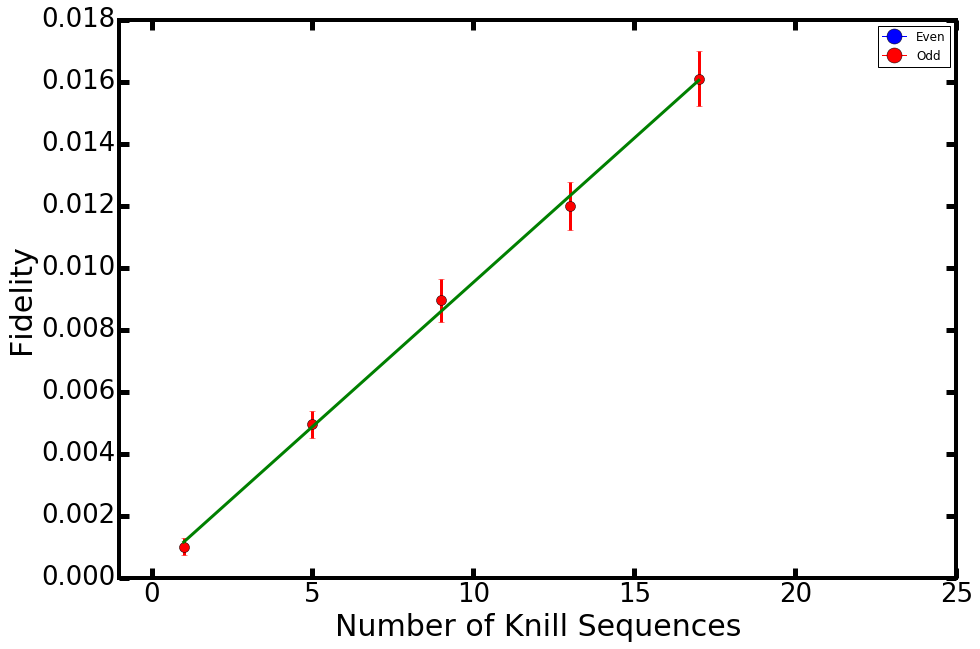

In [503]:
# Read in the data
rcParams['axes.linewidth'] = 4
from scipy.optimize import curve_fit
rcParams["figure.figsize"] = 15, 10
rcParams['legend.numpoints'] = 1
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

hst_5 = np.loadtxt('Z:/Group_Share/Barium/Data/2018.dir/11.dir/2018_11_30.dir/00064 - Rabi_hist.csv', delimiter = ',')
hst_1 = np.loadtxt('Z:/Group_Share/Barium/Data/2018.dir/11.dir/2018_11_30.dir/00058 - Rabi_hist.csv', delimiter = ',')
hst_9 = np.loadtxt('Z:/Group_Share/Barium/Data/2018.dir/11.dir/2018_11_30.dir/00067 - Rabi_hist.csv', delimiter = ',')
hst_13 = np.loadtxt('Z:/Group_Share/Barium/Data/2018.dir/11.dir/2018_11_30.dir/00070 - Rabi_hist.csv', delimiter = ',')
hst_17 = np.loadtxt('Z:/Group_Share/Barium/Data/2018.dir/11.dir/2018_11_30.dir/00073 - Rabi_hist.csv', delimiter = ',')

hist_b = {}# {4:hst_4cp, 10: np.concatenate((hst_10cp1,hst_10cp2))}
hist_d = {1:hst_1, 5: hst_5, 9:hst_9, 13:hst_13, 17:hst_17}

discriminator = 11
dc_threshold = 10

sd_hist_b = {}
sd_hist_d = {}

for key in hist_b:
    dc_counts = hist_b[key][:,1]
    sd_counts = hist_b[key][:,2]
    sd_new_b = np.array([])
    
    for i in range(len(sd_counts)):
        if dc_counts[i] > dc_threshold:
            sd_new_b = np.append(sd_new_b, sd_counts[i])
    
    sd_hist_b[key] = sd_new_b

    
for key in hist_d:
    dc_counts = hist_d[key][:,1]
    sd_counts = hist_d[key][:,2]
    sd_new_d = np.array([])
    
    for i in range(len(sd_counts)):
        if dc_counts[i] > dc_threshold:
            sd_new_d = np.append(sd_new_d, sd_counts[i])
    
    sd_hist_d[key] = sd_new_d    

hist_b_fid = {}
hist_d_fid = {}    
hist_b_err = {}
hist_d_err = {}

fig, ax = plt.subplots()
for key in sd_hist_b:
    hist_b_err[key] = len(np.where(sd_hist_b[key] <= discriminator)[0])
    hist_b_fid[key] = float(hist_b_err[key])/len(sd_hist_b[key])
    
    ax.plot(key,hist_b_fid[key], 'o', color = 'b', markersize = 10)
    ax.errorbar(key,hist_b_fid[key], yerr= np.sqrt(hist_b_err[key])/len(sd_hist_b[key]), color='b', linewidth = 3)
    
for key in sd_hist_d:
    hist_d_err[key] = len(np.where(sd_hist_d[key] >= discriminator)[0])
    hist_d_fid[key] = float(hist_d_err[key])/len(sd_hist_d[key])    
    
    ax.plot(key, hist_d_fid[key], 'o', color = 'r', markersize = 10)
    ax.errorbar(key, hist_d_fid[key], yerr= np.sqrt(hist_d_err[key])/len(sd_hist_d[key]), color='r', linewidth = 3)    
plt.xlim([-1,25])    
plt.xlabel('Number of Knill Sequences', fontsize = 30)
plt.ylabel('Fidelity', fontsize = 30)
plt.tick_params(labelsize = 26)
plt.tick_params(width=5, length=10)

legend_elements = [Line2D([0], [0], color='b', marker = 'o', label='Even', markersize = 15),
                   Line2D([0], [0], marker='o', color='r', label='Odd', markersize=15)]
ax.legend(handles=legend_elements, loc='upper right')



for key in sorted(sd_hist_b):
    print 'Pulse number: ', key, '   Fidelity: ', '{:.4e}'.format(1- hist_b_fid[key]), '   Number of errors: ', \
    hist_b_err[key], '   Number of exps: ', len(sd_hist_b[key]), '   Error: ', \
    '{:.1e}'.format(np.sqrt(hist_b_err[key])/len(sd_hist_b[key]))

    
for key in sorted(sd_hist_d):
    print 'Pulse number: ', key, '   Fidelity: ', '{:.4e}'.format(hist_d_fid[key]), '   Number of errors: ', \
    hist_d_err[key], '   Number of exps: ', len(sd_hist_d[key]), '   Error: ', \
    '{:.1e}'.format(np.sqrt(hist_d_err[key])/len(sd_hist_d[key]))
    
    
def line_fit(x, m, b):
    return x*m + b

x = np.array(sorted(hist_d_fid, key=lambda key: hist_d_fid[key]))
y = np.array(sorted(hist_d_fid.values()))

fit_line, err_line = curve_fit(line_fit ,x , y, p0 = [1.e-3, 0.0])

print 'Slope: ', '{:.3e}'.format(fit_line[0]), '{:.3e}'.format(np.sqrt(err_line[0,0]))
print 'Offset: ', '{:.3e}'.format(fit_line[1]), '{:.3e}'.format(np.sqrt(err_line[1,1]))
    

y_fit =  line_fit(x , fit_line[0], fit_line[1])

plot(x, y_fit, color = 'g', linewidth = 3)
show()


No DDS. Just the HP oscillator

Pulse number:  1    Fidelity:  1.1430e-03    Number of errors:  21    Number of exps:  18373    Error:  2.5e-04
Pulse number:  5    Fidelity:  1.1849e-03    Number of errors:  20    Number of exps:  16879    Error:  2.6e-04
Pulse number:  9    Fidelity:  1.6493e-03    Number of errors:  32    Number of exps:  19402    Error:  2.9e-04
Pulse number:  13    Fidelity:  2.0477e-03    Number of errors:  58    Number of exps:  28325    Error:  2.7e-04
Pulse number:  17    Fidelity:  2.6689e-03    Number of errors:  75    Number of exps:  28101    Error:  3.1e-04
coefficient:  5.401e-06 2.867e-07
Offset:  1.128e-03 4.428e-05


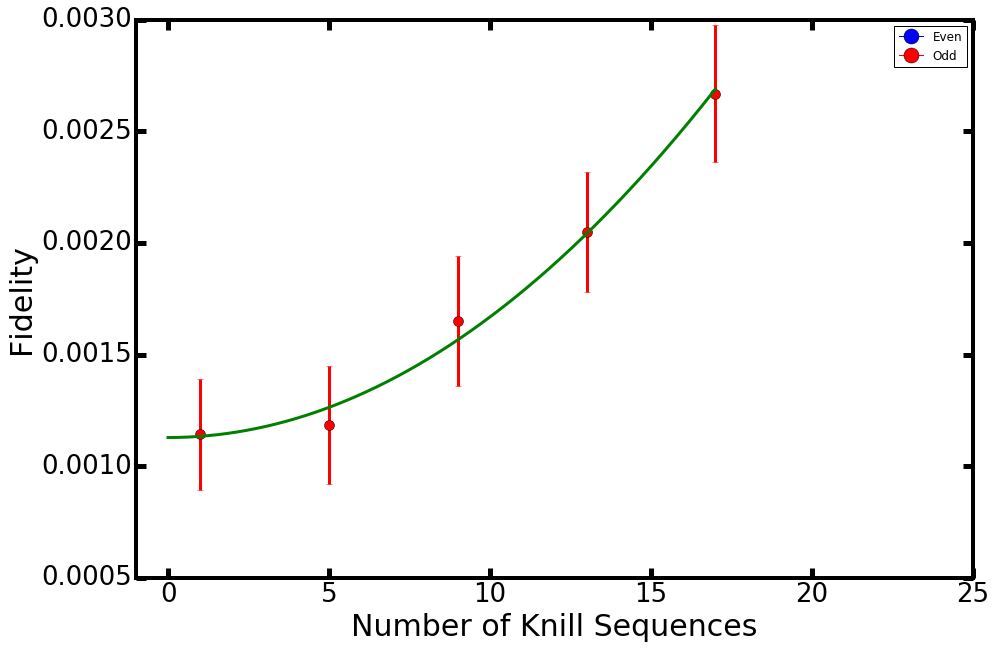

In [502]:
# Read in the data
rcParams['axes.linewidth'] = 4
from scipy.optimize import curve_fit
rcParams["figure.figsize"] = 15, 10
rcParams['legend.numpoints'] = 1
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

hst_5 = np.loadtxt('Z:/Group_Share/Barium/Data/2018.dir/11.dir/2018_11_30.dir/00109 - Rabi_hist.csv', delimiter = ',')
hst_1 = np.loadtxt('Z:/Group_Share/Barium/Data/2018.dir/11.dir/2018_11_30.dir/00112 - Rabi_hist.csv', delimiter = ',')
hst_9 = np.loadtxt('Z:/Group_Share/Barium/Data/2018.dir/11.dir/2018_11_30.dir/00115 - Rabi_hist.csv', delimiter = ',')
hst_13 = np.loadtxt('Z:/Group_Share/Barium/Data/2018.dir/11.dir/2018_11_30.dir/00118 - Rabi_hist.csv', delimiter = ',')
hst_17 = np.loadtxt('Z:/Group_Share/Barium/Data/2018.dir/11.dir/2018_11_30.dir/00121 - Rabi_hist.csv', delimiter = ',')

hist_b = {}# {4:hst_4cp, 10: np.concatenate((hst_10cp1,hst_10cp2))}
hist_d = {1:hst_1, 5: hst_5, 9:hst_9, 13:hst_13, 17:hst_17}

discriminator = 11
dc_threshold = 10

sd_hist_b = {}
sd_hist_d = {}

for key in hist_b:
    dc_counts = hist_b[key][:,1]
    sd_counts = hist_b[key][:,2]
    sd_new_b = np.array([])
    
    for i in range(len(sd_counts)):
        if dc_counts[i] > dc_threshold:
            sd_new_b = np.append(sd_new_b, sd_counts[i])
    
    sd_hist_b[key] = sd_new_b

    
for key in hist_d:
    dc_counts = hist_d[key][:,1]
    sd_counts = hist_d[key][:,2]
    sd_new_d = np.array([])
    
    for i in range(len(sd_counts)):
        if dc_counts[i] > dc_threshold:
            sd_new_d = np.append(sd_new_d, sd_counts[i])
    
    sd_hist_d[key] = sd_new_d    

hist_b_fid = {}
hist_d_fid = {}    
hist_b_err = {}
hist_d_err = {}

fig, ax = plt.subplots()
for key in sd_hist_b:
    hist_b_err[key] = len(np.where(sd_hist_b[key] <= discriminator)[0])
    hist_b_fid[key] = float(hist_b_err[key])/len(sd_hist_b[key])
    
    ax.plot(key,hist_b_fid[key], 'o', color = 'b', markersize = 10)
    ax.errorbar(key,hist_b_fid[key], yerr= np.sqrt(hist_b_err[key])/len(sd_hist_b[key]), color='b', linewidth = 3)
    
for key in sd_hist_d:
    hist_d_err[key] = len(np.where(sd_hist_d[key] >= discriminator)[0])
    hist_d_fid[key] = float(hist_d_err[key])/len(sd_hist_d[key])    
    
    ax.plot(key, hist_d_fid[key], 'o', color = 'r', markersize = 10)
    ax.errorbar(key, hist_d_fid[key], yerr= np.sqrt(hist_d_err[key])/len(sd_hist_d[key]), color='r', linewidth = 3)    
plt.xlim([-1,25])    
plt.xlabel('Number of Knill Sequences', fontsize = 30)
plt.ylabel('Fidelity', fontsize = 30)
plt.tick_params(labelsize = 26)
plt.tick_params(width=5, length=10)

legend_elements = [Line2D([0], [0], color='b', marker = 'o', label='Even', markersize = 15),
                   Line2D([0], [0], marker='o', color='r', label='Odd', markersize=15)]
ax.legend(handles=legend_elements, loc='upper right')



for key in sorted(sd_hist_b):
    print 'Pulse number: ', key, '   Fidelity: ', '{:.4e}'.format(1- hist_b_fid[key]), '   Number of errors: ', \
    hist_b_err[key], '   Number of exps: ', len(sd_hist_b[key]), '   Error: ', \
    '{:.1e}'.format(np.sqrt(hist_b_err[key])/len(sd_hist_b[key]))

    
for key in sorted(sd_hist_d):
    print 'Pulse number: ', key, '   Fidelity: ', '{:.4e}'.format(hist_d_fid[key]), '   Number of errors: ', \
    hist_d_err[key], '   Number of exps: ', len(sd_hist_d[key]), '   Error: ', \
    '{:.1e}'.format(np.sqrt(hist_d_err[key])/len(sd_hist_d[key]))
    
    
def quad_fit(x, m, b):
    return x**2*m + b

x = np.array(sorted(hist_d_fid, key=lambda key: hist_d_fid[key]))
y = np.array(sorted(hist_d_fid.values()))

fit_line, err_line = curve_fit(quad_fit ,x , y, p0 = [1.e-3, 0.0])

print 'coefficient: ', '{:.3e}'.format(fit_line[0]), '{:.3e}'.format(np.sqrt(err_line[0,0]))
print 'Offset: ', '{:.3e}'.format(fit_line[1]), '{:.3e}'.format(np.sqrt(err_line[1,1]))
    
x_fit = np.linspace(0, x[-1], 1000)
y_fit =  quad_fit(x_fit , fit_line[0], fit_line[1])

plot(x_fit, y_fit, color = 'g', linewidth = 3)
show()


### Pi pulses using the DDS

No random phase so we can compare with above

Pulse number:  1    Fidelity:  7.5973e-04    Number of errors:  16    Number of exps:  21060    Error:  1.9e-04
Pulse number:  5    Fidelity:  1.1955e-03    Number of errors:  25    Number of exps:  20912    Error:  2.4e-04
Pulse number:  9    Fidelity:  2.9167e-03    Number of errors:  61    Number of exps:  20914    Error:  3.7e-04
Pulse number:  13    Fidelity:  4.4949e-03    Number of errors:  91    Number of exps:  20245    Error:  4.7e-04
Pulse number:  17    Fidelity:  6.3481e-03    Number of errors:  131    Number of exps:  20636    Error:  5.5e-04
coefficient:  1.958e-05 1.492e-06
Offset:  9.301e-04 2.304e-04


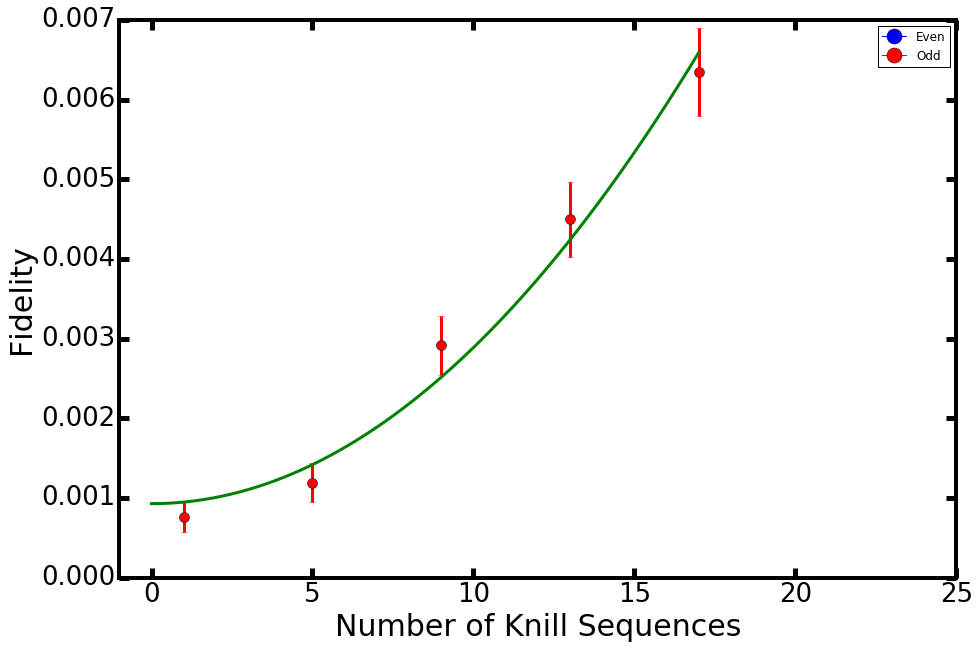

In [501]:
# Read in the data
rcParams['axes.linewidth'] = 4
from scipy.optimize import curve_fit
rcParams["figure.figsize"] = 15, 10
rcParams['legend.numpoints'] = 1
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

hst_1 = np.loadtxt('Z:/Group_Share/Barium/Data/2018.dir/12.dir/2018_12_03.dir/00149 - Rabi_hist.csv', delimiter = ',')
hst_5 = np.loadtxt('Z:/Group_Share/Barium/Data/2018.dir/12.dir/2018_12_03.dir/00152 - Rabi_hist.csv', delimiter = ',')
hst_9 = np.loadtxt('Z:/Group_Share/Barium/Data/2018.dir/12.dir/2018_12_03.dir/00155 - Rabi_hist.csv', delimiter = ',')
hst_13 = np.loadtxt('Z:/Group_Share/Barium/Data/2018.dir/12.dir/2018_12_03.dir/00158 - Rabi_hist.csv', delimiter = ',')

hst_17 = np.loadtxt('Z:/Group_Share/Barium/Data/2018.dir/12.dir/2018_12_03.dir/00161 - Rabi_hist.csv', delimiter = ',')

hist_b = {}# {4:hst_4cp, 10: np.concatenate((hst_10cp1,hst_10cp2))}
hist_d = {1:hst_1, 5: hst_5, 9:hst_9, 13:hst_13, 17:hst_17}

discriminator = 11
dc_threshold = 10

sd_hist_b = {}
sd_hist_d = {}

for key in hist_b:
    dc_counts = hist_b[key][:,1]
    sd_counts = hist_b[key][:,2]
    sd_new_b = np.array([])
    
    for i in range(len(sd_counts)):
        if dc_counts[i] > dc_threshold:
            sd_new_b = np.append(sd_new_b, sd_counts[i])
    
    sd_hist_b[key] = sd_new_b

    
for key in hist_d:
    dc_counts = hist_d[key][:,1]
    sd_counts = hist_d[key][:,2]
    sd_new_d = np.array([])
    
    for i in range(len(sd_counts)):
        if dc_counts[i] > dc_threshold:
            sd_new_d = np.append(sd_new_d, sd_counts[i])
    
    sd_hist_d[key] = sd_new_d    

hist_b_fid = {}
hist_d_fid = {}    
hist_b_err = {}
hist_d_err = {}

fig, ax = plt.subplots()
for key in sd_hist_b:
    hist_b_err[key] = len(np.where(sd_hist_b[key] <= discriminator)[0])
    hist_b_fid[key] = float(hist_b_err[key])/len(sd_hist_b[key])
    
    ax.plot(key,hist_b_fid[key], 'o', color = 'b', markersize = 10)
    ax.errorbar(key,hist_b_fid[key], yerr= np.sqrt(hist_b_err[key])/len(sd_hist_b[key]), color='b', linewidth = 3)
    
for key in sd_hist_d:
    hist_d_err[key] = len(np.where(sd_hist_d[key] >= discriminator)[0])
    hist_d_fid[key] = float(hist_d_err[key])/len(sd_hist_d[key])    
    
    ax.plot(key, hist_d_fid[key], 'o', color = 'r', markersize = 10)
    ax.errorbar(key, hist_d_fid[key], yerr= np.sqrt(hist_d_err[key])/len(sd_hist_d[key]), color='r', linewidth = 3)    
plt.xlim([-1,25])    
plt.xlabel('Number of Knill Sequences', fontsize = 30)
plt.ylabel('Fidelity', fontsize = 30)
plt.tick_params(labelsize = 26)
plt.tick_params(width=5, length=10)

legend_elements = [Line2D([0], [0], color='b', marker = 'o', label='Even', markersize = 15),
                   Line2D([0], [0], marker='o', color='r', label='Odd', markersize=15)]
ax.legend(handles=legend_elements, loc='upper right')



for key in sorted(sd_hist_b):
    print 'Pulse number: ', key, '   Fidelity: ', '{:.4e}'.format(1- hist_b_fid[key]), '   Number of errors: ', \
    hist_b_err[key], '   Number of exps: ', len(sd_hist_b[key]), '   Error: ', \
    '{:.1e}'.format(np.sqrt(hist_b_err[key])/len(sd_hist_b[key]))

    
for key in sorted(sd_hist_d):
    print 'Pulse number: ', key, '   Fidelity: ', '{:.4e}'.format(hist_d_fid[key]), '   Number of errors: ', \
    hist_d_err[key], '   Number of exps: ', len(sd_hist_d[key]), '   Error: ', \
    '{:.1e}'.format(np.sqrt(hist_d_err[key])/len(sd_hist_d[key]))
    
    
def quad_fit(x, m, b):
    return x**2*m + b

x = np.array(sorted(hist_d_fid, key=lambda key: hist_d_fid[key]))
y = np.array(sorted(hist_d_fid.values()))

fit_line, err_line = curve_fit(quad_fit ,x , y, p0 = [1.e-3, 0.0])

print 'coefficient: ', '{:.3e}'.format(fit_line[0]), '{:.3e}'.format(np.sqrt(err_line[0,0]))
print 'Offset: ', '{:.3e}'.format(fit_line[1]), '{:.3e}'.format(np.sqrt(err_line[1,1]))
    
x_fit = np.linspace(0, x[-1], 1000)
y_fit =  quad_fit(x_fit , fit_line[0], fit_line[1])

plot(x_fit, y_fit, color = 'g', linewidth = 3)
show()


## Ramsey to look for Decoherence

Detuning (kHz):  10.38222 0.02910
Amplitude:  0.963
Time Constant (t^2):  17308.593


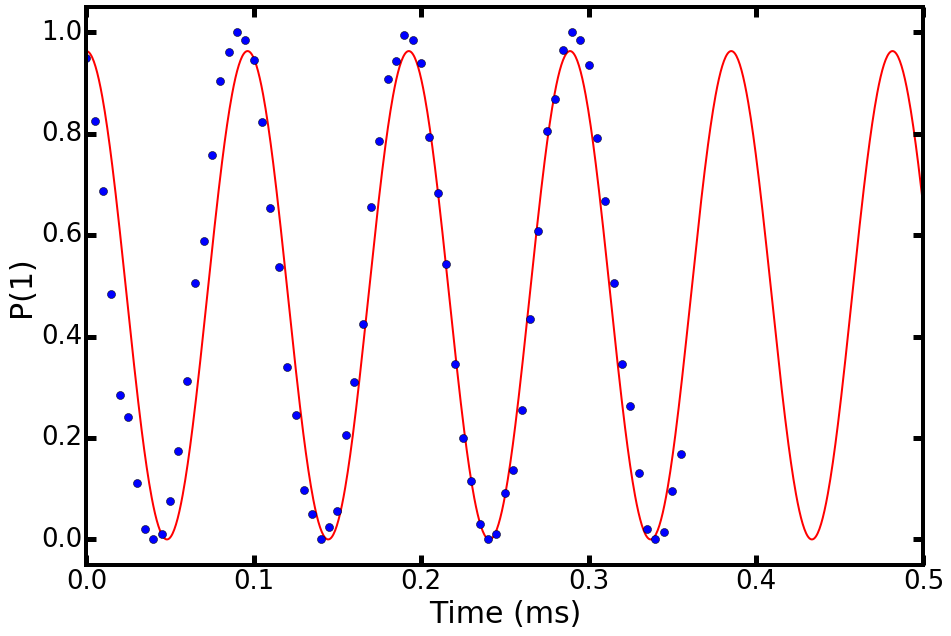

In [600]:
from scipy.optimize import curve_fit
from scipy.special import factorial
# Fit Poisson distributions to both
rcParams['axes.linewidth'] = 4
rcParams["figure.figsize"] = 15, 10

def ramsey1(x, delta, A):
    return A*np.cos(delta*x/2)**2

def ramsey2(x, delta, A, tau):
    return A*np.cos(delta*x/2)**2*np.exp(-(x/tau))**2
                                         
data = np.loadtxt('H:/Data/2018.dir/11.dir/2018_11_30.dir/00025 - Ramsey_prob.csv', delimiter = ',')
#data1 = np.loadtxt('Z:/Group_Share/Barium/Data/2018.dir/08.dir/2018_08_01.dir/00143 - RabiFlopping_prob.csv', delimiter = ',')


t = data[:,0]*1e-6
prob = data[:,1]

#t = np.concatenate((data[:,0], data1[:,0]), axis = 0)*1e-6
#prob = np.concatenate((data[:,1], data1[:,1]), axis = 0)

ramsey1_fit, ramsey1_err = curve_fit(ramsey1,t, prob, p0 = [2*np.pi*10.e3,1.0])
ramsey2_fit, ramsey2_err = curve_fit(ramsey2,t, prob, p0 = [2*np.pi*10.e3,1, 500e-3])
       
    
print 'Detuning (kHz): ', '{:.5f}'.format(ramsey1_fit[0]/2/np.pi/1e3) , '{:.5f}'.format(np.sqrt(ramsey1_err[0,0])/2/np.pi/1e3)
print 'Amplitude: ', '{:.3f}'.format(ramsey1_fit[1])
#print 'Time Constant (t): ', '{:.3f}'.format(ramsey1_fit[2]), '{:.3f}'.format(np.sqrt(ramsey1_err[2,2]))
print 'Time Constant (t^2): ', '{:.3f}'.format(ramsey2_fit[2])


x_fit = np.linspace(0e-6,500e-6,1000)
y1_fit = ramsey1(x_fit, ramsey1_fit[0], ramsey1_fit[1])
y2_fit = ramsey2(x_fit, ramsey2_fit[0], ramsey2_fit[1], ramsey2_fit[2])

#red_chi_ramsey1 = np.sum(y1_fit - prob)**2/(len(prob) - 3)
#red_chi_ramsey2 = np.sum(y2_fit - prob)**2/(len(prob) - 3)

#print red_chi_ramsey1
#print red_chi_ramsey2

plot(x_fit*1e3, y1_fit, color = 'r', linewidth = 2)
plot(t*1e3,prob,'o',color = 'b', markersize = 8)
ylim([-0.05,1.05])
xlabel('Time (ms)', fontsize = 30)
ylabel('P(1)', fontsize = 30)
tick_params(labelsize = 26)
tick_params(width=5, length=10)

show()

### 12/3/18 Stacked Knill Switching phase during dead time

Pulse number:  1    Fidelity:  7.9040e-04    Number of errors:  16    Number of exps:  20243    Error:  2.0e-04
Pulse number:  5    Fidelity:  1.1384e-03    Number of errors:  24    Number of exps:  21083    Error:  2.3e-04
Pulse number:  9    Fidelity:  1.6654e-03    Number of errors:  36    Number of exps:  21616    Error:  2.8e-04
Pulse number:  13    Fidelity:  2.3562e-03    Number of errors:  47    Number of exps:  19947    Error:  3.4e-04
Slope:  1.306e-04 1.356e-05
Offset:  5.733e-04 1.126e-04


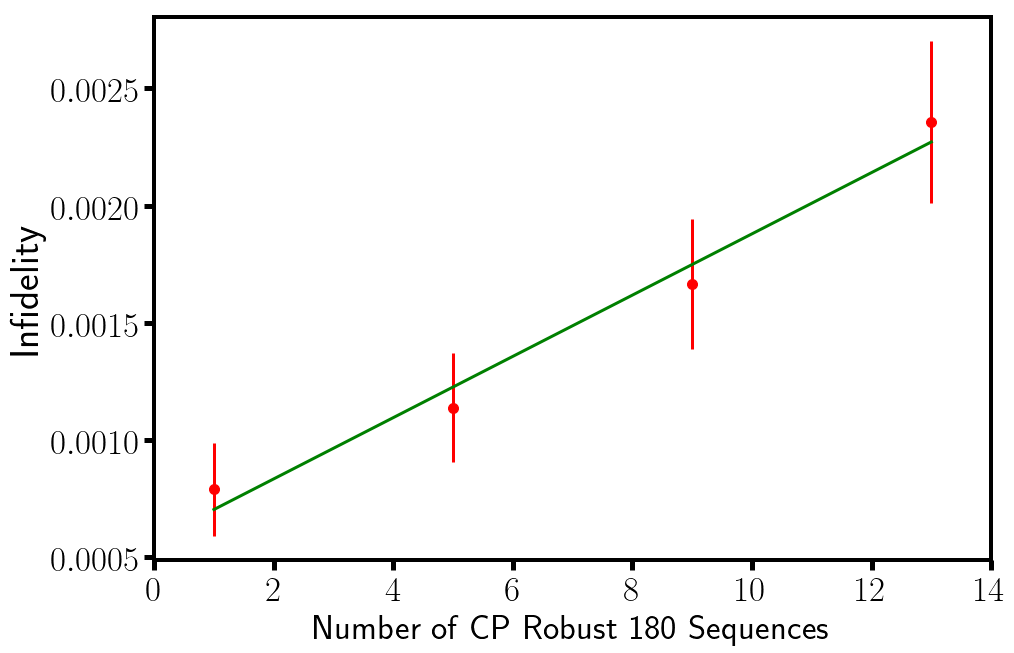

In [172]:
# Read in the data
rcParams['axes.linewidth'] = 4
from scipy.optimize import curve_fit
rcParams["figure.figsize"] = 15, 10
rcParams['legend.numpoints'] = 1
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D


hst_1 = np.loadtxt('Z:/Group_Share/Barium/Data/2018.dir/12.dir/2018_12_03.dir/00164 - Rabi_hist.csv', delimiter = ',')
hst_5_1 = np.loadtxt('Z:/Group_Share/Barium/Data/2018.dir/12.dir/2018_12_03.dir/00170 - Rabi_hist.csv', delimiter = ',')
hst_5_2 = np.loadtxt('Z:/Group_Share/Barium/Data/2018.dir/12.dir/2018_12_03.dir/00173 - Rabi_hist.csv', delimiter = ',')
hst_9_1 = np.loadtxt('Z:/Group_Share/Barium/Data/2018.dir/12.dir/2018_12_03.dir/00176 - Rabi_hist.csv', delimiter = ',')
hst_9_2 = np.loadtxt('Z:/Group_Share/Barium/Data/2018.dir/12.dir/2018_12_03.dir/00179 - Rabi_hist.csv', delimiter = ',')
hst_13 = np.loadtxt('Z:/Group_Share/Barium/Data/2018.dir/12.dir/2018_12_03.dir/00182 - Rabi_hist.csv', delimiter = ',')


hist_b = {}# {4:hst_4cp, 10: np.concatenate((hst_10cp1,hst_10cp2))}
hist_d = {1:hst_1, 5: np.concatenate((hst_5_1,hst_5_2)), 9:np.concatenate((hst_9_1,hst_9_2)), 13:hst_13}

discriminator = 11
dc_threshold = 10

sd_hist_b = {}
sd_hist_d = {}

for key in hist_b:
    dc_counts = hist_b[key][:,1]
    sd_counts = hist_b[key][:,2]
    sd_new_b = np.array([])
    
    for i in range(len(sd_counts)):
        if dc_counts[i] > dc_threshold:
            sd_new_b = np.append(sd_new_b, sd_counts[i])
    
    sd_hist_b[key] = sd_new_b

    
for key in hist_d:
    dc_counts = hist_d[key][:,1]
    sd_counts = hist_d[key][:,2]
    sd_new_d = np.array([])
    
    for i in range(len(sd_counts)):
        if dc_counts[i] > dc_threshold:
            sd_new_d = np.append(sd_new_d, sd_counts[i])
    
    sd_hist_d[key] = sd_new_d    

hist_b_fid = {}
hist_d_fid = {}    
hist_b_err = {}
hist_d_err = {}

fig, ax = plt.subplots()
for key in sd_hist_b:
    hist_b_err[key] = len(np.where(sd_hist_b[key] <= discriminator)[0])
    hist_b_fid[key] = float(hist_b_err[key])/len(sd_hist_b[key])
    
    ax.plot(key,hist_b_fid[key], 'o', color = 'b', markersize = 10)
    ax.errorbar(key,hist_b_fid[key], yerr= np.sqrt(hist_b_err[key])/len(sd_hist_b[key]), color='b', linewidth = 3)
    
for key in sd_hist_d:
    hist_d_err[key] = len(np.where(sd_hist_d[key] >= discriminator)[0])
    hist_d_fid[key] = float(hist_d_err[key])/len(sd_hist_d[key])    
    
    ax.plot(key, hist_d_fid[key], 'o', color = 'r', markersize = 10)
    ax.errorbar(key, hist_d_fid[key], yerr= np.sqrt(hist_d_err[key])/len(sd_hist_d[key]), color='r', linewidth = 3)    
plt.xlim([0,14])    
plt.xlabel('Number of CP Robust 180 Sequences', fontsize = 35)
plt.ylabel('Infidelity', fontsize = 40)
plt.tick_params(labelsize = 35)
plt.tick_params(width=5, length=10)

#legend_elements = [Line2D([0], [0], color='b', marker = 'o', label='Even', markersize = 15),
                   #Line2D([0], [0], marker='o', color='r', label='Odd', markersize=15)]
#ax.legend(handles=legend_elements, loc='upper right')



for key in sorted(sd_hist_b):
    print 'Pulse number: ', key, '   Fidelity: ', '{:.4e}'.format(1- hist_b_fid[key]), '   Number of errors: ', \
    hist_b_err[key], '   Number of exps: ', len(sd_hist_b[key]), '   Error: ', \
    '{:.1e}'.format(np.sqrt(hist_b_err[key])/len(sd_hist_b[key]))

    
for key in sorted(sd_hist_d):
    print 'Pulse number: ', key, '   Fidelity: ', '{:.4e}'.format(hist_d_fid[key]), '   Number of errors: ', \
    hist_d_err[key], '   Number of exps: ', len(sd_hist_d[key]), '   Error: ', \
    '{:.1e}'.format(np.sqrt(hist_d_err[key])/len(sd_hist_d[key]))
    
    
def line_fit(x, m, b):
    return x*m + b

x = np.array(sorted(hist_d_fid, key=lambda key: hist_d_fid[key]))
y = np.array(sorted(hist_d_fid.values()))

fit_line, err_line = curve_fit(line_fit ,x , y, p0 = [1.e-3, 0.0])

print 'Slope: ', '{:.3e}'.format(fit_line[0]), '{:.3e}'.format(np.sqrt(err_line[0,0]))
print 'Offset: ', '{:.3e}'.format(fit_line[1]), '{:.3e}'.format(np.sqrt(err_line[1,1]))
    

y_fit =  line_fit(x , fit_line[0], fit_line[1])

plot(x, y_fit, color = 'g', linewidth = 3)
#savefig('knill_infidelity.pdf', bbox_inches='tight', transparent = True)
show()


### Summary of results so far

For stacked pi-pulses w/ random phase in front:

Slope = $(9.4 \pm .2)^{-4}$<br>
Pulse area error: 2%

For stacked Knill sequences w/ random phases in between:

Slope = $(1.4 \pm .1)^{-4}$<br>
Pulse area error: 8%


For stacked pi-pulses no random phase:

Quadratic Coefficient = $(1.9 \pm .15)^{-5}$<br>
Pulse area error: 0.3%

For stacked pi-pulses no random phase, no DDS:

Quadratic Coefficient = $(5.4 \pm .3)^{-6}$<br>
Pulse area error: 0.15%

### 12/10/10

Think that the ion getting hot during the MW pulses might be the cause of our microwave error. Found the 455 was 10MHz off. Will redo both composite pulses and just pi-pulses. Found and error when randomizing the phase for pi pulses. Phase was changing a few hundred nanoseconds into the pulse. 

Stacked Knill sequences with random phase in front.

Pulse number:  1    Fidelity:  5.1773e-04    Number of errors:  8    Number of exps:  15452    Error:  1.8e-04
Pulse number:  5    Fidelity:  8.4822e-04    Number of errors:  17    Number of exps:  20042    Error:  2.1e-04
Pulse number:  9    Fidelity:  1.4327e-03    Number of errors:  31    Number of exps:  21638    Error:  2.6e-04
Pulse number:  13    Fidelity:  2.7332e-03    Number of errors:  52    Number of exps:  19025    Error:  3.8e-04
Slope:  1.808e-04 3.921e-05
Offset:  1.175e-04 3.257e-04


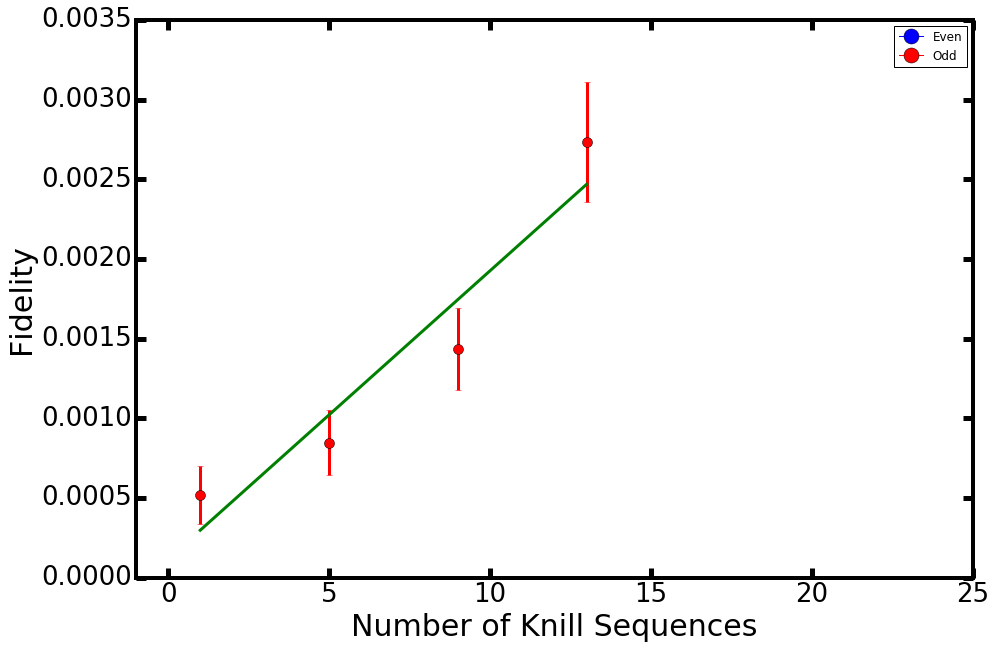

In [549]:
# Read in the data
rcParams['axes.linewidth'] = 4
from scipy.optimize import curve_fit
rcParams["figure.figsize"] = 15, 10
rcParams['legend.numpoints'] = 1
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D


hst_1 = np.loadtxt('Z:/Group_Share/Barium/Data/2018.dir/12.dir/2018_12_10.dir/00062 - Rabi_hist.csv', delimiter = ',')
hst_5_1 = np.loadtxt('Z:/Group_Share/Barium/Data/2018.dir/12.dir/2018_12_10.dir/00070 - Rabi_hist.csv', delimiter = ',')
hst_5_2 = np.loadtxt('Z:/Group_Share/Barium/Data/2018.dir/12.dir/2018_12_10.dir/00073 - Rabi_hist.csv', delimiter = ',')
hst_5_3 = np.loadtxt('Z:/Group_Share/Barium/Data/2018.dir/12.dir/2018_12_10.dir/00076 - Rabi_hist.csv', delimiter = ',')
hst_9_1 = np.loadtxt('Z:/Group_Share/Barium/Data/2018.dir/12.dir/2018_12_10.dir/00079 - Rabi_hist.csv', delimiter = ',')
hst_9_2 = np.loadtxt('Z:/Group_Share/Barium/Data/2018.dir/12.dir/2018_12_10.dir/00082 - Rabi_hist.csv', delimiter = ',')
hst_13 = np.loadtxt('Z:/Group_Share/Barium/Data/2018.dir/12.dir/2018_12_10.dir/00085 - Rabi_hist.csv', delimiter = ',')


hist_b = {}# {4:hst_4cp, 10: np.concatenate((hst_10cp1,hst_10cp2))}
hist_d = {1:hst_1, 5: np.concatenate((hst_5_1,hst_5_2,hst_5_3)), 9:np.concatenate((hst_9_1,hst_9_2)),13:hst_13 }

discriminator = 12
dc_threshold = 14

sd_hist_b = {}
sd_hist_d = {}

for key in hist_b:
    dc_counts = hist_b[key][:,1]
    sd_counts = hist_b[key][:,2]
    sd_new_b = np.array([])
    
    for i in range(len(sd_counts)):
        if dc_counts[i] > dc_threshold:
            sd_new_b = np.append(sd_new_b, sd_counts[i])
    
    sd_hist_b[key] = sd_new_b

    
for key in hist_d:
    dc_counts = hist_d[key][:,1]
    sd_counts = hist_d[key][:,2]
    sd_new_d = np.array([])
    
    for i in range(len(sd_counts)):
        if dc_counts[i] > dc_threshold:
            sd_new_d = np.append(sd_new_d, sd_counts[i])
    
    sd_hist_d[key] = sd_new_d    

hist_b_fid = {}
hist_d_fid = {}    
hist_b_err = {}
hist_d_err = {}

fig, ax = plt.subplots()
for key in sd_hist_b:
    hist_b_err[key] = len(np.where(sd_hist_b[key] <= discriminator)[0])
    hist_b_fid[key] = float(hist_b_err[key])/len(sd_hist_b[key])
    
    ax.plot(key,hist_b_fid[key], 'o', color = 'b', markersize = 10)
    ax.errorbar(key,hist_b_fid[key], yerr= np.sqrt(hist_b_err[key])/len(sd_hist_b[key]), color='b', linewidth = 3)
    
for key in sd_hist_d:
    hist_d_err[key] = len(np.where(sd_hist_d[key] >= discriminator)[0])
    hist_d_fid[key] = float(hist_d_err[key])/len(sd_hist_d[key])    
    
    ax.plot(key, hist_d_fid[key], 'o', color = 'r', markersize = 10)
    ax.errorbar(key, hist_d_fid[key], yerr= np.sqrt(hist_d_err[key])/len(sd_hist_d[key]), color='r', linewidth = 3)    
plt.xlim([-1,25])    
plt.xlabel('Number of Knill Sequences', fontsize = 30)
plt.ylabel('Fidelity', fontsize = 30)
plt.tick_params(labelsize = 26)
plt.tick_params(width=5, length=10)

legend_elements = [Line2D([0], [0], color='b', marker = 'o', label='Even', markersize = 15),
                   Line2D([0], [0], marker='o', color='r', label='Odd', markersize=15)]
ax.legend(handles=legend_elements, loc='upper right')



for key in sorted(sd_hist_b):
    print 'Pulse number: ', key, '   Fidelity: ', '{:.4e}'.format(1- hist_b_fid[key]), '   Number of errors: ', \
    hist_b_err[key], '   Number of exps: ', len(sd_hist_b[key]), '   Error: ', \
    '{:.1e}'.format(np.sqrt(hist_b_err[key])/len(sd_hist_b[key]))

    
for key in sorted(sd_hist_d):
    print 'Pulse number: ', key, '   Fidelity: ', '{:.4e}'.format(hist_d_fid[key]), '   Number of errors: ', \
    hist_d_err[key], '   Number of exps: ', len(sd_hist_d[key]), '   Error: ', \
    '{:.1e}'.format(np.sqrt(hist_d_err[key])/len(sd_hist_d[key]))
    
    
def line_fit(x, m, b):
    return x*m + b

x = np.array(sorted(hist_d_fid, key=lambda key: hist_d_fid[key]))
y = np.array(sorted(hist_d_fid.values()))

fit_line, err_line = curve_fit(line_fit ,x , y, p0 = [1.e-3, 0.0])

print 'Slope: ', '{:.3e}'.format(fit_line[0]), '{:.3e}'.format(np.sqrt(err_line[0,0]))
print 'Offset: ', '{:.3e}'.format(fit_line[1]), '{:.3e}'.format(np.sqrt(err_line[1,1]))
    

y_fit =  line_fit(x , fit_line[0], fit_line[1])

plot(x, y_fit, color = 'g', linewidth = 3)
show()


## Stacked pi-pulses

Pulse number:  1    Fidelity:  5.0299e-04    Number of errors:  10    Number of exps:  19881    Error:  1.6e-04
Pulse number:  5    Fidelity:  5.9344e-04    Number of errors:  12    Number of exps:  20221    Error:  1.7e-04
Pulse number:  9    Fidelity:  7.9630e-04    Number of errors:  16    Number of exps:  20093    Error:  2.0e-04
Pulse number:  17    Fidelity:  1.2607e-03    Number of errors:  25    Number of exps:  19830    Error:  2.5e-04
Slope:  4.887e-05 5.439e-06
Offset:  3.974e-04 5.412e-05


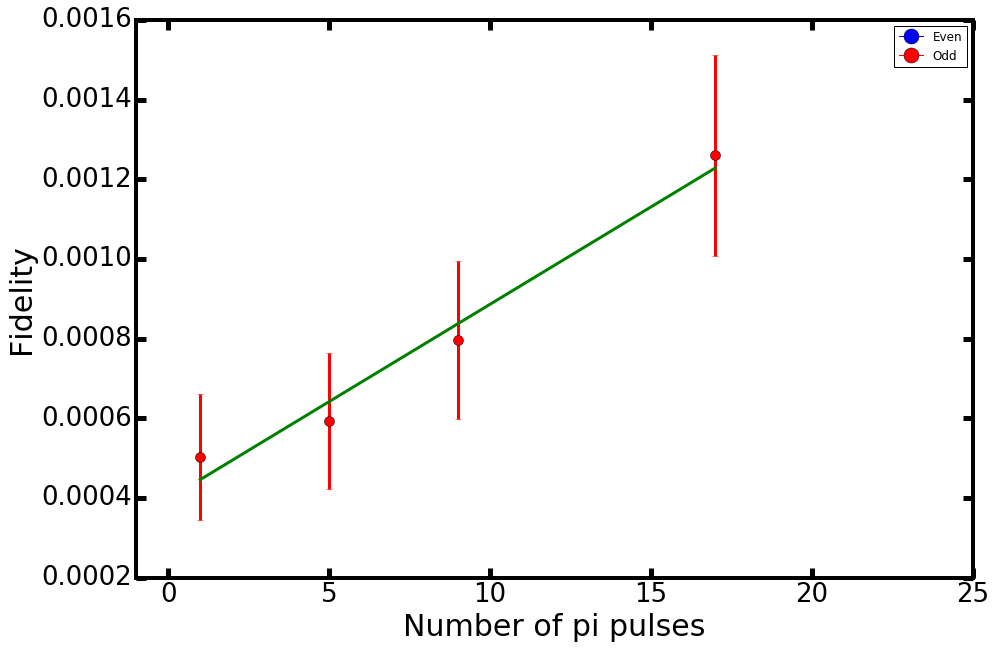

In [552]:
# Read in the data
rcParams['axes.linewidth'] = 4
from scipy.optimize import curve_fit
rcParams["figure.figsize"] = 15, 10
rcParams['legend.numpoints'] = 1
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D


hst_1 = np.loadtxt('Z:/Group_Share/Barium/Data/2018.dir/12.dir/2018_12_10.dir/00112 - Rabi_hist.csv', delimiter = ',')
hst_5 = np.loadtxt('Z:/Group_Share/Barium/Data/2018.dir/12.dir/2018_12_10.dir/00106 - Rabi_hist.csv', delimiter = ',')
hst_9 = np.loadtxt('Z:/Group_Share/Barium/Data/2018.dir/12.dir/2018_12_10.dir/00109 - Rabi_hist.csv', delimiter = ',')
hst_17 = np.loadtxt('Z:/Group_Share/Barium/Data/2018.dir/12.dir/2018_12_10.dir/00115 - Rabi_hist.csv', delimiter = ',')

hist_b = {}# {4:hst_4cp, 10: np.concatenate((hst_10cp1,hst_10cp2))}
hist_d = {1:hst_1, 5: hst_5, 9:hst_9, 17:hst_17}

discriminator = 12
dc_threshold = 14

sd_hist_b = {}
sd_hist_d = {}

for key in hist_b:
    dc_counts = hist_b[key][:,1]
    sd_counts = hist_b[key][:,2]
    sd_new_b = np.array([])
    
    for i in range(len(sd_counts)):
        if dc_counts[i] > dc_threshold:
            sd_new_b = np.append(sd_new_b, sd_counts[i])
    
    sd_hist_b[key] = sd_new_b

    
for key in hist_d:
    dc_counts = hist_d[key][:,1]
    sd_counts = hist_d[key][:,2]
    sd_new_d = np.array([])
    
    for i in range(len(sd_counts)):
        if dc_counts[i] > dc_threshold:
            sd_new_d = np.append(sd_new_d, sd_counts[i])
    
    sd_hist_d[key] = sd_new_d    

hist_b_fid = {}
hist_d_fid = {}    
hist_b_err = {}
hist_d_err = {}

fig, ax = plt.subplots()
for key in sd_hist_b:
    hist_b_err[key] = len(np.where(sd_hist_b[key] <= discriminator)[0])
    hist_b_fid[key] = float(hist_b_err[key])/len(sd_hist_b[key])
    
    ax.plot(key,hist_b_fid[key], 'o', color = 'b', markersize = 10)
    ax.errorbar(key,hist_b_fid[key], yerr= np.sqrt(hist_b_err[key])/len(sd_hist_b[key]), color='b', linewidth = 3)
    
for key in sd_hist_d:
    hist_d_err[key] = len(np.where(sd_hist_d[key] >= discriminator)[0])
    hist_d_fid[key] = float(hist_d_err[key])/len(sd_hist_d[key])    
    
    ax.plot(key, hist_d_fid[key], 'o', color = 'r', markersize = 10)
    ax.errorbar(key, hist_d_fid[key], yerr= np.sqrt(hist_d_err[key])/len(sd_hist_d[key]), color='r', linewidth = 3)    
plt.xlim([-1,25])    
plt.xlabel('Number of pi pulses', fontsize = 30)
plt.ylabel('Fidelity', fontsize = 30)
plt.tick_params(labelsize = 26)
plt.tick_params(width=5, length=10)

legend_elements = [Line2D([0], [0], color='b', marker = 'o', label='Even', markersize = 15),
                   Line2D([0], [0], marker='o', color='r', label='Odd', markersize=15)]
ax.legend(handles=legend_elements, loc='upper right')



for key in sorted(sd_hist_b):
    print 'Pulse number: ', key, '   Fidelity: ', '{:.4e}'.format(1- hist_b_fid[key]), '   Number of errors: ', \
    hist_b_err[key], '   Number of exps: ', len(sd_hist_b[key]), '   Error: ', \
    '{:.1e}'.format(np.sqrt(hist_b_err[key])/len(sd_hist_b[key]))

    
for key in sorted(sd_hist_d):
    print 'Pulse number: ', key, '   Fidelity: ', '{:.4e}'.format(hist_d_fid[key]), '   Number of errors: ', \
    hist_d_err[key], '   Number of exps: ', len(sd_hist_d[key]), '   Error: ', \
    '{:.1e}'.format(np.sqrt(hist_d_err[key])/len(sd_hist_d[key]))
    
    
def line_fit(x, m, b):
    return x*m + b

x = np.array(sorted(hist_d_fid, key=lambda key: hist_d_fid[key]))
y = np.array(sorted(hist_d_fid.values()))

fit_line, err_line = curve_fit(line_fit ,x , y, p0 = [1.e-3, 0.0])

print 'Slope: ', '{:.3e}'.format(fit_line[0]), '{:.3e}'.format(np.sqrt(err_line[0,0]))
print 'Offset: ', '{:.3e}'.format(fit_line[1]), '{:.3e}'.format(np.sqrt(err_line[1,1]))
    

y_fit =  line_fit(x , fit_line[0], fit_line[1])

plot(x, y_fit, color = 'g', linewidth = 3)
show()


### Knill sequence again

I think the error was worse because the ion wasn't cooled well.

Pulse number:  1    Fidelity:  7.0714e-04    Number of errors:  14    Number of exps:  19798    Error:  1.9e-04
Pulse number:  5    Fidelity:  1.1664e-03    Number of errors:  24    Number of exps:  20577    Error:  2.4e-04
Pulse number:  9    Fidelity:  1.9129e-03    Number of errors:  38    Number of exps:  19865    Error:  3.1e-04
Pulse number:  13    Fidelity:  2.5460e-03    Number of errors:  50    Number of exps:  19639    Error:  3.6e-04
Slope:  1.566e-04 9.871e-06
Offset:  4.871e-04 8.199e-05


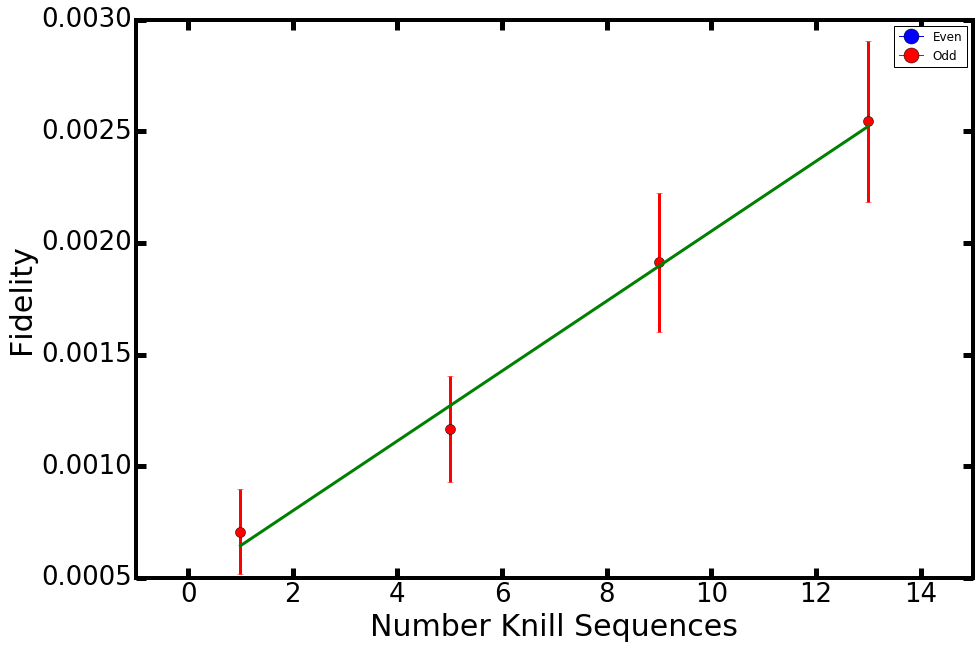

In [601]:
# Read in the data
rcParams['axes.linewidth'] = 4
from scipy.optimize import curve_fit
rcParams["figure.figsize"] = 15, 10
rcParams['legend.numpoints'] = 1
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D


hst_1 = np.loadtxt('Z:/Group_Share/Barium/Data/2018.dir/12.dir/2018_12_10.dir/00118 - Rabi_hist.csv', delimiter = ',')
hst_5 = np.loadtxt('Z:/Group_Share/Barium/Data/2018.dir/12.dir/2018_12_10.dir/00121 - Rabi_hist.csv', delimiter = ',')
hst_9 = np.loadtxt('Z:/Group_Share/Barium/Data/2018.dir/12.dir/2018_12_10.dir/00124 - Rabi_hist.csv', delimiter = ',')
hst_13 = np.loadtxt('Z:/Group_Share/Barium/Data/2018.dir/12.dir/2018_12_10.dir/00127 - Rabi_hist.csv', delimiter = ',')

hist_b = {}# {4:hst_4cp, 10: np.concatenate((hst_10cp1,hst_10cp2))}
hist_d = {1:hst_1, 5: hst_5, 9:hst_9, 13:hst_13}

discriminator = 12
dc_threshold = 14

sd_hist_b = {}
sd_hist_d = {}

for key in hist_b:
    dc_counts = hist_b[key][:,1]
    sd_counts = hist_b[key][:,2]
    sd_new_b = np.array([])
    
    for i in range(len(sd_counts)):
        if dc_counts[i] > dc_threshold:
            sd_new_b = np.append(sd_new_b, sd_counts[i])
    
    sd_hist_b[key] = sd_new_b

    
for key in hist_d:
    dc_counts = hist_d[key][:,1]
    sd_counts = hist_d[key][:,2]
    sd_new_d = np.array([])
    
    for i in range(len(sd_counts)):
        if dc_counts[i] > dc_threshold:
            sd_new_d = np.append(sd_new_d, sd_counts[i])
    
    sd_hist_d[key] = sd_new_d    

hist_b_fid = {}
hist_d_fid = {}    
hist_b_err = {}
hist_d_err = {}

fig, ax = plt.subplots()
for key in sd_hist_b:
    hist_b_err[key] = len(np.where(sd_hist_b[key] <= discriminator)[0])
    hist_b_fid[key] = float(hist_b_err[key])/len(sd_hist_b[key])
    
    ax.plot(key,hist_b_fid[key], 'o', color = 'b', markersize = 10)
    ax.errorbar(key,hist_b_fid[key], yerr= np.sqrt(hist_b_err[key])/len(sd_hist_b[key]), color='b', linewidth = 3)
    
for key in sd_hist_d:
    hist_d_err[key] = len(np.where(sd_hist_d[key] >= discriminator)[0])
    hist_d_fid[key] = float(hist_d_err[key])/len(sd_hist_d[key])    
    
    ax.plot(key, hist_d_fid[key], 'o', color = 'r', markersize = 10)
    ax.errorbar(key, hist_d_fid[key], yerr= np.sqrt(hist_d_err[key])/len(sd_hist_d[key]), color='r', linewidth = 3)    
plt.xlim([-1,15])    
plt.xlabel('Number Knill Sequences', fontsize = 30)
plt.ylabel('Fidelity', fontsize = 30)
plt.tick_params(labelsize = 26)
plt.tick_params(width=5, length=10)

legend_elements = [Line2D([0], [0], color='b', marker = 'o', label='Even', markersize = 15),
                   Line2D([0], [0], marker='o', color='r', label='Odd', markersize=15)]
ax.legend(handles=legend_elements, loc='upper right')



for key in sorted(sd_hist_b):
    print 'Pulse number: ', key, '   Fidelity: ', '{:.4e}'.format(1- hist_b_fid[key]), '   Number of errors: ', \
    hist_b_err[key], '   Number of exps: ', len(sd_hist_b[key]), '   Error: ', \
    '{:.1e}'.format(np.sqrt(hist_b_err[key])/len(sd_hist_b[key]))

    
for key in sorted(sd_hist_d):
    print 'Pulse number: ', key, '   Fidelity: ', '{:.4e}'.format(hist_d_fid[key]), '   Number of errors: ', \
    hist_d_err[key], '   Number of exps: ', len(sd_hist_d[key]), '   Error: ', \
    '{:.1e}'.format(np.sqrt(hist_d_err[key])/len(sd_hist_d[key]))
    
    
def line_fit(x, m, b):
    return x*m + b

x = np.array(sorted(hist_d_fid, key=lambda key: hist_d_fid[key]))
y = np.array(sorted(hist_d_fid.values()))

fit_line, err_line = curve_fit(line_fit ,x , y, p0 = [1.e-3, 0.0])

print 'Slope: ', '{:.3e}'.format(fit_line[0]), '{:.3e}'.format(np.sqrt(err_line[0,0]))
print 'Offset: ', '{:.3e}'.format(fit_line[1]), '{:.3e}'.format(np.sqrt(err_line[1,1]))
    

y_fit =  line_fit(x , fit_line[0], fit_line[1])

plot(x, y_fit, color = 'g', linewidth = 3)
show()


### pi/2 flip phase 180, pi/2

Pulse number:  1    Fidelity:  2.9830e-04    Number of errors:  6    Number of exps:  20114    Error:  1.2e-04
Pulse number:  5    Fidelity:  7.8857e-04    Number of errors:  18    Number of exps:  22826    Error:  1.9e-04
Pulse number:  9    Fidelity:  8.8063e-04    Number of errors:  18    Number of exps:  20440    Error:  2.1e-04
Pulse number:  13    Fidelity:  1.1254e-03    Number of errors:  21    Number of exps:  18660    Error:  2.5e-04
Slope:  6.433e-05 1.375e-05
Offset:  3.229e-04 1.142e-04


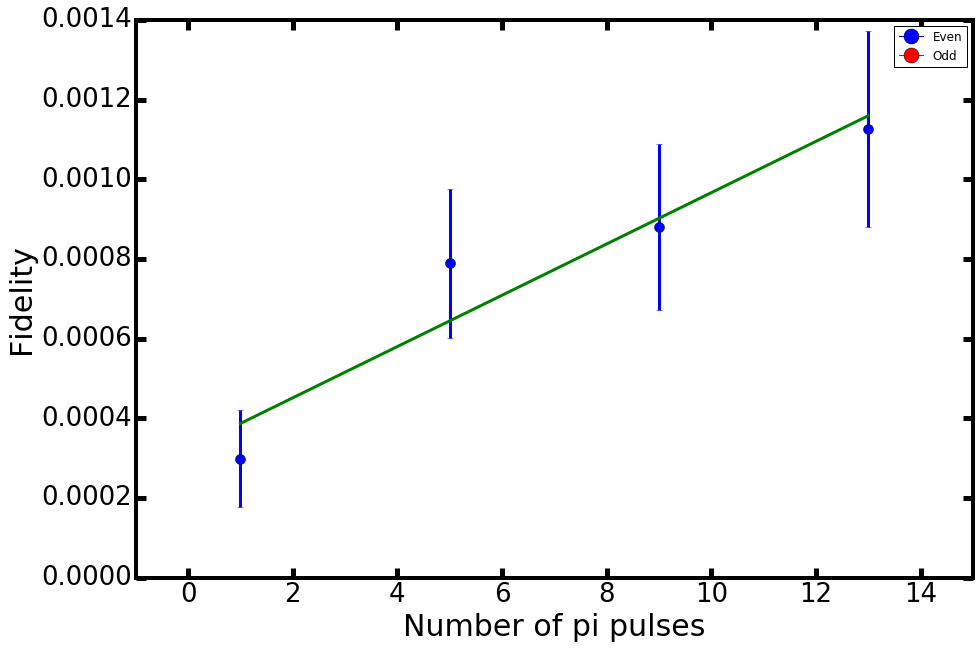

In [567]:
# Read in the data
rcParams['axes.linewidth'] = 4
from scipy.optimize import curve_fit
rcParams["figure.figsize"] = 15, 10
rcParams['legend.numpoints'] = 1
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D


hst_1 = np.loadtxt('Z:/Group_Share/Barium/Data/2018.dir/12.dir/2018_12_10.dir/00130 - Rabi_hist.csv', delimiter = ',')
hst_5 = np.loadtxt('Z:/Group_Share/Barium/Data/2018.dir/12.dir/2018_12_10.dir/00133 - Rabi_hist.csv', delimiter = ',')
hst_9 = np.loadtxt('Z:/Group_Share/Barium/Data/2018.dir/12.dir/2018_12_10.dir/00139 - Rabi_hist.csv', delimiter = ',')
hst_13 = np.loadtxt('Z:/Group_Share/Barium/Data/2018.dir/12.dir/2018_12_10.dir/00145 - Rabi_hist.csv', delimiter = ',')

hist_d = {}# {4:hst_4cp, 10: np.concatenate((hst_10cp1,hst_10cp2))}
hist_b = {1:hst_1, 5: hst_5, 9:hst_9, 13:hst_13}

discriminator = 12
dc_threshold = 14

sd_hist_b = {}
sd_hist_d = {}

for key in hist_b:
    dc_counts = hist_b[key][:,1]
    sd_counts = hist_b[key][:,2]
    sd_new_b = np.array([])
    
    for i in range(len(sd_counts)):
        if dc_counts[i] > dc_threshold:
            sd_new_b = np.append(sd_new_b, sd_counts[i])
    
    sd_hist_b[key] = sd_new_b

    
for key in hist_d:
    dc_counts = hist_d[key][:,1]
    sd_counts = hist_d[key][:,2]
    sd_new_d = np.array([])
    
    for i in range(len(sd_counts)):
        if dc_counts[i] > dc_threshold:
            sd_new_d = np.append(sd_new_d, sd_counts[i])
    
    sd_hist_d[key] = sd_new_d    

hist_b_fid = {}
hist_d_fid = {}    
hist_b_err = {}
hist_d_err = {}

fig, ax = plt.subplots()
for key in sd_hist_b:
    hist_b_err[key] = len(np.where(sd_hist_b[key] <= discriminator)[0])
    hist_b_fid[key] = float(hist_b_err[key])/len(sd_hist_b[key])
    
    ax.plot(key,hist_b_fid[key], 'o', color = 'b', markersize = 10)
    ax.errorbar(key,hist_b_fid[key], yerr= np.sqrt(hist_b_err[key])/len(sd_hist_b[key]), color='b', linewidth = 3)
    
for key in sd_hist_d:
    hist_d_err[key] = len(np.where(sd_hist_d[key] >= discriminator)[0])
    hist_d_fid[key] = float(hist_d_err[key])/len(sd_hist_d[key])    
    
    ax.plot(key, hist_d_fid[key], 'o', color = 'r', markersize = 10)
    ax.errorbar(key, hist_d_fid[key], yerr= np.sqrt(hist_d_err[key])/len(sd_hist_d[key]), color='r', linewidth = 3)    
plt.xlim([-1,15])    
plt.xlabel('Number of pi pulses', fontsize = 30)
plt.ylabel('Fidelity', fontsize = 30)
plt.tick_params(labelsize = 26)
plt.tick_params(width=5, length=10)

legend_elements = [Line2D([0], [0], color='b', marker = 'o', label='Even', markersize = 15),
                   Line2D([0], [0], marker='o', color='r', label='Odd', markersize=15)]
ax.legend(handles=legend_elements, loc='upper right')



for key in sorted(sd_hist_b):
    print 'Pulse number: ', key, '   Fidelity: ', '{:.4e}'.format(hist_b_fid[key]), '   Number of errors: ', \
    hist_b_err[key], '   Number of exps: ', len(sd_hist_b[key]), '   Error: ', \
    '{:.1e}'.format(np.sqrt(hist_b_err[key])/len(sd_hist_b[key]))

    
for key in sorted(sd_hist_d):
    print 'Pulse number: ', key, '   Fidelity: ', '{:.4e}'.format(hist_d_fid[key]), '   Number of errors: ', \
    hist_d_err[key], '   Number of exps: ', len(sd_hist_d[key]), '   Error: ', \
    '{:.1e}'.format(np.sqrt(hist_d_err[key])/len(sd_hist_d[key]))
    
    
def line_fit(x, m, b):
    return x*m + b

x = np.array(sorted(hist_b_fid, key=lambda key: hist_b_fid[key]))
y = np.array(sorted(hist_b_fid.values()))

fit_line, err_line = curve_fit(line_fit ,x , y, p0 = [1.e-3, 0.0])

print 'Slope: ', '{:.3e}'.format(fit_line[0]), '{:.3e}'.format(np.sqrt(err_line[0,0]))
print 'Offset: ', '{:.3e}'.format(fit_line[1]), '{:.3e}'.format(np.sqrt(err_line[1,1]))
    

y_fit =  line_fit(x , fit_line[0], fit_line[1])

plot(x, y_fit, color = 'g', linewidth = 3)
show()


## Spin Echo

Pulse number:  1    Fidelity:  7.3551e-04    Number of errors:  15    Number of exps:  20394    Error:  1.9e-04
Pulse number:  5    Fidelity:  1.6101e-03    Number of errors:  32    Number of exps:  19875    Error:  2.8e-04
Pulse number:  9    Fidelity:  1.8972e-03    Number of errors:  38    Number of exps:  20029    Error:  3.1e-04
Pulse number:  13    Fidelity:  2.5130e-03    Number of errors:  53    Number of exps:  21090    Error:  3.5e-04
Slope:  1.405e-04 1.915e-05
Offset:  7.055e-04 1.591e-04


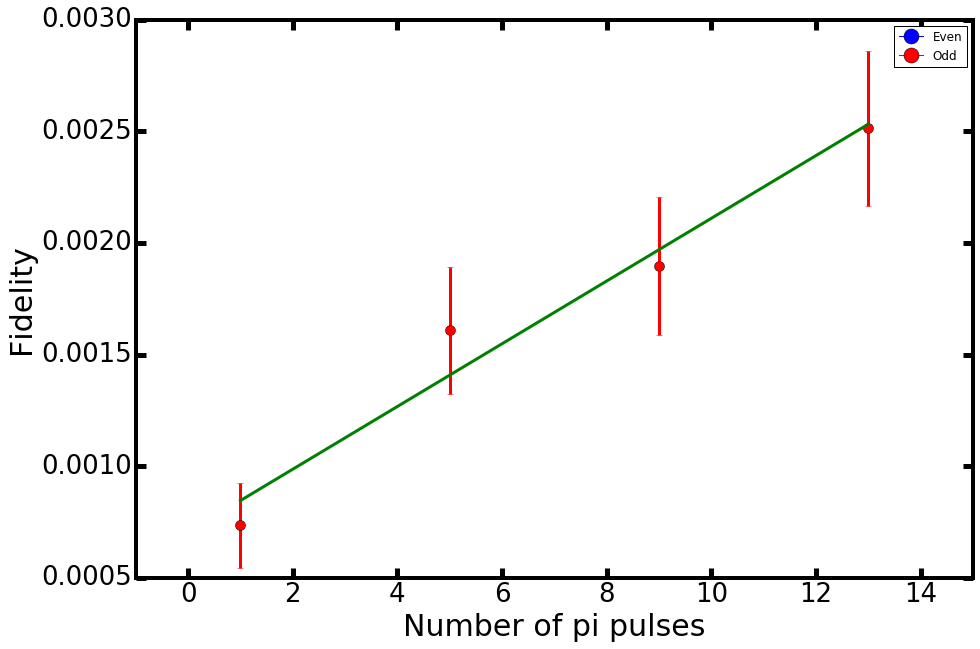

In [603]:
# Read in the data
rcParams['axes.linewidth'] = 4
from scipy.optimize import curve_fit
rcParams["figure.figsize"] = 15, 10
rcParams['legend.numpoints'] = 1
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D


hst_1 = np.loadtxt('Z:/Group_Share/Barium/Data/2018.dir/12.dir/2018_12_10.dir/00163 - Rabi_hist.csv', delimiter = ',')
hst_5 = np.loadtxt('Z:/Group_Share/Barium/Data/2018.dir/12.dir/2018_12_10.dir/00166 - Rabi_hist.csv', delimiter = ',')
hst_9 = np.loadtxt('Z:/Group_Share/Barium/Data/2018.dir/12.dir/2018_12_10.dir/00169 - Rabi_hist.csv', delimiter = ',')
hst_13_1 = np.loadtxt('Z:/Group_Share/Barium/Data/2018.dir/12.dir/2018_12_10.dir/00172 - Rabi_hist.csv', delimiter = ',')
hst_13_2 = np.loadtxt('Z:/Group_Share/Barium/Data/2018.dir/12.dir/2018_12_10.dir/00175 - Rabi_hist.csv', delimiter = ',')

hist_b = {}# {4:hst_4cp, 10: np.concatenate((hst_10cp1,hst_10cp2))}
hist_d = {1:hst_1, 5: hst_5, 9:hst_9, 13:np.concatenate((hst_13_1,hst_13_2))}

discriminator = 12
dc_threshold = 14

sd_hist_b = {}
sd_hist_d = {}

for key in hist_b:
    dc_counts = hist_b[key][:,1]
    sd_counts = hist_b[key][:,2]
    sd_new_b = np.array([])
    
    for i in range(len(sd_counts)):
        if dc_counts[i] > dc_threshold:
            sd_new_b = np.append(sd_new_b, sd_counts[i])
    
    sd_hist_b[key] = sd_new_b

    
for key in hist_d:
    dc_counts = hist_d[key][:,1]
    sd_counts = hist_d[key][:,2]
    sd_new_d = np.array([])
    
    for i in range(len(sd_counts)):
        if dc_counts[i] > dc_threshold:
            sd_new_d = np.append(sd_new_d, sd_counts[i])
    
    sd_hist_d[key] = sd_new_d    

hist_b_fid = {}
hist_d_fid = {}    
hist_b_err = {}
hist_d_err = {}

fig, ax = plt.subplots()
for key in sd_hist_b:
    hist_b_err[key] = len(np.where(sd_hist_b[key] <= discriminator)[0])
    hist_b_fid[key] = float(hist_b_err[key])/len(sd_hist_b[key])
    
    ax.plot(key,hist_b_fid[key], 'o', color = 'b', markersize = 10)
    ax.errorbar(key,hist_b_fid[key], yerr= np.sqrt(hist_b_err[key])/len(sd_hist_b[key]), color='b', linewidth = 3)
    
for key in sd_hist_d:
    hist_d_err[key] = len(np.where(sd_hist_d[key] >= discriminator)[0])
    hist_d_fid[key] = float(hist_d_err[key])/len(sd_hist_d[key])    
    
    ax.plot(key, hist_d_fid[key], 'o', color = 'r', markersize = 10)
    ax.errorbar(key, hist_d_fid[key], yerr= np.sqrt(hist_d_err[key])/len(sd_hist_d[key]), color='r', linewidth = 3)    
plt.xlim([-1,15])    
plt.xlabel('Number of pi pulses', fontsize = 30)
plt.ylabel('Fidelity', fontsize = 30)
plt.tick_params(labelsize = 26)
plt.tick_params(width=5, length=10)

legend_elements = [Line2D([0], [0], color='b', marker = 'o', label='Even', markersize = 15),
                   Line2D([0], [0], marker='o', color='r', label='Odd', markersize=15)]
ax.legend(handles=legend_elements, loc='upper right')



for key in sorted(sd_hist_b):
    print 'Pulse number: ', key, '   Fidelity: ', '{:.4e}'.format(1- hist_b_fid[key]), '   Number of errors: ', \
    hist_b_err[key], '   Number of exps: ', len(sd_hist_b[key]), '   Error: ', \
    '{:.1e}'.format(np.sqrt(hist_b_err[key])/len(sd_hist_b[key]))

    
for key in sorted(sd_hist_d):
    print 'Pulse number: ', key, '   Fidelity: ', '{:.4e}'.format(hist_d_fid[key]), '   Number of errors: ', \
    hist_d_err[key], '   Number of exps: ', len(sd_hist_d[key]), '   Error: ', \
    '{:.1e}'.format(np.sqrt(hist_d_err[key])/len(sd_hist_d[key]))
    
    
def line_fit(x, m, b):
    return x*m + b

x = np.array(sorted(hist_d_fid, key=lambda key: hist_d_fid[key]))
y = np.array(sorted(hist_d_fid.values()))

fit_line, err_line = curve_fit(line_fit ,x , y, p0 = [1.e-3, 0.0])

print 'Slope: ', '{:.3e}'.format(fit_line[0]), '{:.3e}'.format(np.sqrt(err_line[0,0]))
print 'Offset: ', '{:.3e}'.format(fit_line[1]), '{:.3e}'.format(np.sqrt(err_line[1,1]))
    

y_fit =  line_fit(x , fit_line[0], fit_line[1])

plot(x, y_fit, color = 'g', linewidth = 3)
show()


### Knill Sequence Flipping Phase in between pulses

Pulse number:  1    Fidelity:  5.4445e-04    Number of errors:  11    Number of exps:  20204    Error:  1.6e-04
Pulse number:  5    Fidelity:  1.3196e-03    Number of errors:  26    Number of exps:  19703    Error:  2.6e-04
Pulse number:  9    Fidelity:  1.8228e-03    Number of errors:  35    Number of exps:  19201    Error:  3.1e-04
Slope:  1.598e-04 1.962e-05
Offset:  4.300e-04 1.172e-04


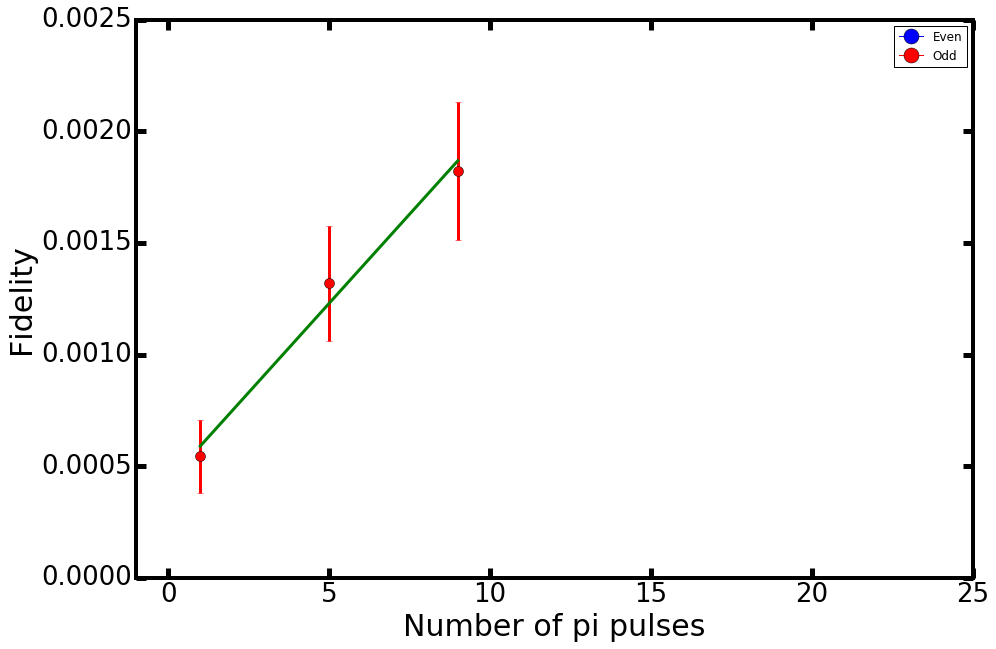

In [568]:
# Read in the data
rcParams['axes.linewidth'] = 4
from scipy.optimize import curve_fit
rcParams["figure.figsize"] = 15, 10
rcParams['legend.numpoints'] = 1
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D


hst_1 = np.loadtxt('Z:/Group_Share/Barium/Data/2018.dir/12.dir/2018_12_10.dir/00205 - Rabi_hist.csv', delimiter = ',')
hst_5_1 = np.loadtxt('Z:/Group_Share/Barium/Data/2018.dir/12.dir/2018_12_10.dir/00208 - Rabi_hist.csv', delimiter = ',')
hst_5_2 = np.loadtxt('Z:/Group_Share/Barium/Data/2018.dir/12.dir/2018_12_10.dir/00214 - Rabi_hist.csv', delimiter = ',')
hst_9_1 = np.loadtxt('Z:/Group_Share/Barium/Data/2018.dir/12.dir/2018_12_10.dir/00220 - Rabi_hist.csv', delimiter = ',')
hst_9_2 = np.loadtxt('Z:/Group_Share/Barium/Data/2018.dir/12.dir/2018_12_10.dir/00226 - Rabi_hist.csv', delimiter = ',')
hst_13 = np.loadtxt('Z:/Group_Share/Barium/Data/2018.dir/12.dir/2018_12_10.dir/00229 - Rabi_hist.csv', delimiter = ',')


hist_b = {}# {4:hst_4cp, 10: np.concatenate((hst_10cp1,hst_10cp2))}
hist_d = {1:hst_1, 5: np.concatenate((hst_5_1,hst_5_2)), 9:np.concatenate((hst_9_1,hst_9_2)), 13:hst_13}

discriminator = 12
dc_threshold = 14

sd_hist_b = {}
sd_hist_d = {}

for key in hist_b:
    dc_counts = hist_b[key][:,1]
    sd_counts = hist_b[key][:,2]
    sd_new_b = np.array([])
    
    for i in range(len(sd_counts)):
        if dc_counts[i] > dc_threshold:
            sd_new_b = np.append(sd_new_b, sd_counts[i])
    
    sd_hist_b[key] = sd_new_b

    
for key in hist_d:
    dc_counts = hist_d[key][:,1]
    sd_counts = hist_d[key][:,2]
    sd_new_d = np.array([])
    
    for i in range(len(sd_counts)):
        if dc_counts[i] > dc_threshold:
            sd_new_d = np.append(sd_new_d, sd_counts[i])
    
    sd_hist_d[key] = sd_new_d    

hist_b_fid = {}
hist_d_fid = {}    
hist_b_err = {}
hist_d_err = {}

fig, ax = plt.subplots()
for key in sd_hist_b:
    hist_b_err[key] = len(np.where(sd_hist_b[key] <= discriminator)[0])
    hist_b_fid[key] = float(hist_b_err[key])/len(sd_hist_b[key])
    
    ax.plot(key,hist_b_fid[key], 'o', color = 'b', markersize = 10)
    ax.errorbar(key,hist_b_fid[key], yerr= np.sqrt(hist_b_err[key])/len(sd_hist_b[key]), color='b', linewidth = 3)
    
for key in sd_hist_d:
    hist_d_err[key] = len(np.where(sd_hist_d[key] >= discriminator)[0])
    hist_d_fid[key] = float(hist_d_err[key])/len(sd_hist_d[key])    
    
    ax.plot(key, hist_d_fid[key], 'o', color = 'r', markersize = 10)
    ax.errorbar(key, hist_d_fid[key], yerr= np.sqrt(hist_d_err[key])/len(sd_hist_d[key]), color='r', linewidth = 3)    
plt.xlim([-1,25])    
plt.xlabel('Number of pi pulses', fontsize = 30)
plt.ylabel('Fidelity', fontsize = 30)
plt.tick_params(labelsize = 26)
plt.tick_params(width=5, length=10)

legend_elements = [Line2D([0], [0], color='b', marker = 'o', label='Even', markersize = 15),
                   Line2D([0], [0], marker='o', color='r', label='Odd', markersize=15)]
ax.legend(handles=legend_elements, loc='upper right')



for key in sorted(sd_hist_b):
    print 'Pulse number: ', key, '   Fidelity: ', '{:.4e}'.format(1- hist_b_fid[key]), '   Number of errors: ', \
    hist_b_err[key], '   Number of exps: ', len(sd_hist_b[key]), '   Error: ', \
    '{:.1e}'.format(np.sqrt(hist_b_err[key])/len(sd_hist_b[key]))

    
for key in sorted(sd_hist_d):
    print 'Pulse number: ', key, '   Fidelity: ', '{:.4e}'.format(hist_d_fid[key]), '   Number of errors: ', \
    hist_d_err[key], '   Number of exps: ', len(sd_hist_d[key]), '   Error: ', \
    '{:.1e}'.format(np.sqrt(hist_d_err[key])/len(sd_hist_d[key]))
    
    
def line_fit(x, m, b):
    return x*m + b

x = np.array(sorted(hist_d_fid, key=lambda key: hist_d_fid[key]))
y = np.array(sorted(hist_d_fid.values()))

fit_line, err_line = curve_fit(line_fit ,x , y, p0 = [1.e-3, 0.0])

print 'Slope: ', '{:.3e}'.format(fit_line[0]), '{:.3e}'.format(np.sqrt(err_line[0,0]))
print 'Offset: ', '{:.3e}'.format(fit_line[1]), '{:.3e}'.format(np.sqrt(err_line[1,1]))
    

y_fit =  line_fit(x , fit_line[0], fit_line[1])

plot(x, y_fit, color = 'g', linewidth = 3)
show()


## Single Pi-Pulse with long delay after

Pulse number:  1    Fidelity:  5.0836e-04    Number of errors:  11    Number of exps:  21638    Error:  1.5e-04
Pulse number:  5    Fidelity:  7.8464e-04    Number of errors:  17    Number of exps:  21666    Error:  1.9e-04
Pulse number:  9    Fidelity:  6.9580e-04    Number of errors:  15    Number of exps:  21558    Error:  1.8e-04
Pulse number:  13    Fidelity:  7.1137e-04    Number of errors:  15    Number of exps:  21086    Error:  1.8e-04
Pulse number:  17    Fidelity:  7.8060e-04    Number of errors:  17    Number of exps:  21778    Error:  1.9e-04
Slope:  1.178e-05 7.672e-06
Offset:  5.901e-04 8.156e-05


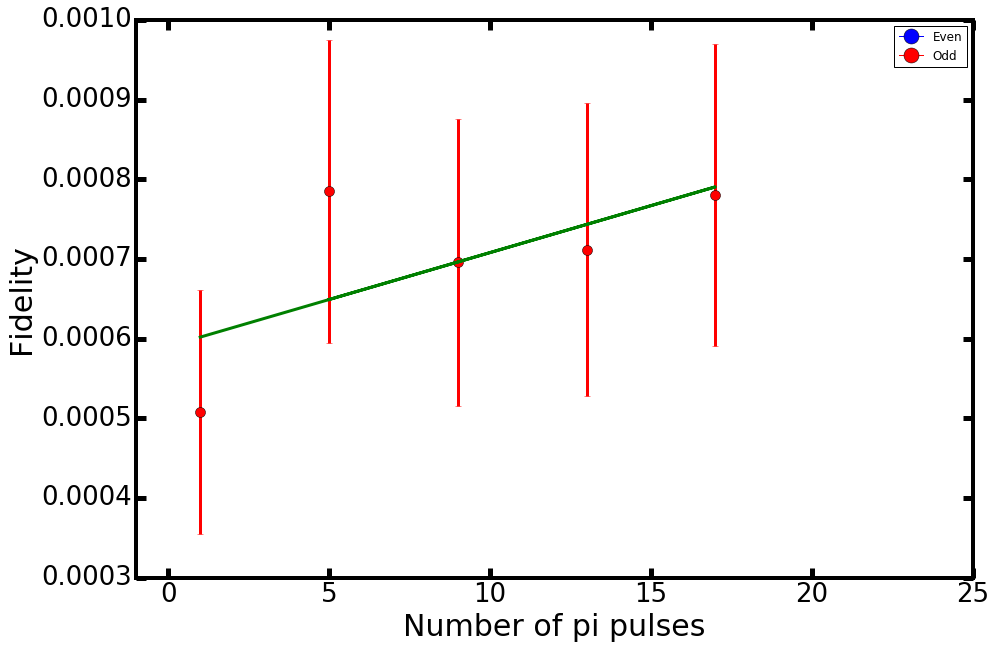

In [613]:
# Read in the data
rcParams['axes.linewidth'] = 4
from scipy.optimize import curve_fit
rcParams["figure.figsize"] = 15, 10
rcParams['legend.numpoints'] = 1
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D


hst_1 = np.loadtxt('Z:/Group_Share/Barium/Data/2018.dir/12.dir/2018_12_12.dir/00080 - Rabi_hist.csv', delimiter = ',')
hst_5 = np.loadtxt('Z:/Group_Share/Barium/Data/2018.dir/12.dir/2018_12_12.dir/00083 - Rabi_hist.csv', delimiter = ',')
hst_9 = np.loadtxt('Z:/Group_Share/Barium/Data/2018.dir/12.dir/2018_12_12.dir/00086 - Rabi_hist.csv', delimiter = ',')
hst_13 = np.loadtxt('Z:/Group_Share/Barium/Data/2018.dir/12.dir/2018_12_12.dir/00089 - Rabi_hist.csv', delimiter = ',')
hst_17 = np.loadtxt('Z:/Group_Share/Barium/Data/2018.dir/12.dir/2018_12_12.dir/00092 - Rabi_hist.csv', delimiter = ',')


hist_b = {}# {4:hst_4cp, 10: np.concatenate((hst_10cp1,hst_10cp2))}
hist_d = {1:hst_1, 5: hst_5, 9:hst_9, 13:hst_13, 17:hst_17}

discriminator = 12
dc_threshold = 14

sd_hist_b = {}
sd_hist_d = {}

for key in hist_b:
    dc_counts = hist_b[key][:,1]
    sd_counts = hist_b[key][:,2]
    sd_new_b = np.array([])
    
    for i in range(len(sd_counts)):
        if dc_counts[i] > dc_threshold:
            sd_new_b = np.append(sd_new_b, sd_counts[i])
    
    sd_hist_b[key] = sd_new_b

    
for key in hist_d:
    dc_counts = hist_d[key][:,1]
    sd_counts = hist_d[key][:,2]
    sd_new_d = np.array([])
    
    for i in range(len(sd_counts)):
        if dc_counts[i] >= dc_threshold:
            sd_new_d = np.append(sd_new_d, sd_counts[i])
    
    sd_hist_d[key] = sd_new_d    

hist_b_fid = {}
hist_d_fid = {}    
hist_b_err = {}
hist_d_err = {}

fig, ax = plt.subplots()
for key in sd_hist_b:
    hist_b_err[key] = len(np.where(sd_hist_b[key] <= discriminator)[0])
    hist_b_fid[key] = float(hist_b_err[key])/len(sd_hist_b[key])
    
    ax.plot(key,hist_b_fid[key], 'o', color = 'b', markersize = 10)
    ax.errorbar(key,hist_b_fid[key], yerr= np.sqrt(hist_b_err[key])/len(sd_hist_b[key]), color='b', linewidth = 3)
    
for key in sd_hist_d:
    hist_d_err[key] = len(np.where(sd_hist_d[key] >= discriminator)[0])
    hist_d_fid[key] = float(hist_d_err[key])/len(sd_hist_d[key])    
    
    ax.plot(key, hist_d_fid[key], 'o', color = 'r', markersize = 10)
    ax.errorbar(key, hist_d_fid[key], yerr= np.sqrt(hist_d_err[key])/len(sd_hist_d[key]), color='r', linewidth = 3)    
plt.xlim([-1,25])    
plt.xlabel('Number of pi pulses', fontsize = 30)
plt.ylabel('Fidelity', fontsize = 30)
plt.tick_params(labelsize = 26)
plt.tick_params(width=5, length=10)

legend_elements = [Line2D([0], [0], color='b', marker = 'o', label='Even', markersize = 15),
                   Line2D([0], [0], marker='o', color='r', label='Odd', markersize=15)]
ax.legend(handles=legend_elements, loc='upper right')



for key in sorted(sd_hist_b):
    print 'Pulse number: ', key, '   Fidelity: ', '{:.4e}'.format(1- hist_b_fid[key]), '   Number of errors: ', \
    hist_b_err[key], '   Number of exps: ', len(sd_hist_b[key]), '   Error: ', \
    '{:.1e}'.format(np.sqrt(hist_b_err[key])/len(sd_hist_b[key]))

    
for key in sorted(sd_hist_d):
    print 'Pulse number: ', key, '   Fidelity: ', '{:.4e}'.format(hist_d_fid[key]), '   Number of errors: ', \
    hist_d_err[key], '   Number of exps: ', len(sd_hist_d[key]), '   Error: ', \
    '{:.1e}'.format(np.sqrt(hist_d_err[key])/len(sd_hist_d[key]))
    
    
def line_fit(x, m, b):
    return x*m + b

x = np.array(sorted(hist_d_fid, key=lambda key: hist_d_fid[key]))
y = np.array(sorted(hist_d_fid.values()))

fit_line, err_line = curve_fit(line_fit ,x , y, p0 = [1.e-3, 0.0])

print 'Slope: ', '{:.3e}'.format(fit_line[0]), '{:.3e}'.format(np.sqrt(err_line[0,0]))
print 'Offset: ', '{:.3e}'.format(fit_line[1]), '{:.3e}'.format(np.sqrt(err_line[1,1]))
    

y_fit =  line_fit(x , fit_line[0], fit_line[1])

plot(x, y_fit, color = 'g', linewidth = 3)
show()


### 7/12/19 Stacked Knill w/ New TWT

Pulse number:  1    Fidelity:  4.1649e-04    Number of errors:  1    Number of exps:  2401    Error:  4.2e-04
Pulse number:  5    Fidelity:  6.1249e-04    Number of errors:  3    Number of exps:  4898    Error:  3.5e-04
Pulse number:  9    Fidelity:  1.2229e-03    Number of errors:  4    Number of exps:  3271    Error:  6.1e-04
Pulse number:  13    Fidelity:  1.4085e-03    Number of errors:  7    Number of exps:  4970    Error:  5.3e-04
Slope:  8.966e-05 1.484e-05
Offset:  2.875e-04 1.233e-04


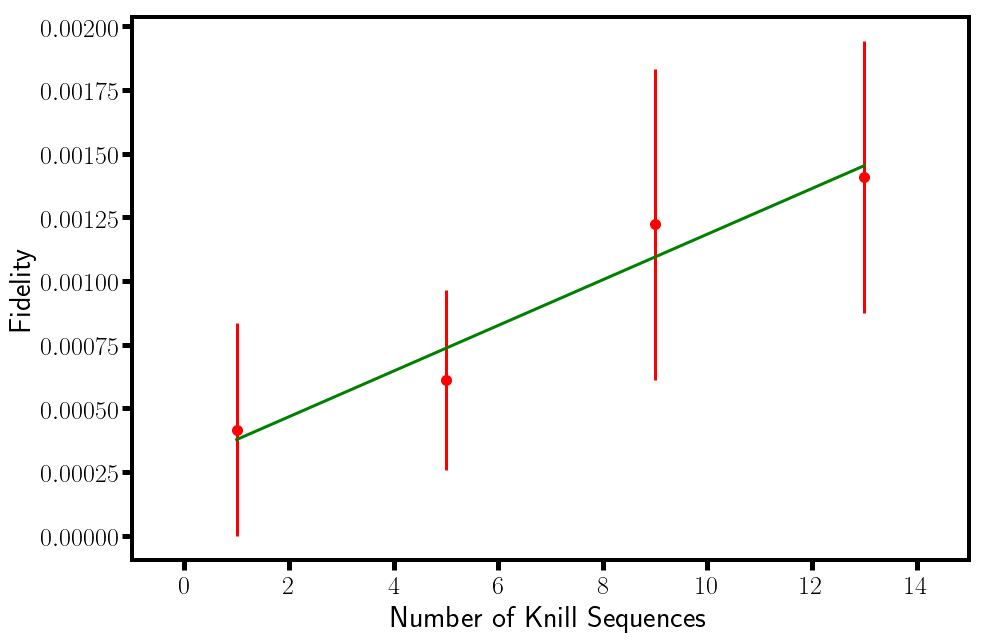

In [163]:
# Read in the data
rcParams['axes.linewidth'] = 4
from scipy.optimize import curve_fit
rcParams["figure.figsize"] = 15, 10
rcParams['legend.numpoints'] = 1
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D


hst_1 = np.loadtxt('Z:/Group_Share/Barium/Data/2019.dir/07.dir/2019_07_12.dir/00249 - Rabi_hist.csv', delimiter = ',')
hst_5_1 = np.loadtxt('Z:/Group_Share/Barium/Data/2019.dir/07.dir/2019_07_12.dir/00222 - Rabi_hist.csv', delimiter = ',')
hst_5_2 = np.loadtxt('Z:/Group_Share/Barium/Data/2019.dir/07.dir/2019_07_12.dir/00225 - Rabi_hist.csv', delimiter = ',')
hst_5_3 = np.loadtxt('Z:/Group_Share/Barium/Data/2019.dir/07.dir/2019_07_12.dir/00231 - Rabi_hist.csv', delimiter = ',')
hst_9_1 = np.loadtxt('Z:/Group_Share/Barium/Data/2019.dir/07.dir/2019_07_12.dir/00243 - Rabi_hist.csv', delimiter = ',')
hst_9_2 = np.loadtxt('Z:/Group_Share/Barium/Data/2019.dir/07.dir/2019_07_12.dir/00246 - Rabi_hist.csv', delimiter = ',')
hst_13_1 = np.loadtxt('Z:/Group_Share/Barium/Data/2019.dir/07.dir/2019_07_12.dir/00237 - Rabi_hist.csv', delimiter = ',')
hst_13_2 = np.loadtxt('Z:/Group_Share/Barium/Data/2019.dir/07.dir/2019_07_12.dir/00240 - Rabi_hist.csv', delimiter = ',')


hist_b = {}# {4:hst_4cp, 10: np.concatenate((hst_10cp1,hst_10cp2))}
hist_d = {1:hst_1, 5: np.concatenate((hst_5_1,hst_5_2,hst_5_3)), 9:np.concatenate((hst_9_1,hst_9_2)), 13:np.concatenate((hst_13_1,hst_13_2))}

discriminator = 12
dc_threshold = 25

sd_hist_b = {}
sd_hist_d = {}

for key in hist_b:
    dc_counts = hist_b[key][:,1]
    sd_counts = hist_b[key][:,2]
    sd_new_b = np.array([])
    
    for i in range(len(sd_counts)):
        if dc_counts[i] > dc_threshold:
            sd_new_b = np.append(sd_new_b, sd_counts[i])
    
    sd_hist_b[key] = sd_new_b

    
for key in hist_d:
    dc_counts = hist_d[key][:,1]
    sd_counts = hist_d[key][:,2]
    sd_new_d = np.array([])
    
    for i in range(len(sd_counts)):
        if dc_counts[i] > dc_threshold:
            sd_new_d = np.append(sd_new_d, sd_counts[i])
    
    sd_hist_d[key] = sd_new_d    

hist_b_fid = {}
hist_d_fid = {}    
hist_b_err = {}
hist_d_err = {}

fig, ax = plt.subplots()
for key in sd_hist_b:
    hist_b_err[key] = len(np.where(sd_hist_b[key] <= discriminator)[0])
    hist_b_fid[key] = float(hist_b_err[key])/len(sd_hist_b[key])
    
    ax.plot(key,hist_b_fid[key], 'o', color = 'b', markersize = 10)
    ax.errorbar(key,hist_b_fid[key], yerr= np.sqrt(hist_b_err[key])/len(sd_hist_b[key]), color='b', linewidth = 3)
    
for key in sd_hist_d:
    hist_d_err[key] = len(np.where(sd_hist_d[key] >= discriminator)[0])
    hist_d_fid[key] = float(hist_d_err[key])/len(sd_hist_d[key])    
    
    ax.plot(key, hist_d_fid[key], 'o', color = 'r', markersize = 10)
    ax.errorbar(key, hist_d_fid[key], yerr= np.sqrt(hist_d_err[key])/len(sd_hist_d[key]), color='r', linewidth = 3)    
plt.xlim([-1,15])    
plt.xlabel('Number of Knill Sequences', fontsize = 30)
plt.ylabel('Fidelity', fontsize = 30)
plt.tick_params(labelsize = 26)
plt.tick_params(width=5, length=10)

#legend_elements = [Line2D([0], [0], color='b', marker = 'o', label='Even', markersize = 15),
                   #Line2D([0], [0], marker='o', color='r', label='Odd', markersize=15)]
#ax.legend(handles=legend_elements, loc='upper right')



for key in sorted(sd_hist_b):
    print 'Pulse number: ', key, '   Fidelity: ', '{:.4e}'.format(1- hist_b_fid[key]), '   Number of errors: ', \
    hist_b_err[key], '   Number of exps: ', len(sd_hist_b[key]), '   Error: ', \
    '{:.1e}'.format(np.sqrt(hist_b_err[key])/len(sd_hist_b[key]))

    
for key in sorted(sd_hist_d):
    print 'Pulse number: ', key, '   Fidelity: ', '{:.4e}'.format(hist_d_fid[key]), '   Number of errors: ', \
    hist_d_err[key], '   Number of exps: ', len(sd_hist_d[key]), '   Error: ', \
    '{:.1e}'.format(np.sqrt(hist_d_err[key])/len(sd_hist_d[key]))
    
    
def line_fit(x, m, b):
    return x*m + b

x = np.array(sorted(hist_d_fid, key=lambda key: hist_d_fid[key]))
y = np.array(sorted(hist_d_fid.values()))

fit_line, err_line = curve_fit(line_fit ,x , y, p0 = [1.e-3, 0.0])

print 'Slope: ', '{:.3e}'.format(fit_line[0]), '{:.3e}'.format(np.sqrt(err_line[0,0]))
print 'Offset: ', '{:.3e}'.format(fit_line[1]), '{:.3e}'.format(np.sqrt(err_line[1,1]))
    

y_fit =  line_fit(x , fit_line[0], fit_line[1])

plot(x, y_fit, color = 'g', linewidth = 3)
show()


### 138 Manifold Readout

Number of bright errors:  0
Fractional error : 0.00000
Fidelity : 1.00000 +/-  0.0e+00
Number of exps:  98016 

Number of dark errors:  16
Fractional error : 0.00016
Fidelity : 0.99984 +/-  4.1e-05
Number of exps:  97523 

Number of errors:  16
Fractional error : 0.00008
Fidelity : 0.99992 +/-  2.0e-05
Number of exps:  195539
15.0


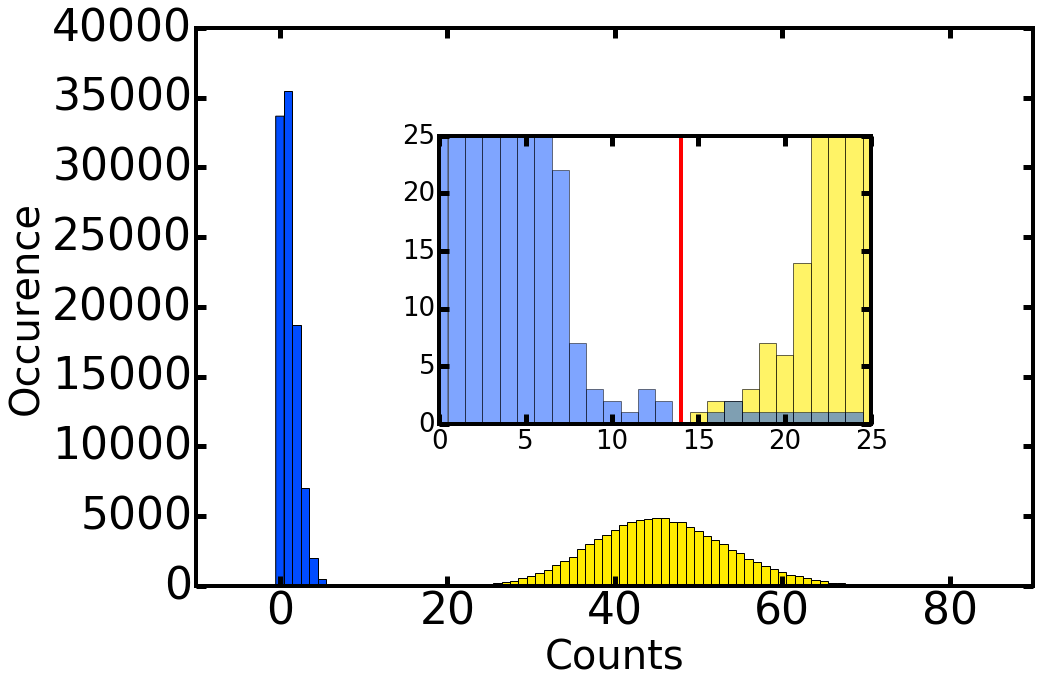

In [18]:
# Read in the data
rcParams['axes.linewidth'] = 4
from scipy.optimize import curve_fit
rcParams["figure.figsize"] = 15, 10
import matplotlib.pyplot as plt

data = np.loadtxt('Z:/Group_Share/Barium/Data/2019.dir/01.dir/2019_01_12.dir/00038 - High_Fid_hist_bright.csv', delimiter = ',')
data1 = np.loadtxt('Z:/Group_Share/Barium/Data/2019.dir/01.dir/2019_01_12.dir/00039 - High_Fid_hist_dark.csv', delimiter = ',')
data2 = np.loadtxt('Z:/Group_Share/Barium/Data/2019.dir/01.dir/2019_01_12.dir/00043 - High_Fid_hist_bright.csv', delimiter = ',')
data3 = np.loadtxt('Z:/Group_Share/Barium/Data/2019.dir/01.dir/2019_01_12.dir/00044 - High_Fid_hist_dark.csv', delimiter = ',')
data4 = np.loadtxt('Z:/Group_Share/Barium/Data/2019.dir/01.dir/2019_01_12.dir/00053 - High_Fid_hist_bright.csv', delimiter = ',')
data5 = np.loadtxt('Z:/Group_Share/Barium/Data/2019.dir/01.dir/2019_01_12.dir/00054 - High_Fid_hist_dark.csv', delimiter = ',')



hist_b = {1: data, 2: data2, 3: data4}
hist_d = {1:data1, 2:data3, 3: data5}

discriminator = 14
dc_threshold = 14

sd_new_b = np.array([])
sd_new_d = np.array([])

for key in hist_b:
    dc_counts = hist_b[key][:,1]
    sd_counts = hist_b[key][:,2]
    
    for i in range(len(sd_counts)):
        if dc_counts[i] > dc_threshold:
            sd_new_b = np.append(sd_new_b, sd_counts[i])
    
    
for key in hist_d:
    dc_counts = hist_d[key][:,1]
    sd_counts = hist_d[key][:,2]

    
    for i in range(len(sd_counts)):
        if dc_counts[i] >= dc_threshold:
            sd_new_d = np.append(sd_new_d, sd_counts[i])
      

    
bright_counts = sd_new_b
dark_counts = sd_new_d

counts = np.concatenate((sd_new_b, sd_new_d), axis = 0)
bright_err = len(np.where(sd_new_b <= discriminator)[0])
dark_err = len(np.where(sd_new_d > discriminator)[0])
tot_err = bright_err + dark_err



print "Number of bright errors: ", bright_err
print "Fractional error :", "{:.5f}".format(float(bright_err)/len(bright_counts))
print "Fidelity :", "{:.5f}".format(1 - float(bright_err)/len(bright_counts)), '+/- ', "{:.1e}".format(np.sqrt(bright_err)/len(bright_counts))
print "Number of exps: ", len(bright_counts), '\n'

print "Number of dark errors: ", dark_err
print "Fractional error :", "{:.5f}".format(float(dark_err)/len(dark_counts))
print "Fidelity :", "{:.5f}".format(1 - float(dark_err)/len(dark_counts)), '+/- ', "{:.1e}".format(np.sqrt(dark_err)/len(dark_counts))
print "Number of exps: ", len(dark_counts), '\n'

print "Number of errors: ", tot_err
print "Fractional error :", "{:.5f}".format(float(tot_err)/len(counts))
print "Fidelity :", "{:.5f}".format(1 - float(tot_err)/len(counts)), '+/- ', "{:.1e}".format(np.sqrt(tot_err)/len(counts))
print "Number of exps: ", len(counts)
bins_bright = int(bright_counts.max())
bins_dark = int(dark_counts.max())
print np.amin(bright_counts)

hist_dat_bright = plt.hist(bright_counts, bins_bright , range = (0,bins_bright), color  = '#FFEB00', alpha = 1, align ='left',edgecolor = 'black')
hist_dat_dark = plt.hist(dark_counts, bins_dark, color = '#004CFF',alpha = 1, align ='left', edgecolor = 'black')



#title(str(t_points[num]) + ' us Shelving Time', fontsize = 46)
plt.xlabel('Counts', fontsize = 40)
plt.ylabel('Occurence', fontsize = 40)
#plt.xlim([-.5, bins_bright])
#ylim([0,10])
plt.plot([discriminator,discriminator], [0,10],color = 'r', linewidth = 4)
plt.tick_params(labelsize = 44)
plt.tick_params(width=5, length=10)


a = plt.axes([.35,.35,.4,.4])
hist_dat_bright = plt.hist(bright_counts, bins_bright, range = (0,bins_bright), color  = '#FFEB00', alpha = .6, align ='left', edgecolor = 'black')
hist_dat_dark = plt.hist(dark_counts, bins_dark, color = '#004CFF', alpha = .5, align ='left', edgecolor = 'black')
plt.plot([discriminator,discriminator], [0,25],color = '#FF0000', linewidth = 4)
plt.xlim([0,25])
plt.ylim([0,25])
plt.tick_params(labelsize = 26)
plt.tick_params(width=5, length=10)

plt.show()

#savefig('High_Fig_hist.png', bbox_inches='tight')
#savefig('High_Fig_hist.pdf', bbox_inches='tight')
#savefig('High_Fig_hist.eps', bbox_inches='tight', format='eps', dpi = 1000)

## 138 Readout with max count rate

Number of bright errors:  4
Fractional error : 0.00002
Fidelity : 0.99998 +/-  1.0e-05
Number of exps:  199859 

Number of dark errors:  15
Fractional error : 0.00008
Fidelity : 0.99992 +/-  2.0e-05
Number of exps:  195166 

Number of errors:  19
Fractional error : 0.00005
Fidelity : 0.99995 +/-  1.1e-05
Number of exps:  395025
3.0


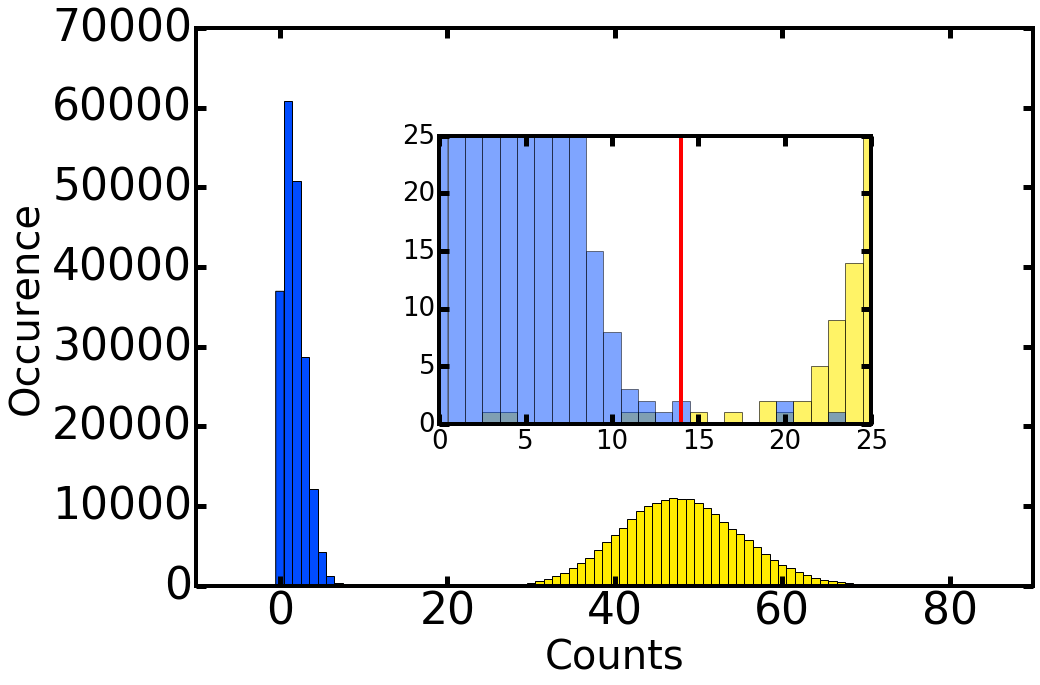

In [19]:
# Read in the data
rcParams['axes.linewidth'] = 4
from scipy.optimize import curve_fit
rcParams["figure.figsize"] = 15, 10
import matplotlib.pyplot as plt

data = np.loadtxt('Z:/Group_Share/Barium/Data/2019.dir/01.dir/2019_01_26.dir/00027 - High_Fid_hist_bright.csv', delimiter = ',')
data1 = np.loadtxt('Z:/Group_Share/Barium/Data/2019.dir/01.dir/2019_01_26.dir/00028 - High_Fid_hist_dark.csv', delimiter = ',')
data2 = np.loadtxt('Z:/Group_Share/Barium/Data/2019.dir/01.dir/2019_01_26.dir/00037 - High_Fid_hist_bright.csv', delimiter = ',')
data3 = np.loadtxt('Z:/Group_Share/Barium/Data/2019.dir/01.dir/2019_01_26.dir/00038 - High_Fid_hist_dark.csv', delimiter = ',')
data4 = np.loadtxt('Z:/Group_Share/Barium/Data/2019.dir/01.dir/2019_01_26.dir/00042 - High_Fid_hist_bright.csv', delimiter = ',')
data5 = np.loadtxt('Z:/Group_Share/Barium/Data/2019.dir/01.dir/2019_01_26.dir/00043 - High_Fid_hist_dark.csv', delimiter = ',')
data6 = np.loadtxt('Z:/Group_Share/Barium/Data/2019.dir/01.dir/2019_01_26.dir/00047 - High_Fid_hist_bright.csv', delimiter = ',')
data7 = np.loadtxt('Z:/Group_Share/Barium/Data/2019.dir/01.dir/2019_01_26.dir/00048 - High_Fid_hist_dark.csv', delimiter = ',')
data8 = np.loadtxt('Z:/Group_Share/Barium/Data/2019.dir/01.dir/2019_01_26.dir/00052 - High_Fid_hist_bright.csv', delimiter = ',')
data9 = np.loadtxt('Z:/Group_Share/Barium/Data/2019.dir/01.dir/2019_01_26.dir/00053 - High_Fid_hist_dark.csv', delimiter = ',')



hist_b = {1: data, 2: data2, 3: data4, 4:data6, 5:data8}
hist_d = {1:data1, 2:data3, 3: data5, 4:data7, 5:data9}

discriminator = 14
dc_threshold = 35

sd_new_b = np.array([])
sd_new_d = np.array([])

for key in hist_b:
    dc_counts = hist_b[key][:,1]
    sd_counts = hist_b[key][:,2]
    
    for i in range(len(sd_counts)):
        if dc_counts[i] > dc_threshold:
            sd_new_b = np.append(sd_new_b, sd_counts[i])
    
    
for key in hist_d:
    dc_counts = hist_d[key][:,1]
    sd_counts = hist_d[key][:,2]

    
    for i in range(len(sd_counts)):
        if dc_counts[i] >= dc_threshold:
            sd_new_d = np.append(sd_new_d, sd_counts[i])
      

    
bright_counts = sd_new_b
dark_counts = sd_new_d

counts = np.concatenate((sd_new_b, sd_new_d), axis = 0)
bright_err = len(np.where(sd_new_b <= discriminator)[0])
dark_err = len(np.where(sd_new_d > discriminator)[0])
tot_err = bright_err + dark_err



print "Number of bright errors: ", bright_err
print "Fractional error :", "{:.5f}".format(float(bright_err)/len(bright_counts))
print "Fidelity :", "{:.5f}".format(1 - float(bright_err)/len(bright_counts)), '+/- ', "{:.1e}".format(np.sqrt(bright_err)/len(bright_counts))
print "Number of exps: ", len(bright_counts), '\n'

print "Number of dark errors: ", dark_err
print "Fractional error :", "{:.5f}".format(float(dark_err)/len(dark_counts))
print "Fidelity :", "{:.5f}".format(1 - float(dark_err)/len(dark_counts)), '+/- ', "{:.1e}".format(np.sqrt(dark_err)/len(dark_counts))
print "Number of exps: ", len(dark_counts), '\n'

print "Number of errors: ", tot_err
print "Fractional error :", "{:.5f}".format(float(tot_err)/len(counts))
print "Fidelity :", "{:.5f}".format(1 - float(tot_err)/len(counts)), '+/- ', "{:.1e}".format(np.sqrt(tot_err)/len(counts))
print "Number of exps: ", len(counts)
bins_bright = int(bright_counts.max())
bins_dark = int(dark_counts.max())
print np.amin(bright_counts)

hist_dat_bright = plt.hist(bright_counts, bins_bright , range = (0,bins_bright), color  = '#FFEB00', alpha = 1, align ='left',edgecolor = 'black')
hist_dat_dark = plt.hist(dark_counts, bins_dark, color = '#004CFF',alpha = 1, align ='left', edgecolor = 'black')



#title(str(t_points[num]) + ' us Shelving Time', fontsize = 46)
plt.xlabel('Counts', fontsize = 40)
plt.ylabel('Occurence', fontsize = 40)
#plt.xlim([-.5, bins_bright])
#ylim([0,10])
plt.plot([discriminator,discriminator], [0,10],color = 'r', linewidth = 4)
plt.tick_params(labelsize = 44)
plt.tick_params(width=5, length=10)


a = plt.axes([.35,.35,.4,.4])
hist_dat_bright1 = plt.hist(bright_counts, bins_bright, range = (0,bins_bright), color  = '#FFEB00', alpha = .6, align ='left', edgecolor = 'black')
hist_dat_dark1 = plt.hist(dark_counts, bins_dark, color = '#004CFF', alpha = .5, align ='left', edgecolor = 'black')
plt.plot([discriminator,discriminator], [0,25],color = '#FF0000', linewidth = 4)
plt.xlim([0,25])
plt.ylim([0,25])
plt.tick_params(labelsize = 26)
plt.tick_params(width=5, length=10)

plt.show()

#savefig('High_Fig_hist.png', bbox_inches='tight')
#savefig('High_Fig_hist.pdf', bbox_inches='tight')
#savefig('High_Fig_hist.eps', bbox_inches='tight', format='eps', dpi = 1000)

47.9128785794
1.68514495353
Bright Fit:  47.8659438938 0.0411552493819
Dark Fit:  1.67377095233 0.00193832331346


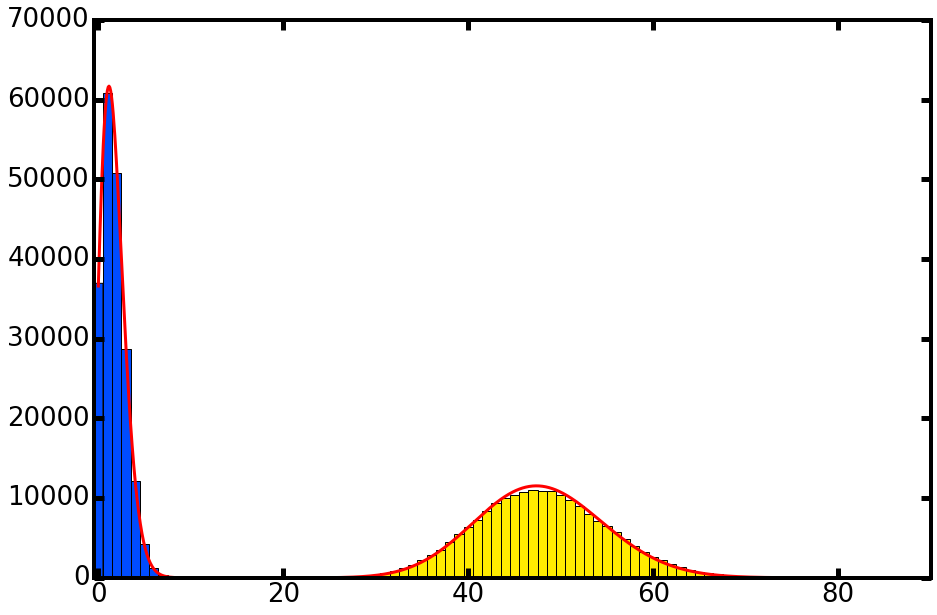

In [21]:
from scipy.optimize import curve_fit
from scipy.special import factorial
# Fit Poisson distributions to both
rcParams['axes.linewidth'] = 4
rcParams["figure.figsize"] = 15, 10

def gauss(x, A, mu, sigma):
    return A*np.exp(-(x-mu)**2/2/sigma**2)

def poiss(x, mu):
        return (np.exp(-mu)*mu**x)/factorial(x)

hist_dat_bright = plt.hist(bright_counts, bins_bright, range = (0, bins_bright), color  = '#FFEB00', alpha = 1, align ='left', edgecolor = 'black')
hist_dat_dark = plt.hist(dark_counts, bins_dark, color = '#004CFF',alpha = 1, align='left', edgecolor = 'black')    



x_bright = hist_dat_bright[1][:-1]  
y_bright = hist_dat_bright[0]/len(bright_counts)

x_dark = hist_dat_dark[1][:-1]
y_dark = hist_dat_dark[0]/len(dark_counts)


x_bright_mean = np.sum(x_bright*hist_dat_bright[0])/np.sum(hist_dat_bright[0])
print x_bright_mean

x_dark_mean = np.sum(x_dark*hist_dat_dark[0])/np.sum(hist_dat_dark[0])
print x_dark_mean

fit_bright, bright_err = curve_fit(poiss,x_bright, y_bright, p0 = [30])
print 'Bright Fit: ', fit_bright[0], np.sqrt(bright_err[0][0])

fit_dark, dark_err = curve_fit(poiss,x_dark, y_dark, p0 = [1])
print 'Dark Fit: ', fit_dark[0], np.sqrt(dark_err[0][0])

x_fit = np.linspace(0,counts.max(),1e3)
y_fit_bright = poiss(x_fit,fit_bright[0])*len(bright_counts)
y_fit_dark = poiss(x_fit,fit_dark[0])*len(dark_counts)


#x_fit = x_fit + .5

plot(x_fit,y_fit_bright,'r', linewidth = 3)
plot(x_fit,y_fit_dark,'r', linewidth = 3)

tick_params(labelsize = 26)
tick_params(width=5, length=10)
xlim([-.5,90])
#ylim([0,100])
show()

#savefig('High_Fig_hist_fit.png', bbox_inches='tight')
#savefig('High_Fig_hist_fit.pdf', bbox_inches='tight')
#savefig('High_Fig_hist_fit.eps', bbox_inches='tight', format='eps', dpi = 1000)


### Calculate ML

In [78]:
# Write a class to do the analysis

import numpy as np
import operator
import functools
from scipy.special import factorial
from scipy.optimize import curve_fit

class MaximumLikelihood:

    def __init__(self):

        self.mean_dark = .02
        self.mean_bright = 5.0
        self.number_tbins = 100.0
        self.t_start = 0.000460696
        self.t_stop = 0.01060696
        self.detection_time = 6.0e-3
        self.state_lifetime = 30.0
        self.p_dark = 0
        self.p_bright = 0
        self.err_bright = 0
        self.err_dark = 0

    def poisson(self, x, mean):
        return (np.exp(-mean)*mean**x)/factorial(x)

    def find_mean(self, bins, counts):
        return np.sum(bins*counts)/np.sum(counts)

    def fit_poisson(self, bins, counts):
        guess = self.find_mean(bins, counts)
        fit, err = curve_fit(self.poiss, bins, counts, p0 = guess)
        if abs(fit[0] - guess) < .2*guess:
            return fit[0]
        else:
            return guess

    def set_mean_dark(self, bins, counts):
        self.mean_dark = self.fit_poisson(bins, counts)

    def set_mean_bright(self, bins, counts):
        self.mean_bright = self.fit_poisson(bins, counts)

    def bin_time_tags(self, time_tags):
        #if type(self.t_start) != 'float':
            #raise ValueError(type(self.t_start))
        hist = np.histogram(time_tags, bins = self.number_tbins, range = (self.t_start, self.t_stop))
        bins = hist[1]
        counts = hist[0]
        return bins, counts

    def prob_bright(self, binned_counts):
        p_bins = self.poisson(binned_counts, self.mean_bright/self.number_tbins)
        #print p_bins
        p_bright = functools.reduce(operator.mul, p_bins)
        self.p_bright = p_bright
        return p_bright

    def prob_dark(self, binned_counts):
        # Calc prob ion did not decay during detection
        p_bins = self.poisson(binned_counts, self.mean_dark/self.number_tbins)
        p_dark_no_decay = functools.reduce(operator.mul, p_bins)
        p_no_decay = (1 - self.detection_time/self.state_lifetime)*p_dark_no_decay

        # Calc prob ion decays during detection time
        p_decay = 0
        for i in range(len(binned_counts)):
            p_bins = np.concatenate((self.poisson(binned_counts[i:], self.mean_bright/self.number_tbins), \
            self.poisson(binned_counts[:i], self.mean_dark/self.number_tbins)))
            p_dark_decay = functools.reduce(operator.mul, p_bins)
            p_decay = p_decay + p_dark_decay
        p_decay = p_decay*self.detection_time/self.state_lifetime/self.number_tbins
        p_dark = p_decay + p_no_decay
        self.p_dark = p_dark
        return p_dark

    def prob_dark_recursive(self, binned_counts):
        M = 1
        S = 0
        for i in range(len(binned_counts)):
            S = (S + M)*self.poisson(binned_counts[i], self.mean_bright/self.number_tbins)
            M = M*self.poisson(binned_counts[i], self.mean_dark/self.number_tbins)

        p_dark = (1 - self.detection_time/self.state_lifetime)*M + \
                S*self.detection_time/self.state_lifetime/self.number_tbins
        self.p_dark = p_dark
        return p_dark

    def err_bright(self):
        self.err_bright = self.p_dark/(self.p_dark + self.p_bright)
        return self.err_bright

    def err_dark(self):
        self.err_dark = self.p_bright/(self.p_dark + self.p_bright)
        return self.err_dark



ML = MaximumLikelihood()
ML.detection_time = 2.5e-3
ML.mean_dark = 1.67
ML.mean_bright = 47.86
ML.number_tbins = 100
ML.state_lifetime = 30.0

# Read in the data
rcParams['axes.linewidth'] = 4
from scipy.optimize import curve_fit
rcParams["figure.figsize"] = 15, 10
import matplotlib.pyplot as plt


data = np.loadtxt('Z:/Group_Share/Barium/Data/2019.dir/01.dir/2019_01_26.dir/00027 - High_Fid_hist_bright.csv', delimiter = ',')
data1 = np.loadtxt('Z:/Group_Share/Barium/Data/2019.dir/01.dir/2019_01_26.dir/00028 - High_Fid_hist_dark.csv', delimiter = ',')
data2 = np.loadtxt('Z:/Group_Share/Barium/Data/2019.dir/01.dir/2019_01_26.dir/00037 - High_Fid_hist_bright.csv', delimiter = ',')
data3 = np.loadtxt('Z:/Group_Share/Barium/Data/2019.dir/01.dir/2019_01_26.dir/00038 - High_Fid_hist_dark.csv', delimiter = ',')
data4 = np.loadtxt('Z:/Group_Share/Barium/Data/2019.dir/01.dir/2019_01_26.dir/00042 - High_Fid_hist_bright.csv', delimiter = ',')
data5 = np.loadtxt('Z:/Group_Share/Barium/Data/2019.dir/01.dir/2019_01_26.dir/00043 - High_Fid_hist_dark.csv', delimiter = ',')
data6 = np.loadtxt('Z:/Group_Share/Barium/Data/2019.dir/01.dir/2019_01_26.dir/00047 - High_Fid_hist_bright.csv', delimiter = ',')
data7 = np.loadtxt('Z:/Group_Share/Barium/Data/2019.dir/01.dir/2019_01_26.dir/00048 - High_Fid_hist_dark.csv', delimiter = ',')
data8 = np.loadtxt('Z:/Group_Share/Barium/Data/2019.dir/01.dir/2019_01_26.dir/00052 - High_Fid_hist_bright.csv', delimiter = ',')
data9 = np.loadtxt('Z:/Group_Share/Barium/Data/2019.dir/01.dir/2019_01_26.dir/00053 - High_Fid_hist_dark.csv', delimiter = ',')



hist_b = {1: data, 2: data2, 3: data4, 4:data6, 5:data8}
hist_d = {1:data1, 2:data3, 3: data5, 4:data7, 5:data9}



tt =  np.loadtxt('Z:/Group_Share/Barium/Data/2019.dir/01.dir/2019_01_26.dir/00029 - High_Fid_Time_Tags_Bright.csv', delimiter = ',')
tt1 = np.loadtxt('Z:/Group_Share/Barium/Data/2019.dir/01.dir/2019_01_26.dir/00030 - High_Fid_Time_Tags_Dark.csv', delimiter = ',')
tt2 = np.loadtxt('Z:/Group_Share/Barium/Data/2019.dir/01.dir/2019_01_26.dir/00039 - High_Fid_Time_Tags_Bright.csv', delimiter = ',')
tt3 = np.loadtxt('Z:/Group_Share/Barium/Data/2019.dir/01.dir/2019_01_26.dir/00040 - High_Fid_Time_Tags_Dark.csv', delimiter = ',')
tt4 = np.loadtxt('Z:/Group_Share/Barium/Data/2019.dir/01.dir/2019_01_26.dir/00044 - High_Fid_Time_Tags_Bright.csv', delimiter = ',')
tt5 = np.loadtxt('Z:/Group_Share/Barium/Data/2019.dir/01.dir/2019_01_26.dir/00045 - High_Fid_Time_Tags_Dark.csv', delimiter = ',')
tt6 = np.loadtxt('Z:/Group_Share/Barium/Data/2019.dir/01.dir/2019_01_26.dir/00049 - High_Fid_Time_Tags_Bright.csv', delimiter = ',')
tt7 = np.loadtxt('Z:/Group_Share/Barium/Data/2019.dir/01.dir/2019_01_26.dir/00050 - High_Fid_Time_Tags_Dark.csv', delimiter = ',')
tt8 = np.loadtxt('Z:/Group_Share/Barium/Data/2019.dir/01.dir/2019_01_26.dir/00054 - High_Fid_Time_Tags_Bright.csv', delimiter = ',')
tt9 = np.loadtxt('Z:/Group_Share/Barium/Data/2019.dir/01.dir/2019_01_26.dir/00055 - High_Fid_Time_Tags_Dark.csv', delimiter = ',')



tt_b = {1: tt, 2: tt2, 3: tt4, 4: tt6, 5: tt8}
tt_d = {1: tt1, 2: tt3, 3: tt5, 4: tt7, 5: tt9}

discriminator = 14
dc_threshold = 35



p_bright_arr = np.array([])
p_dark_arr = np.array([])


ML.t_start = .0031660
ML.t_stop = .005666

for key in hist_b:
    dc_counts = hist_b[key][:,1]
    sd_counts = hist_b[key][:,2]
    all_tags = tt_b[key][:,1]
    
    
    
    for i in range(len(sd_counts)):
        current_tags = all_tags[:sd_counts[i]]
        all_tags = np.delete(all_tags, np.arange(sd_counts[i]))
        if dc_counts[i] > dc_threshold:
            bins, counts = ML.bin_time_tags(current_tags)
            p_dark_r = ML.prob_dark_recursive(counts)
            p_bright = ML.prob_bright(counts)
            p_bright_arr = np.append(p_bright_arr, p_bright)
            p_dark_arr = np.append(p_dark_arr, p_dark_r)            

ratio = p_bright_arr/p_dark_arr
dark_ml = np.where(ratio < 1)
print dark_ml

bright_err =  len(dark_ml[0])
bright_counts = len(p_bright_arr)

fid_bright = 1 - float(bright_err)/bright_counts
    
    
print "Number of bright errors: ", bright_err
print "Fractional error :", "{:.5f}".format(float(bright_err)/bright_counts)
print "Fidelity :", "{:.5f}".format(fid_bright), '+/- ', "{:.1e}".format(np.sqrt(bright_err)/bright_counts)
print "Number of exps: ", bright_counts, '\n'    
 
 

ML.t_start = .003216
ML.t_stop = .005716   
p_bright_arr = np.array([])
p_dark_arr = np.array([])
    
for key in hist_d:
    dc_counts = hist_d[key][:,1]
    sd_counts = hist_d[key][:,2]
    all_tags = tt_d[key][:,1]
    print len(all_tags), np.sum(sd_counts)
    
    
    for i in range(len(sd_counts)):
        current_tags = all_tags[:sd_counts[i]]
        all_tags = np.delete(all_tags, np.arange(sd_counts[i]))
        if dc_counts[i] > dc_threshold:
            bins, counts = ML.bin_time_tags(current_tags)
            p_dark_r = ML.prob_dark_recursive(counts)
            p_bright = ML.prob_bright(counts)
            p_bright_arr = np.append(p_bright_arr, p_bright)
            p_dark_arr = np.append(p_dark_arr, p_dark_r)            

            
ratio = p_bright_arr/p_dark_arr
bright_ml = np.where(ratio > 1)
print bright_ml

dark_err =  len(bright_ml[0])
dark_counts = len(p_bright_arr)

fid_dark = 1 - float(dark_err)/dark_counts           
            
print "Number of dark errors: ", dark_err
print "Fractional error :", "{:.5f}".format(float(dark_err)/dark_counts)
print "Fidelity :", "{:.5f}".format(1 - float(dark_err)/dark_counts), '+/- ', "{:.1e}".format(np.sqrt(dark_err)/dark_counts)
print "Number of exps: ", dark_counts, '\n'
            

'''
bright_counts = sd_new_b
dark_counts = sd_new_d

counts = np.concatenate((sd_new_b, sd_new_d), axis = 0)
bright_err = len(np.where(sd_new_b <= discriminator)[0])
dark_err = len(np.where(sd_new_d > discriminator)[0])
tot_err = bright_err + dark_err



print "Number of bright errors: ", bright_err
print "Fractional error :", "{:.5f}".format(float(bright_err)/len(bright_counts))
print "Fidelity :", "{:.5f}".format(1 - float(bright_err)/len(bright_counts)), '+/- ', "{:.1e}".format(np.sqrt(bright_err)/len(bright_counts))
print "Number of exps: ", len(bright_counts), '\n'

print "Number of dark errors: ", dark_err
print "Fractional error :", "{:.5f}".format(float(dark_err)/len(dark_counts))
print "Fidelity :", "{:.5f}".format(1 - float(dark_err)/len(dark_counts)), '+/- ', "{:.1e}".format(np.sqrt(dark_err)/len(dark_counts))
print "Number of exps: ", len(dark_counts), '\n'

print "Number of errors: ", tot_err
print "Fractional error :", "{:.5f}".format(float(tot_err)/len(counts))
print "Fidelity :", "{:.5f}".format(1 - float(tot_err)/len(counts)), '+/- ', "{:.1e}".format(np.sqrt(tot_err)/len(counts))
print "Number of exps: ", len(counts)
bins_bright = int(bright_counts.max())
bins_dark = int(dark_counts.max())
print np.amin(bright_counts)

hist_dat_bright = plt.hist(bright_counts, bins_bright , range = (0,bins_bright), color  = '#FFEB00', alpha = 1, align ='left',edgecolor = 'black')
hist_dat_dark = plt.hist(dark_counts, bins_dark, color = '#004CFF',alpha = 1, align ='left', edgecolor = 'black')



#title(str(t_points[num]) + ' us Shelving Time', fontsize = 46)
plt.xlabel('Counts', fontsize = 40)
plt.ylabel('Occurence', fontsize = 40)
#plt.xlim([-.5, bins_bright])
#ylim([0,10])
plt.plot([discriminator,discriminator], [0,10],color = 'r', linewidth = 4)
plt.tick_params(labelsize = 44)
plt.tick_params(width=5, length=10)


a = plt.axes([.35,.35,.4,.4])
hist_dat_bright1 = plt.hist(bright_counts, bins_bright, range = (0,bins_bright), color  = '#FFEB00', alpha = .6, align ='left', edgecolor = 'black')
hist_dat_dark1 = plt.hist(dark_counts, bins_dark, color = '#004CFF', alpha = .5, align ='left', edgecolor = 'black')
plt.plot([discriminator,discriminator], [0,25],color = '#FF0000', linewidth = 4)
plt.xlim([0,25])
plt.ylim([0,25])
plt.tick_params(labelsize = 26)
plt.tick_params(width=5, length=10)

plt.show()

#savefig('High_Fig_hist.png', bbox_inches='tight')
#savefig('High_Fig_hist.pdf', bbox_inches='tight')
#savefig('High_Fig_hist.eps', bbox_inches='tight', format='eps', dpi = 1000)
'''

    
    

C:\Users\barium133\Code\Anaconda\Lib\site-packages\ipykernel\__main__.py:166: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


(array([129911, 142519, 157170, 188551], dtype=int64),)
Number of bright errors:  4
Fractional error : 0.00002
Fidelity : 0.99998 +/-  1.0e-05
Number of exps:  199859 

38667 38667.0


C:\Users\barium133\Code\Anaconda\Lib\site-packages\ipykernel\__main__.py:206: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


51476 51476.0
74075 74075.0
98947 98947.0
99468 99468.0
(array([ 21157,  45279,  90828, 110892, 113198, 143389, 156316, 183947], dtype=int64),)
Number of dark errors:  8
Fractional error : 0.00004
Fidelity : 0.99996 +/-  1.5e-05
Number of exps:  191228 



'\nbright_counts = sd_new_b\ndark_counts = sd_new_d\n\ncounts = np.concatenate((sd_new_b, sd_new_d), axis = 0)\nbright_err = len(np.where(sd_new_b <= discriminator)[0])\ndark_err = len(np.where(sd_new_d > discriminator)[0])\ntot_err = bright_err + dark_err\n\n\n\nprint "Number of bright errors: ", bright_err\nprint "Fractional error :", "{:.5f}".format(float(bright_err)/len(bright_counts))\nprint "Fidelity :", "{:.5f}".format(1 - float(bright_err)/len(bright_counts)), \'+/- \', "{:.1e}".format(np.sqrt(bright_err)/len(bright_counts))\nprint "Number of exps: ", len(bright_counts), \'\n\'\n\nprint "Number of dark errors: ", dark_err\nprint "Fractional error :", "{:.5f}".format(float(dark_err)/len(dark_counts))\nprint "Fidelity :", "{:.5f}".format(1 - float(dark_err)/len(dark_counts)), \'+/- \', "{:.1e}".format(np.sqrt(dark_err)/len(dark_counts))\nprint "Number of exps: ", len(dark_counts), \'\n\'\n\nprint "Number of errors: ", tot_err\nprint "Fractional error :", "{:.5f}".format(float(tot

In [61]:
poiss(3, 47.6/20)

.2**20

1.0485760000000012e-14

### 138 Readout With Trap Rods Shorted

Noticed a higher count rate with the rods shorted. Also wanted to try doppler cooling at a much lower power than we state detect at. Looks better than before. SD time is 1.7us.

Number of bright errors:  2
Fractional error : 0.000013
Fidelity : 0.99999 +/-  9.3e-06
Number of exps:  152708 

Number of dark errors:  5
Fractional error : 0.000033
Fidelity : 0.999967 +/-  1.5e-05
Number of exps:  150527 

Number of errors:  7
Fractional error : 0.0000231
Fidelity : 0.9999769 +/-  8.7e-06
Number of exps:  303235
2.0


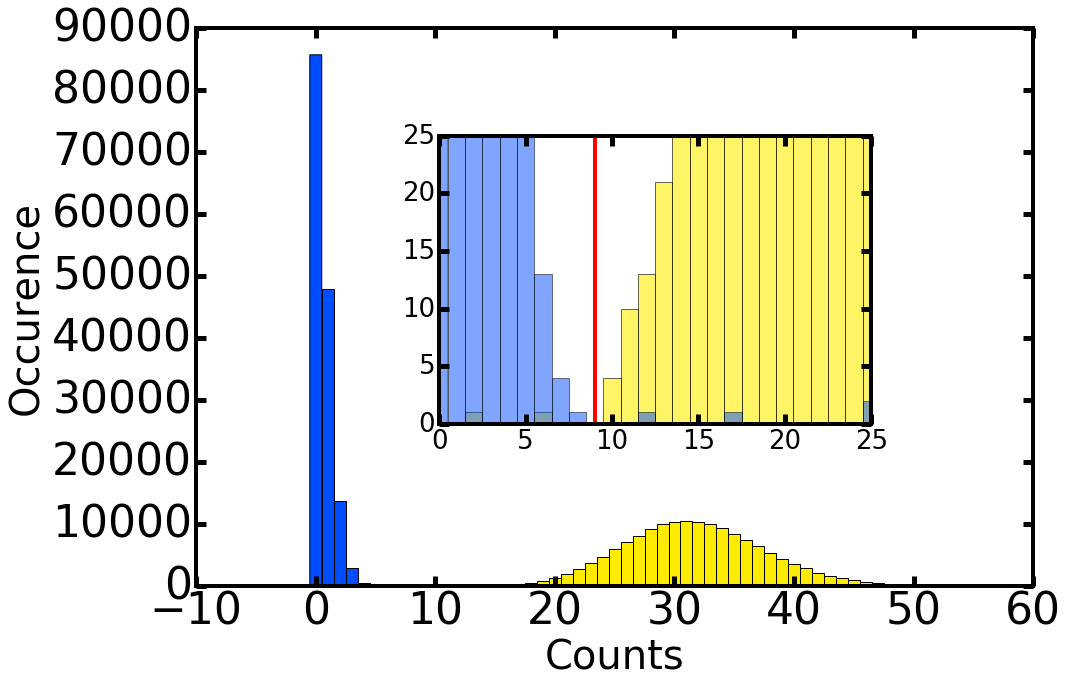

In [32]:
# Read in the data
rcParams['axes.linewidth'] = 4
from scipy.optimize import curve_fit
rcParams["figure.figsize"] = 15, 10
import matplotlib.pyplot as plt

data = np.loadtxt('Z:/Group_Share/Barium/Data/2019.dir/02.dir/2019_02_02.dir/00029 - High_Fid_hist_bright.csv', delimiter = ',')
data1 = np.loadtxt('Z:/Group_Share/Barium/Data/2019.dir/02.dir/2019_02_02.dir/00030 - High_Fid_hist_dark.csv', delimiter = ',')
data2 = np.loadtxt('Z:/Group_Share/Barium/Data/2019.dir/02.dir/2019_02_02.dir/00034 - High_Fid_hist_bright.csv', delimiter = ',')
data3 = np.loadtxt('Z:/Group_Share/Barium/Data/2019.dir/02.dir/2019_02_02.dir/00035 - High_Fid_hist_dark.csv', delimiter = ',')
data4 = np.loadtxt('Z:/Group_Share/Barium/Data/2019.dir/02.dir/2019_02_02.dir/00039 - High_Fid_hist_bright.csv', delimiter = ',')
data5 = np.loadtxt('Z:/Group_Share/Barium/Data/2019.dir/02.dir/2019_02_02.dir/00040 - High_Fid_hist_dark.csv', delimiter = ',')



hist_b = {1: data, 2: data2, 3: data4}
hist_d = {1:data1, 2:data3, 3: data5}

discriminator = 9
dc_threshold = 30

sd_new_b = np.array([])
sd_new_d = np.array([])

for key in hist_b:
    dc_counts = hist_b[key][:,1]
    sd_counts = hist_b[key][:,2]
    
    for i in range(len(sd_counts)):
        if dc_counts[i] > dc_threshold:
            sd_new_b = np.append(sd_new_b, sd_counts[i])
    
    
for key in hist_d:
    dc_counts = hist_d[key][:,1]
    sd_counts = hist_d[key][:,2]

    
    for i in range(len(sd_counts)):
        if dc_counts[i] >= dc_threshold:
            sd_new_d = np.append(sd_new_d, sd_counts[i])
      

    
bright_counts = sd_new_b
dark_counts = sd_new_d

counts = np.concatenate((sd_new_b, sd_new_d), axis = 0)
bright_err = len(np.where(sd_new_b <= discriminator)[0])
dark_err = len(np.where(sd_new_d > discriminator)[0])
tot_err = bright_err + dark_err



print "Number of bright errors: ", bright_err
print "Fractional error :", "{:.6f}".format(float(bright_err)/len(bright_counts))
print "Fidelity :", "{:.5f}".format(1 - float(bright_err)/len(bright_counts)), '+/- ', "{:.1e}".format(np.sqrt(bright_err)/len(bright_counts))
print "Number of exps: ", len(bright_counts), '\n'

print "Number of dark errors: ", dark_err
print "Fractional error :", "{:.6f}".format(float(dark_err)/len(dark_counts))
print "Fidelity :", "{:.6f}".format(1 - float(dark_err)/len(dark_counts)), '+/- ', "{:.1e}".format(np.sqrt(dark_err)/len(dark_counts))
print "Number of exps: ", len(dark_counts), '\n'

print "Number of errors: ", tot_err
print "Fractional error :", "{:.7f}".format(float(tot_err)/len(counts))
print "Fidelity :", "{:.7f}".format(1 - float(tot_err)/len(counts)), '+/- ', "{:.1e}".format(np.sqrt(tot_err)/len(counts))
print "Number of exps: ", len(counts)
bins_bright = int(bright_counts.max())
bins_dark = int(dark_counts.max())
print np.amin(bright_counts)

hist_dat_bright = plt.hist(bright_counts, bins_bright , range = (0,bins_bright), color  = '#FFEB00', alpha = 1, align ='left',edgecolor = 'black')
hist_dat_dark = plt.hist(dark_counts, bins_dark, color = '#004CFF',alpha = 1, align ='left', edgecolor = 'black')



#title(str(t_points[num]) + ' us Shelving Time', fontsize = 46)
plt.xlabel('Counts', fontsize = 40)
plt.ylabel('Occurence', fontsize = 40)
#plt.xlim([-.5, bins_bright])
#ylim([0,10])
plt.plot([discriminator,discriminator], [0,10],color = 'r', linewidth = 4)
plt.tick_params(labelsize = 44)
plt.tick_params(width=5, length=10)


a = plt.axes([.35,.35,.4,.4])
hist_dat_bright = plt.hist(bright_counts, bins_bright, range = (0,bins_bright), color  = '#FFEB00', alpha = .6, align ='left', edgecolor = 'black')
hist_dat_dark = plt.hist(dark_counts, bins_dark, color = '#004CFF', alpha = .5, align ='left', edgecolor = 'black')
plt.plot([discriminator,discriminator], [0,25],color = '#FF0000', linewidth = 4)
plt.xlim([0,25])
plt.ylim([0,25])
plt.tick_params(labelsize = 26)
plt.tick_params(width=5, length=10)

plt.show()

#savefig('High_Fig_hist.png', bbox_inches='tight')
#savefig('High_Fig_hist.pdf', bbox_inches='tight')
#savefig('High_Fig_hist.eps', bbox_inches='tight', format='eps', dpi = 1000)

31.6223184116
0.571744603958
Bright Fit:  31.5800834566 0.0303315963026
Dark Fit:  0.562708410268 0.000769652839577


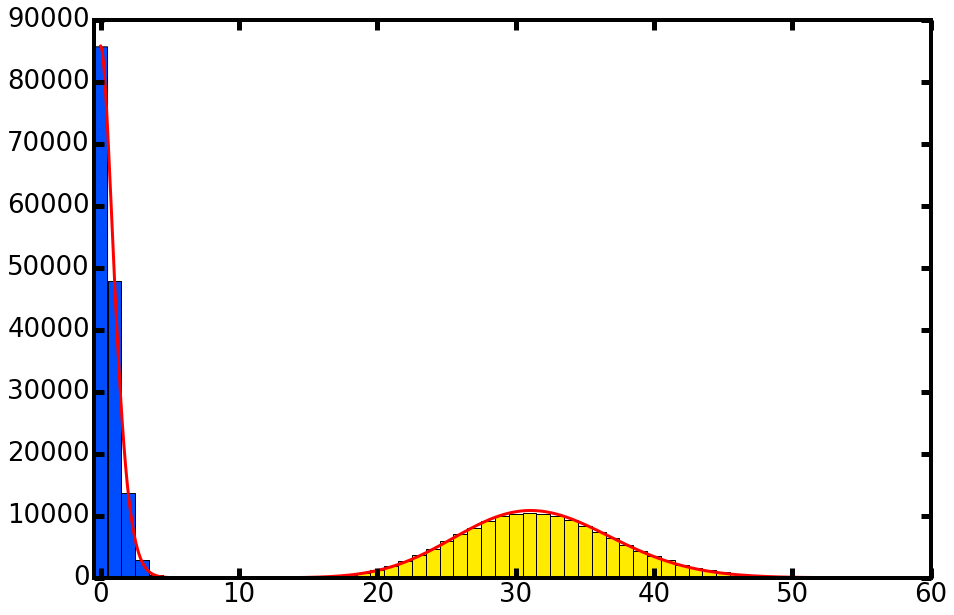

In [107]:
from scipy.optimize import curve_fit
from scipy.special import factorial
# Fit Poisson distributions to both
rcParams['axes.linewidth'] = 4
rcParams["figure.figsize"] = 15, 10

def gauss(x, A, mu, sigma):
    return A*np.exp(-(x-mu)**2/2/sigma**2)

def poiss(x, mu):
        return (np.exp(-mu)*mu**x)/factorial(x)

hist_dat_bright = plt.hist(bright_counts, bins_bright, range = (0, bins_bright), color  = '#FFEB00', alpha = 1, align ='left', edgecolor = 'black')
hist_dat_dark = plt.hist(dark_counts, bins_dark, color = '#004CFF',alpha = 1, align='left', edgecolor = 'black')    



x_bright = hist_dat_bright[1][:-1]  
y_bright = hist_dat_bright[0]/len(bright_counts)

x_dark = hist_dat_dark[1][:-1]
y_dark = hist_dat_dark[0]/len(dark_counts)


x_bright_mean = np.sum(x_bright*hist_dat_bright[0])/np.sum(hist_dat_bright[0])
print x_bright_mean

x_dark_mean = np.sum(x_dark*hist_dat_dark[0])/np.sum(hist_dat_dark[0])
print x_dark_mean

fit_bright, bright_err = curve_fit(poiss,x_bright, y_bright, p0 = [30])
print 'Bright Fit: ', fit_bright[0], np.sqrt(bright_err[0][0])

fit_dark, dark_err = curve_fit(poiss,x_dark, y_dark, p0 = [1])
print 'Dark Fit: ', fit_dark[0], np.sqrt(dark_err[0][0])

x_fit = np.linspace(0,counts.max(),1e3)
y_fit_bright = poiss(x_fit,fit_bright[0])*len(bright_counts)
y_fit_dark = poiss(x_fit,fit_dark[0])*len(dark_counts)


#x_fit = x_fit + .5

plot(x_fit,y_fit_bright,'r', linewidth = 3)
plot(x_fit,y_fit_dark,'r', linewidth = 3)

tick_params(labelsize = 26)
tick_params(width=5, length=10)
xlim([-.5,60])
#ylim([0,100])
show()

#savefig('High_Fig_hist_fit.png', bbox_inches='tight')
#savefig('High_Fig_hist_fit.pdf', bbox_inches='tight')
#savefig('High_Fig_hist_fit.eps', bbox_inches='tight', format='eps', dpi = 1000)


In [110]:
ML = MaximumLikelihood()
ML.detection_time = 1.7e-3
ML.mean_dark = .57
ML.mean_bright = 31.6
ML.number_tbins = 20
ML.state_lifetime = 30.0

# Read in the data
rcParams['axes.linewidth'] = 4
from scipy.optimize import curve_fit
rcParams["figure.figsize"] = 15, 10
import matplotlib.pyplot as plt



tt =  np.loadtxt('Z:/Group_Share/Barium/Data/2019.dir/02.dir/2019_02_02.dir/00031 - High_Fid_Time_Tags_Bright.csv', delimiter = ',')
tt1 = np.loadtxt('Z:/Group_Share/Barium/Data/2019.dir/02.dir/2019_02_02.dir/00032 - High_Fid_Time_Tags_Dark.csv', delimiter = ',')
tt2 = np.loadtxt('Z:/Group_Share/Barium/Data/2019.dir/02.dir/2019_02_02.dir/00036 - High_Fid_Time_Tags_Bright.csv', delimiter = ',')
tt3 = np.loadtxt('Z:/Group_Share/Barium/Data/2019.dir/02.dir/2019_02_02.dir/00037 - High_Fid_Time_Tags_Dark.csv', delimiter = ',')
tt4 = np.loadtxt('Z:/Group_Share/Barium/Data/2019.dir/02.dir/2019_02_02.dir/00041 - High_Fid_Time_Tags_Bright.csv', delimiter = ',')
tt5 = np.loadtxt('Z:/Group_Share/Barium/Data/2019.dir/02.dir/2019_02_02.dir/00042 - High_Fid_Time_Tags_Dark.csv', delimiter = ',')


tt_b = {1: tt, 2: tt2, 3: tt4}
tt_d = {1: tt1, 2: tt3, 3: tt5}

discriminator = 9
dc_threshold = 30



p_bright_arr = np.array([])
p_dark_arr = np.array([])


ML.t_start = .003116
ML.t_stop = .004816

for key in hist_b:
    dc_counts = hist_b[key][:,1]
    sd_counts = hist_b[key][:,2]
    all_tags = tt_b[key][:,1]
    
    
    
    for i in range(len(sd_counts)):
        current_tags = all_tags[:sd_counts[i]]
        all_tags = np.delete(all_tags, np.arange(sd_counts[i]))
        if dc_counts[i] > dc_threshold:
            bins, counts = ML.bin_time_tags(current_tags)
            p_dark_r = ML.prob_dark_recursive(counts)
            p_bright = ML.prob_bright(counts)
            p_bright_arr = np.append(p_bright_arr, p_bright)
            p_dark_arr = np.append(p_dark_arr, p_dark_r)            

ratio = p_bright_arr/p_dark_arr
dark_ml = np.where(ratio < 1)
print dark_ml

bright_err =  len(dark_ml[0])
bright_counts = len(p_bright_arr)

fid_bright = 1 - float(bright_err)/bright_counts
    
    
print "Number of bright errors: ", bright_err
print "Fractional error :", "{:.5f}".format(float(bright_err)/bright_counts)
print "Fidelity :", "{:.5f}".format(fid_bright), '+/- ', "{:.1e}".format(np.sqrt(bright_err)/bright_counts)
print "Number of exps: ", bright_counts, '\n'    
 
 

ML.t_start = .003416
ML.t_stop = .005116 
p_bright_arr = np.array([])
p_dark_arr = np.array([])
    
for key in hist_d:
    dc_counts = hist_d[key][:,1]
    sd_counts = hist_d[key][:,2]
    all_tags = tt_d[key][:,1]
    print len(all_tags), np.sum(sd_counts)
    
    
    for i in range(len(sd_counts)):
        current_tags = all_tags[:sd_counts[i]]
        all_tags = np.delete(all_tags, np.arange(sd_counts[i]))
        if dc_counts[i] > dc_threshold:
            bins, counts = ML.bin_time_tags(current_tags)
            p_dark_r = ML.prob_dark_recursive(counts)
            p_bright = ML.prob_bright(counts)
            p_bright_arr = np.append(p_bright_arr, p_bright)
            p_dark_arr = np.append(p_dark_arr, p_dark_r)            

            
ratio = p_bright_arr/p_dark_arr
bright_ml = np.where(ratio > 1)
print bright_ml

dark_err =  len(bright_ml[0])
dark_counts = len(p_bright_arr)

fid_dark = 1 - float(dark_err)/dark_counts           
            
print "Number of dark errors: ", dark_err
print "Fractional error :", "{:.5f}".format(float(dark_err)/dark_counts)
print "Fidelity :", "{:.5f}".format(1 - float(dark_err)/dark_counts), '+/- ', "{:.1e}".format(np.sqrt(dark_err)/dark_counts)
print "Number of exps: ", dark_counts, '\n'
            

'''
bright_counts = sd_new_b
dark_counts = sd_new_d

counts = np.concatenate((sd_new_b, sd_new_d), axis = 0)
bright_err = len(np.where(sd_new_b <= discriminator)[0])
dark_err = len(np.where(sd_new_d > discriminator)[0])
tot_err = bright_err + dark_err



print "Number of bright errors: ", bright_err
print "Fractional error :", "{:.5f}".format(float(bright_err)/len(bright_counts))
print "Fidelity :", "{:.5f}".format(1 - float(bright_err)/len(bright_counts)), '+/- ', "{:.1e}".format(np.sqrt(bright_err)/len(bright_counts))
print "Number of exps: ", len(bright_counts), '\n'

print "Number of dark errors: ", dark_err
print "Fractional error :", "{:.5f}".format(float(dark_err)/len(dark_counts))
print "Fidelity :", "{:.5f}".format(1 - float(dark_err)/len(dark_counts)), '+/- ', "{:.1e}".format(np.sqrt(dark_err)/len(dark_counts))
print "Number of exps: ", len(dark_counts), '\n'

print "Number of errors: ", tot_err
print "Fractional error :", "{:.5f}".format(float(tot_err)/len(counts))
print "Fidelity :", "{:.5f}".format(1 - float(tot_err)/len(counts)), '+/- ', "{:.1e}".format(np.sqrt(tot_err)/len(counts))
print "Number of exps: ", len(counts)
bins_bright = int(bright_counts.max())
bins_dark = int(dark_counts.max())
print np.amin(bright_counts)

hist_dat_bright = plt.hist(bright_counts, bins_bright , range = (0,bins_bright), color  = '#FFEB00', alpha = 1, align ='left',edgecolor = 'black')
hist_dat_dark = plt.hist(dark_counts, bins_dark, color = '#004CFF',alpha = 1, align ='left', edgecolor = 'black')



#title(str(t_points[num]) + ' us Shelving Time', fontsize = 46)
plt.xlabel('Counts', fontsize = 40)
plt.ylabel('Occurence', fontsize = 40)
#plt.xlim([-.5, bins_bright])
#ylim([0,10])
plt.plot([discriminator,discriminator], [0,10],color = 'r', linewidth = 4)
plt.tick_params(labelsize = 44)
plt.tick_params(width=5, length=10)


a = plt.axes([.35,.35,.4,.4])
hist_dat_bright1 = plt.hist(bright_counts, bins_bright, range = (0,bins_bright), color  = '#FFEB00', alpha = .6, align ='left', edgecolor = 'black')
hist_dat_dark1 = plt.hist(dark_counts, bins_dark, color = '#004CFF', alpha = .5, align ='left', edgecolor = 'black')
plt.plot([discriminator,discriminator], [0,25],color = '#FF0000', linewidth = 4)
plt.xlim([0,25])
plt.ylim([0,25])
plt.tick_params(labelsize = 26)
plt.tick_params(width=5, length=10)

plt.show()

#savefig('High_Fig_hist.png', bbox_inches='tight')
#savefig('High_Fig_hist.pdf', bbox_inches='tight')
#savefig('High_Fig_hist.eps', bbox_inches='tight', format='eps', dpi = 1000)
'''

    
    

C:\Users\barium133\Code\Anaconda\Lib\site-packages\ipykernel\__main__.py:47: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


(array([ 76015, 143536], dtype=int64),)
Number of bright errors:  2
Fractional error : 0.00001
Fidelity : 0.99999 +/-  9.3e-06
Number of exps:  152708 

25196 25196.0


C:\Users\barium133\Code\Anaconda\Lib\site-packages\ipykernel\__main__.py:86: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


27483 27483.0
42383 42383.0
(array([50272, 82669], dtype=int64),)
Number of dark errors:  2
Fractional error : 0.00001
Fidelity : 0.99999 +/-  9.6e-06
Number of exps:  147000 



'\nbright_counts = sd_new_b\ndark_counts = sd_new_d\n\ncounts = np.concatenate((sd_new_b, sd_new_d), axis = 0)\nbright_err = len(np.where(sd_new_b <= discriminator)[0])\ndark_err = len(np.where(sd_new_d > discriminator)[0])\ntot_err = bright_err + dark_err\n\n\n\nprint "Number of bright errors: ", bright_err\nprint "Fractional error :", "{:.5f}".format(float(bright_err)/len(bright_counts))\nprint "Fidelity :", "{:.5f}".format(1 - float(bright_err)/len(bright_counts)), \'+/- \', "{:.1e}".format(np.sqrt(bright_err)/len(bright_counts))\nprint "Number of exps: ", len(bright_counts), \'\n\'\n\nprint "Number of dark errors: ", dark_err\nprint "Fractional error :", "{:.5f}".format(float(dark_err)/len(dark_counts))\nprint "Fidelity :", "{:.5f}".format(1 - float(dark_err)/len(dark_counts)), \'+/- \', "{:.1e}".format(np.sqrt(dark_err)/len(dark_counts))\nprint "Number of exps: ", len(dark_counts), \'\n\'\n\nprint "Number of errors: ", tot_err\nprint "Fractional error :", "{:.5f}".format(float(tot

More data

Number of bright errors:  2
Fractional error : 0.000013
Fidelity : 0.99999 +/-  9.2e-06
Number of exps:  152900 

Number of dark errors:  7
Fractional error : 0.000048
Fidelity : 0.999952 +/-  1.8e-05
Number of exps:  147049 

Number of errors:  9
Fractional error : 0.000030
Fidelity : 0.999970 +/-  1.0e-05
Number of exps:  299949
1.0


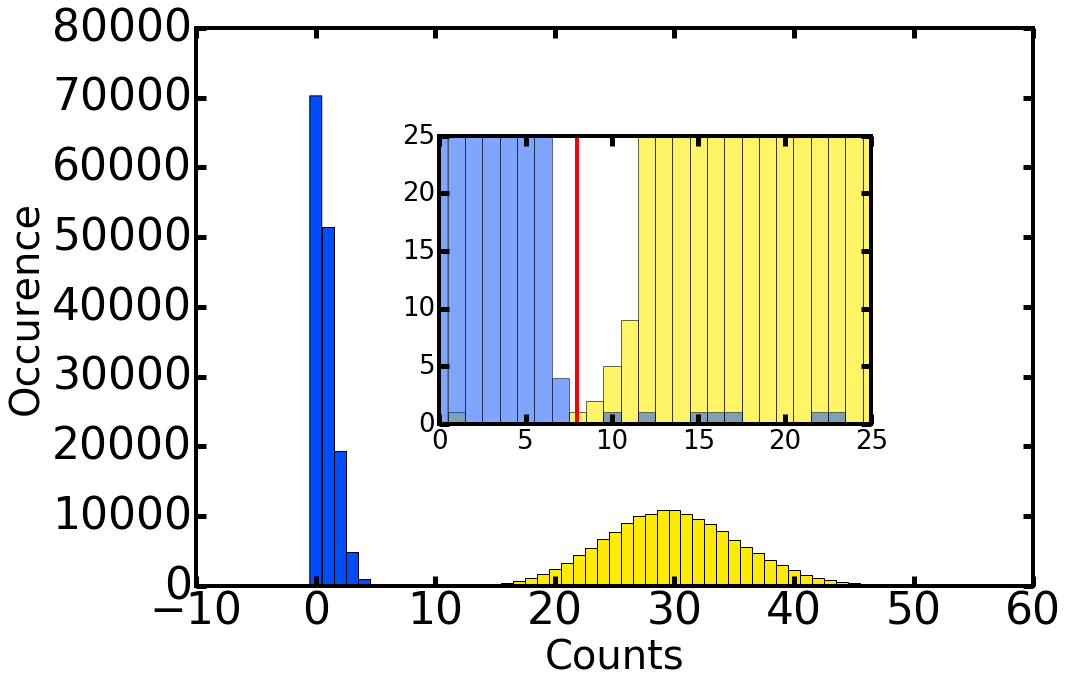

In [121]:
# Read in the data
rcParams['axes.linewidth'] = 4
from scipy.optimize import curve_fit
rcParams["figure.figsize"] = 15, 10
import matplotlib.pyplot as plt

data = np.loadtxt('Z:/Group_Share/Barium/Data/2019.dir/02.dir/2019_02_06.dir/00052 - High_Fid_hist_bright.csv', delimiter = ',')
data1 = np.loadtxt('Z:/Group_Share/Barium/Data/2019.dir/02.dir/2019_02_06.dir/00053 - High_Fid_hist_dark.csv', delimiter = ',')
data2 = np.loadtxt('Z:/Group_Share/Barium/Data/2019.dir/02.dir/2019_02_06.dir/00062 - High_Fid_hist_bright.csv', delimiter = ',')
data3 = np.loadtxt('Z:/Group_Share/Barium/Data/2019.dir/02.dir/2019_02_06.dir/00063 - High_Fid_hist_dark.csv', delimiter = ',')
data4 = np.loadtxt('Z:/Group_Share/Barium/Data/2019.dir/02.dir/2019_02_06.dir/00072 - High_Fid_hist_bright.csv', delimiter = ',')
data5 = np.loadtxt('Z:/Group_Share/Barium/Data/2019.dir/02.dir/2019_02_06.dir/00073 - High_Fid_hist_dark.csv', delimiter = ',')



hist_b = {1: data, 2: data2, 3: data4}
hist_d = {1:data1, 2:data3, 3: data5}

discriminator = 8
dc_threshold = 19

sd_new_b = np.array([])
sd_new_d = np.array([])

for key in hist_b:
    dc_counts = hist_b[key][:,1]
    sd_counts = hist_b[key][:,2]
    
    
    for i in range(len(sd_counts)):
        if dc_counts[i] > dc_threshold:
            sd_new_b = np.append(sd_new_b, sd_counts[i])

    
for key in hist_d:
    dc_counts = hist_d[key][:,1]
    sd_counts = hist_d[key][:,2]

    
    for i in range(len(sd_counts)):
        if dc_counts[i] >= dc_threshold:
            sd_new_d = np.append(sd_new_d, sd_counts[i])
      

    
bright_counts = sd_new_b
dark_counts = sd_new_d

counts = np.concatenate((sd_new_b, sd_new_d), axis = 0)
bright_err = len(np.where(sd_new_b <= discriminator)[0])
dark_err = len(np.where(sd_new_d > discriminator)[0])
tot_err = bright_err + dark_err



print "Number of bright errors: ", bright_err
print "Fractional error :", "{:.6f}".format(float(bright_err)/len(bright_counts))
print "Fidelity :", "{:.5f}".format(1 - float(bright_err)/len(bright_counts)), '+/- ', "{:.1e}".format(np.sqrt(bright_err)/len(bright_counts))
print "Number of exps: ", len(bright_counts), '\n'

print "Number of dark errors: ", dark_err
print "Fractional error :", "{:.6f}".format(float(dark_err)/len(dark_counts))
print "Fidelity :", "{:.6f}".format(1 - float(dark_err)/len(dark_counts)), '+/- ', "{:.1e}".format(np.sqrt(dark_err)/len(dark_counts))
print "Number of exps: ", len(dark_counts), '\n'

print "Number of errors: ", tot_err
print "Fractional error :", "{:.6f}".format(float(tot_err)/len(counts))
print "Fidelity :", "{:.6f}".format(1 - float(tot_err)/len(counts)), '+/- ', "{:.1e}".format(np.sqrt(tot_err)/len(counts))
print "Number of exps: ", len(counts)
bins_bright = int(bright_counts.max())
bins_dark = int(dark_counts.max())
print np.amin(bright_counts)

hist_dat_bright = plt.hist(bright_counts, bins_bright , range = (0,bins_bright), color  = '#FFEB00', alpha = 1, align ='left',edgecolor = 'black')
hist_dat_dark = plt.hist(dark_counts, bins_dark, color = '#004CFF',alpha = 1, align ='left', edgecolor = 'black')



#title(str(t_points[num]) + ' us Shelving Time', fontsize = 46)
plt.xlabel('Counts', fontsize = 40)
plt.ylabel('Occurence', fontsize = 40)
#plt.xlim([-.5, bins_bright])
#ylim([0,10])
plt.plot([discriminator,discriminator], [0,10],color = 'r', linewidth = 4)
plt.tick_params(labelsize = 44)
plt.tick_params(width=5, length=10)


a = plt.axes([.35,.35,.4,.4])
hist_dat_bright = plt.hist(bright_counts, bins_bright, range = (0,bins_bright), color  = '#FFEB00', alpha = .6, align ='left', edgecolor = 'black')
hist_dat_dark = plt.hist(dark_counts, bins_dark, color = '#004CFF', alpha = .5, align ='left', edgecolor = 'black')
plt.plot([discriminator,discriminator], [0,25],color = '#FF0000', linewidth = 4)
plt.xlim([0,25])
plt.ylim([0,25])
plt.tick_params(labelsize = 26)
plt.tick_params(width=5, length=10)

plt.show()

#savefig('High_Fig_hist.png', bbox_inches='tight')
#savefig('High_Fig_hist.pdf', bbox_inches='tight')
#savefig('High_Fig_hist.eps', bbox_inches='tight', format='eps', dpi = 1000)

29.8634205363
0.74598263164
Bright Fit:  29.861566721 0.0364615287778
Dark Fit:  0.738591003371 0.00124242764325


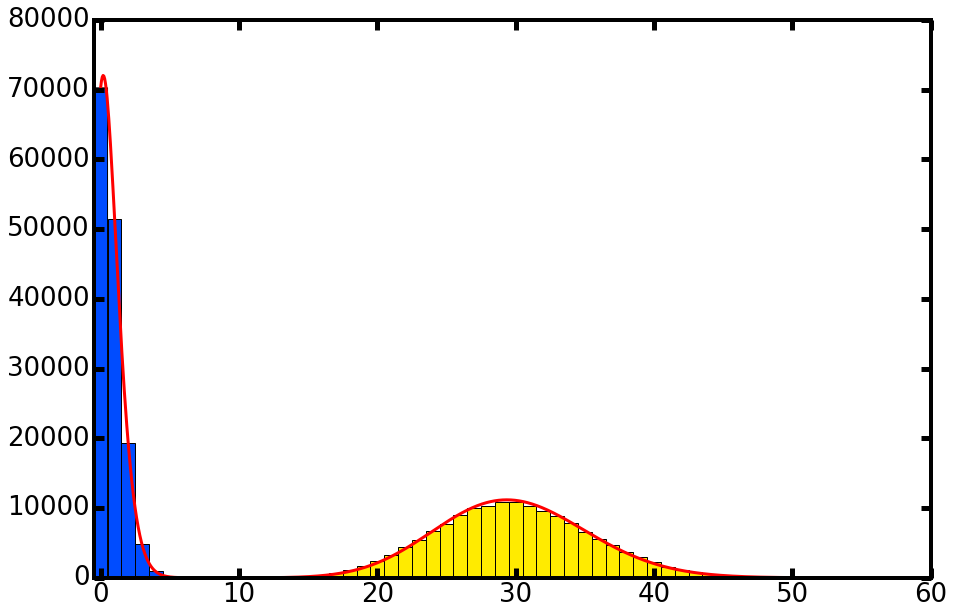

In [122]:
from scipy.optimize import curve_fit
from scipy.special import factorial
# Fit Poisson distributions to both
rcParams['axes.linewidth'] = 4
rcParams["figure.figsize"] = 15, 10

def gauss(x, A, mu, sigma):
    return A*np.exp(-(x-mu)**2/2/sigma**2)

def poiss(x, mu):
        return (np.exp(-mu)*mu**x)/factorial(x)

hist_dat_bright = plt.hist(bright_counts, bins_bright, range = (0, bins_bright), color  = '#FFEB00', alpha = 1, align ='left', edgecolor = 'black')
hist_dat_dark = plt.hist(dark_counts, bins_dark, color = '#004CFF',alpha = 1, align='left', edgecolor = 'black')    



x_bright = hist_dat_bright[1][:-1]  
y_bright = hist_dat_bright[0]/len(bright_counts)

x_dark = hist_dat_dark[1][:-1]
y_dark = hist_dat_dark[0]/len(dark_counts)


x_bright_mean = np.sum(x_bright*hist_dat_bright[0])/np.sum(hist_dat_bright[0])
print x_bright_mean

x_dark_mean = np.sum(x_dark*hist_dat_dark[0])/np.sum(hist_dat_dark[0])
print x_dark_mean

fit_bright, bright_err = curve_fit(poiss,x_bright, y_bright, p0 = [30])
print 'Bright Fit: ', fit_bright[0], np.sqrt(bright_err[0][0])

fit_dark, dark_err = curve_fit(poiss,x_dark, y_dark, p0 = [1])
print 'Dark Fit: ', fit_dark[0], np.sqrt(dark_err[0][0])

x_fit = np.linspace(0,counts.max(),1e3)
y_fit_bright = poiss(x_fit,fit_bright[0])*len(bright_counts)
y_fit_dark = poiss(x_fit,fit_dark[0])*len(dark_counts)


#x_fit = x_fit + .5

plot(x_fit,y_fit_bright,'r', linewidth = 3)
plot(x_fit,y_fit_dark,'r', linewidth = 3)

tick_params(labelsize = 26)
tick_params(width=5, length=10)
xlim([-.5,60])
#ylim([0,100])
show()

#savefig('High_Fig_hist_fit.png', bbox_inches='tight')
#savefig('High_Fig_hist_fit.pdf', bbox_inches='tight')
#savefig('High_Fig_hist_fit.eps', bbox_inches='tight', format='eps', dpi = 1000)


In [125]:
ML = MaximumLikelihood()
ML.detection_time = 1.7e-3
ML.mean_dark = .75
ML.mean_bright = 29.9
ML.number_tbins = 20
ML.state_lifetime = 50.0

# Read in the data
rcParams['axes.linewidth'] = 4
from scipy.optimize import curve_fit
rcParams["figure.figsize"] = 15, 10
import matplotlib.pyplot as plt



tt =  np.loadtxt('Z:/Group_Share/Barium/Data/2019.dir/02.dir/2019_02_06.dir/00054 - High_Fid_Time_Tags_Bright.csv', delimiter = ',')
tt1 = np.loadtxt('Z:/Group_Share/Barium/Data/2019.dir/02.dir/2019_02_06.dir/00055 - High_Fid_Time_Tags_Dark.csv', delimiter = ',')
tt2 = np.loadtxt('Z:/Group_Share/Barium/Data/2019.dir/02.dir/2019_02_06.dir/00064 - High_Fid_Time_Tags_Bright.csv', delimiter = ',')
tt3 = np.loadtxt('Z:/Group_Share/Barium/Data/2019.dir/02.dir/2019_02_06.dir/00065 - High_Fid_Time_Tags_Dark.csv', delimiter = ',')
tt4 = np.loadtxt('Z:/Group_Share/Barium/Data/2019.dir/02.dir/2019_02_06.dir/00074 - High_Fid_Time_Tags_Bright.csv', delimiter = ',')
tt5 = np.loadtxt('Z:/Group_Share/Barium/Data/2019.dir/02.dir/2019_02_06.dir/00075 - High_Fid_Time_Tags_Dark.csv', delimiter = ',')


tt_b = {1: tt, 2: tt2, 3: tt4}
tt_d = {1: tt1, 2: tt3, 3: tt5}

discriminator = 8
dc_threshold = 19



p_bright_arr = np.array([])
p_dark_arr = np.array([])


ML.t_start = .003116
ML.t_stop = .004816

for key in hist_b:
    dc_counts = hist_b[key][:,1]
    sd_counts = hist_b[key][:,2]
    all_tags = tt_b[key][:,1]
    
    
    
    for i in range(len(sd_counts)):
        current_tags = all_tags[:sd_counts[i]]
        all_tags = np.delete(all_tags, np.arange(sd_counts[i]))
        if dc_counts[i] > dc_threshold:
            bins, counts = ML.bin_time_tags(current_tags)
            p_dark_r = ML.prob_dark_recursive(counts)
            p_bright = ML.prob_bright(counts)
            p_bright_arr = np.append(p_bright_arr, p_bright)
            p_dark_arr = np.append(p_dark_arr, p_dark_r)            

ratio = p_bright_arr/p_dark_arr
dark_ml = np.where(ratio < 1)
print dark_ml

bright_err =  len(dark_ml[0])
bright_counts = len(p_bright_arr)

fid_bright = 1 - float(bright_err)/bright_counts
    
    
print "Number of bright errors: ", bright_err
print "Fractional error :", "{:.5f}".format(float(bright_err)/bright_counts)
print "Fidelity :", "{:.5f}".format(fid_bright), '+/- ', "{:.1e}".format(np.sqrt(bright_err)/bright_counts)
print "Number of exps: ", bright_counts, '\n'    
 
 

ML.t_start = .003416
ML.t_stop = .005116 
p_bright_arr = np.array([])
p_dark_arr = np.array([])
    
for key in hist_d:
    dc_counts = hist_d[key][:,1]
    sd_counts = hist_d[key][:,2]
    all_tags = tt_d[key][:,1]
    print len(all_tags), np.sum(sd_counts)
    
    
    for i in range(len(sd_counts)):
        current_tags = all_tags[:sd_counts[i]]
        all_tags = np.delete(all_tags, np.arange(sd_counts[i]))
        if dc_counts[i] > dc_threshold:
            bins, counts = ML.bin_time_tags(current_tags)
            p_dark_r = ML.prob_dark_recursive(counts)
            p_bright = ML.prob_bright(counts)
            p_bright_arr = np.append(p_bright_arr, p_bright)
            p_dark_arr = np.append(p_dark_arr, p_dark_r)            

            
ratio = p_bright_arr/p_dark_arr
bright_ml = np.where(ratio > 1)
print bright_ml

dark_err =  len(bright_ml[0])
dark_counts = len(p_bright_arr)

fid_dark = 1 - float(dark_err)/dark_counts           
            
print "Number of dark errors: ", dark_err
print "Fractional error :", "{:.5f}".format(float(dark_err)/dark_counts)
print "Fidelity :", "{:.5f}".format(1 - float(dark_err)/dark_counts), '+/- ', "{:.1e}".format(np.sqrt(dark_err)/dark_counts)
print "Number of exps: ", dark_counts, '\n'
            

'''
bright_counts = sd_new_b
dark_counts = sd_new_d

counts = np.concatenate((sd_new_b, sd_new_d), axis = 0)
bright_err = len(np.where(sd_new_b <= discriminator)[0])
dark_err = len(np.where(sd_new_d > discriminator)[0])
tot_err = bright_err + dark_err



print "Number of bright errors: ", bright_err
print "Fractional error :", "{:.5f}".format(float(bright_err)/len(bright_counts))
print "Fidelity :", "{:.5f}".format(1 - float(bright_err)/len(bright_counts)), '+/- ', "{:.1e}".format(np.sqrt(bright_err)/len(bright_counts))
print "Number of exps: ", len(bright_counts), '\n'

print "Number of dark errors: ", dark_err
print "Fractional error :", "{:.5f}".format(float(dark_err)/len(dark_counts))
print "Fidelity :", "{:.5f}".format(1 - float(dark_err)/len(dark_counts)), '+/- ', "{:.1e}".format(np.sqrt(dark_err)/len(dark_counts))
print "Number of exps: ", len(dark_counts), '\n'

print "Number of errors: ", tot_err
print "Fractional error :", "{:.5f}".format(float(tot_err)/len(counts))
print "Fidelity :", "{:.5f}".format(1 - float(tot_err)/len(counts)), '+/- ', "{:.1e}".format(np.sqrt(tot_err)/len(counts))
print "Number of exps: ", len(counts)
bins_bright = int(bright_counts.max())
bins_dark = int(dark_counts.max())
print np.amin(bright_counts)

hist_dat_bright = plt.hist(bright_counts, bins_bright , range = (0,bins_bright), color  = '#FFEB00', alpha = 1, align ='left',edgecolor = 'black')
hist_dat_dark = plt.hist(dark_counts, bins_dark, color = '#004CFF',alpha = 1, align ='left', edgecolor = 'black')



#title(str(t_points[num]) + ' us Shelving Time', fontsize = 46)
plt.xlabel('Counts', fontsize = 40)
plt.ylabel('Occurence', fontsize = 40)
#plt.xlim([-.5, bins_bright])
#ylim([0,10])
plt.plot([discriminator,discriminator], [0,10],color = 'r', linewidth = 4)
plt.tick_params(labelsize = 44)
plt.tick_params(width=5, length=10)


a = plt.axes([.35,.35,.4,.4])
hist_dat_bright1 = plt.hist(bright_counts, bins_bright, range = (0,bins_bright), color  = '#FFEB00', alpha = .6, align ='left', edgecolor = 'black')
hist_dat_dark1 = plt.hist(dark_counts, bins_dark, color = '#004CFF', alpha = .5, align ='left', edgecolor = 'black')
plt.plot([discriminator,discriminator], [0,25],color = '#FF0000', linewidth = 4)
plt.xlim([0,25])
plt.ylim([0,25])
plt.tick_params(labelsize = 26)
plt.tick_params(width=5, length=10)

plt.show()

#savefig('High_Fig_hist.png', bbox_inches='tight')
#savefig('High_Fig_hist.pdf', bbox_inches='tight')
#savefig('High_Fig_hist.eps', bbox_inches='tight', format='eps', dpi = 1000)
'''

    
    

C:\Users\barium133\Code\Anaconda\Lib\site-packages\ipykernel\__main__.py:47: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


(array([92642], dtype=int64),)
Number of bright errors:  1
Fractional error : 0.00001
Fidelity : 0.99999 +/-  6.5e-06
Number of exps:  152900 

27997 27997.0


C:\Users\barium133\Code\Anaconda\Lib\site-packages\ipykernel\__main__.py:86: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


62316 62316.0
26998 26998.0
(array([  2514, 121285, 125784, 128342], dtype=int64),)
Number of dark errors:  4
Fractional error : 0.00003
Fidelity : 0.99997 +/-  1.4e-05
Number of exps:  145528 



'\nbright_counts = sd_new_b\ndark_counts = sd_new_d\n\ncounts = np.concatenate((sd_new_b, sd_new_d), axis = 0)\nbright_err = len(np.where(sd_new_b <= discriminator)[0])\ndark_err = len(np.where(sd_new_d > discriminator)[0])\ntot_err = bright_err + dark_err\n\n\n\nprint "Number of bright errors: ", bright_err\nprint "Fractional error :", "{:.5f}".format(float(bright_err)/len(bright_counts))\nprint "Fidelity :", "{:.5f}".format(1 - float(bright_err)/len(bright_counts)), \'+/- \', "{:.1e}".format(np.sqrt(bright_err)/len(bright_counts))\nprint "Number of exps: ", len(bright_counts), \'\n\'\n\nprint "Number of dark errors: ", dark_err\nprint "Fractional error :", "{:.5f}".format(float(dark_err)/len(dark_counts))\nprint "Fidelity :", "{:.5f}".format(1 - float(dark_err)/len(dark_counts)), \'+/- \', "{:.1e}".format(np.sqrt(dark_err)/len(dark_counts))\nprint "Number of exps: ", len(dark_counts), \'\n\'\n\nprint "Number of errors: ", tot_err\nprint "Fractional error :", "{:.5f}".format(float(tot

### 2/22/19 Data with 614nm Laser

300k experiments to see where we're at

In [ ]:
# Read in the data
rcParams['axes.linewidth'] = 4
from scipy.optimize import curve_fit
rcParams["figure.figsize"] = 15, 10
import matplotlib.pyplot as plt

data = np.loadtxt('Z:/Group_Share/Barium/Data/2019.dir/02.dir/2019_02_22.dir/00052 - High_Fid_hist_bright.csv', delimiter = ',')
data1 = np.loadtxt('Z:/Group_Share/Barium/Data/2019.dir/02.dir/2019_02_22.dir/00053 - High_Fid_hist_dark.csv', delimiter = ',')




hist_b = {1: data}
hist_d = {1:data1}

discriminator = 12
dc_threshold = 17

sd_new_b = np.array([])
sd_new_d = np.array([])

for key in hist_b:
    dc_counts = hist_b[key][:,1]
    sd_counts = hist_b[key][:,2]
    
    
    for i in range(len(sd_counts)):
        if dc_counts[i] > dc_threshold:
            sd_new_b = np.append(sd_new_b, sd_counts[i])

    
for key in hist_d:
    dc_counts = hist_d[key][:,1]
    sd_counts = hist_d[key][:,2]

    
    for i in range(len(sd_counts)):
        if dc_counts[i] >= dc_threshold:
            sd_new_d = np.append(sd_new_d, sd_counts[i])
      

    
bright_counts = sd_new_b
dark_counts = sd_new_d

counts = np.concatenate((sd_new_b, sd_new_d), axis = 0)
bright_err = len(np.where(sd_new_b <= discriminator)[0])
dark_err = len(np.where(sd_new_d > discriminator)[0])
tot_err = bright_err + dark_err
avg_spam = .5*(float(bright_err)/len(bright_counts) + float(dark_err)/len(dark_counts))
unc_bright = np.sqrt(bright_err)/len(bright_counts)
unc_dark = np.sqrt(dark_err)/len(dark_counts)

unc = np.sqrt(unc_bright**2 + unc_dark**2)

print "Number of bright errors: ", bright_err
print "Fractional error :", "{:.6f}".format(float(bright_err)/len(bright_counts))
print "Fidelity :", "{:.5f}".format(1 - float(bright_err)/len(bright_counts)), '+/- ', "{:.1e}".format(np.sqrt(bright_err)/len(bright_counts))
print "Number of exps: ", len(bright_counts), '\n'

print "Number of dark errors: ", dark_err
print "Fractional error :", "{:.6f}".format(float(dark_err)/len(dark_counts))
print "Fidelity :", "{:.6f}".format(1 - float(dark_err)/len(dark_counts)), '+/- ', "{:.1e}".format(np.sqrt(dark_err)/len(dark_counts))
print "Number of exps: ", len(dark_counts), '\n'

print "Number of errors: ", tot_err
print "Fractional error :", "{:.6f}".format(1 - avg_spam)
print "Fidelity :", "{:.6f}".format(avg_spam), '+/- ', "{:.1e}".format(unc)
print "Number of exps: ", len(counts)
bins_bright = int(bright_counts.max())
bins_dark = int(dark_counts.max())
print np.amin(bright_counts)

hist_dat_bright = plt.hist(bright_counts, bins_bright , range = (0,bins_bright), color  = '#FFEB00', alpha = 1, align ='left',edgecolor = 'black')
hist_dat_dark = plt.hist(dark_counts, bins_dark, color = '#004CFF',alpha = 1, align ='left', edgecolor = 'black')



#title(str(t_points[num]) + ' us Shelving Time', fontsize = 46)
plt.xlabel('Counts', fontsize = 40)
plt.ylabel('Occurence', fontsize = 40)
#plt.xlim([-.5, bins_bright])
#ylim([0,10])
plt.plot([discriminator,discriminator], [0,10],color = 'r', linewidth = 4)
plt.tick_params(labelsize = 44)
plt.tick_params(width=5, length=10)


a = plt.axes([.35,.35,.4,.4])
hist_dat_bright = plt.hist(bright_counts, bins_bright, range = (0,bins_bright), color  = '#FFEB00', alpha = .6, align ='left', edgecolor = 'black')
hist_dat_dark = plt.hist(dark_counts, bins_dark, color = '#004CFF', alpha = .5, align ='left', edgecolor = 'black')
plt.plot([discriminator,discriminator], [0,25],color = '#FF0000', linewidth = 4)
plt.xlim([0,25])
plt.ylim([0,25])
plt.tick_params(labelsize = 26)
plt.tick_params(width=5, length=10)

plt.show()

#savefig('High_Fig_hist.png', bbox_inches='tight')
#savefig('High_Fig_hist.pdf', bbox_inches='tight')
#savefig('High_Fig_hist.eps', bbox_inches='tight', format='eps', dpi = 1000)

In [ ]:
### For plotting
hist_dat_bright = plt.hist(bright_counts, bins_bright , range = (0,bins_bright), color  = '#FFEB00', alpha = .6, align ='left',edgecolor = 'black',log=True)
hist_dat_dark = plt.hist(dark_counts, bins_dark, color = '#004CFF',alpha = .4, align ='left', edgecolor = 'black', log=True)



#title(str(t_points[num]) + ' us Shelving Time', fontsize = 46)
plt.xlabel('Photon Number', fontsize = 40)
plt.ylabel('Occurence', fontsize = 40)
plt.xlim([-.5, bins_bright])
#ylim([0,10])
plt.plot([discriminator,discriminator], [0,10],color = 'r', linewidth = 4)
plt.tick_params(labelsize = 44)
plt.tick_params(width=5, length=10)


a = plt.axes([.68,.66,.21,.21])
hist_dat_bright = plt.hist(bright_counts, bins_bright, range = (0,bins_bright), color  = '#FFEB00', alpha = .6, align ='left', edgecolor = 'black')
hist_dat_dark = plt.hist(dark_counts, bins_dark, color = '#004CFF', alpha = .5, align ='left', edgecolor = 'black')
plt.plot([discriminator,discriminator], [0,25],color = '#FF0000', linewidth = 4)
plt.xlim([-1,60])
#plt.ylim([0,25])
plt.xlabel('Photon Number', fontsize = 18)
plt.ylabel(r'Counts $ \times \ 10^{-4}$ ', fontsize = 18)
plt.yticks(np.array([0, 10000, 20000, 30000, 40000, 50000]), ('0', '1', '2', '3', '4', '5'))
plt.tick_params(labelsize = 18)
plt.tick_params(width=5, length=10)


39.3459832397
0.598637351063
Bright Fit:  39.308511546 0.0537069658721
Dark Fit:  0.590655196976 0.000730799820749


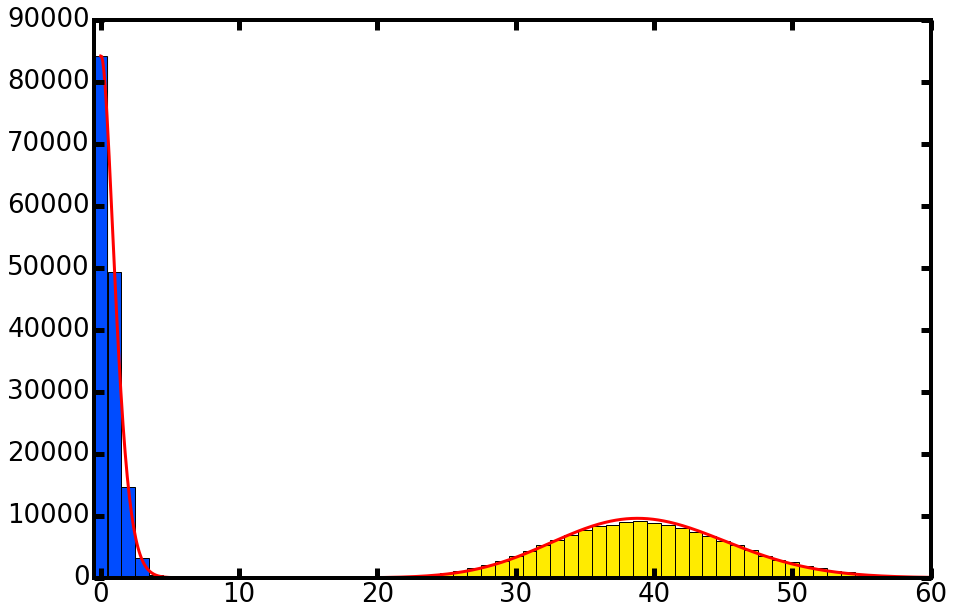

In [156]:
from scipy.optimize import curve_fit
from scipy.special import factorial
# Fit Poisson distributions to both
rcParams['axes.linewidth'] = 4
rcParams["figure.figsize"] = 15, 10

def gauss(x, A, mu, sigma):
    return A*np.exp(-(x-mu)**2/2/sigma**2)

def poiss(x, mu):
        return (np.exp(-mu)*mu**x)/factorial(x)

hist_dat_bright = plt.hist(bright_counts, bins_bright, range = (0, bins_bright), color  = '#FFEB00', alpha = 1, align ='left', edgecolor = 'black')
hist_dat_dark = plt.hist(dark_counts, bins_dark, color = '#004CFF',alpha = 1, align='left', edgecolor = 'black')    



x_bright = hist_dat_bright[1][:-1]  
y_bright = hist_dat_bright[0]/len(bright_counts)

x_dark = hist_dat_dark[1][:-1]
y_dark = hist_dat_dark[0]/len(dark_counts)


x_bright_mean = np.sum(x_bright*hist_dat_bright[0])/np.sum(hist_dat_bright[0])
print x_bright_mean

x_dark_mean = np.sum(x_dark*hist_dat_dark[0])/np.sum(hist_dat_dark[0])
print x_dark_mean

fit_bright, bright_err = curve_fit(poiss,x_bright, y_bright, p0 = [30])
print 'Bright Fit: ', fit_bright[0], np.sqrt(bright_err[0][0])

fit_dark, dark_err = curve_fit(poiss,x_dark, y_dark, p0 = [1])
print 'Dark Fit: ', fit_dark[0], np.sqrt(dark_err[0][0])

x_fit = np.linspace(0,counts.max(),1e3)
y_fit_bright = poiss(x_fit,fit_bright[0])*len(bright_counts)
y_fit_dark = poiss(x_fit,fit_dark[0])*len(dark_counts)


#x_fit = x_fit + .5

plot(x_fit,y_fit_bright,'r', linewidth = 3)
plot(x_fit,y_fit_dark,'r', linewidth = 3)

tick_params(labelsize = 26)
tick_params(width=5, length=10)
xlim([-.5,60])
#ylim([0,100])
show()

#savefig('High_Fig_hist_fit.png', bbox_inches='tight')
#savefig('High_Fig_hist_fit.pdf', bbox_inches='tight')
#savefig('High_Fig_hist_fit.eps', bbox_inches='tight', format='eps', dpi = 1000)


In [158]:
ML = MaximumLikelihood()
ML.detection_time = 1.75e-3
ML.mean_dark = .585
ML.mean_bright = 39.3
ML.number_tbins = 20
ML.state_lifetime = 30.0

# Read in the data
rcParams['axes.linewidth'] = 4
from scipy.optimize import curve_fit
rcParams["figure.figsize"] = 15, 10
import matplotlib.pyplot as plt



tt =  np.loadtxt('Z:/Group_Share/Barium/Data/2019.dir/02.dir/2019_02_22.dir/00054 - High_Fid_Time_Tags_Bright.csv', delimiter = ',')
tt1 = np.loadtxt('Z:/Group_Share/Barium/Data/2019.dir/02.dir/2019_02_22.dir/00055 - High_Fid_Time_Tags_Dark.csv', delimiter = ',')


tt_b = {1: tt}
tt_d = {1: tt1}

discriminator = 12
dc_threshold = 17



p_bright_arr = np.array([])
p_dark_arr = np.array([])


ML.t_start = .001616
ML.t_stop = .003366

for key in hist_b:
    dc_counts = hist_b[key][:,1]
    sd_counts = hist_b[key][:,2]
    all_tags = tt_b[key][:,1]
    
    
    
    for i in range(30000):
        current_tags = all_tags[:sd_counts[i]]
        all_tags = np.delete(all_tags, np.arange(sd_counts[i]))
        if dc_counts[i] > dc_threshold:
            bins, counts = ML.bin_time_tags(current_tags)
            p_dark_r = ML.prob_dark_recursive(counts)
            p_bright = ML.prob_bright(counts)
            p_bright_arr = np.append(p_bright_arr, p_bright)
            p_dark_arr = np.append(p_dark_arr, p_dark_r)            

ratio = p_bright_arr/p_dark_arr
dark_ml = np.where(ratio < 1)
print dark_ml[0]

bright_err =  len(dark_ml[0])
bright_counts = len(p_bright_arr)

fid_bright = 1 - float(bright_err)/bright_counts
    
    
print "Number of bright errors: ", bright_err
print "Fractional error :", "{:.5f}".format(float(bright_err)/bright_counts)
print "Fidelity :", "{:.5f}".format(fid_bright), '+/- ', "{:.1e}".format(np.sqrt(bright_err)/bright_counts)
print "Number of exps: ", bright_counts, '\n'    
 
 

ML.t_start = .001716
ML.t_stop = .003466
p_bright_arr = np.array([])
p_dark_arr = np.array([])
    
for key in hist_d:
    dc_counts = hist_d[key][:,1]
    sd_counts = hist_d[key][:,2]
    all_tags = tt_d[key][:,1]
    print len(all_tags), np.sum(sd_counts)
    
    
    for i in range(10):
        current_tags = all_tags[:sd_counts[i]]
        all_tags = np.delete(all_tags, np.arange(sd_counts[i]))
        if dc_counts[i] > dc_threshold:
            bins, counts = ML.bin_time_tags(current_tags)
            p_dark_r = ML.prob_dark_recursive(counts)
            p_bright = ML.prob_bright(counts)
            p_bright_arr = np.append(p_bright_arr, p_bright)
            p_dark_arr = np.append(p_dark_arr, p_dark_r)            

            
ratio = p_bright_arr/p_dark_arr
bright_ml = np.where(ratio > 1)
print bright_ml

dark_err =  len(bright_ml[0])
dark_counts = len(p_bright_arr)

fid_dark = 1 - float(dark_err)/dark_counts           
            
print "Number of dark errors: ", dark_err
print "Fractional error :", "{:.5f}".format(float(dark_err)/dark_counts)
print "Fidelity :", "{:.5f}".format(1 - float(dark_err)/dark_counts), '+/- ', "{:.1e}".format(np.sqrt(dark_err)/dark_counts)
print "Number of exps: ", dark_counts, '\n'
            

C:\Users\barium133\Code\Anaconda\Lib\site-packages\ipykernel\__main__.py:43: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


[25252 25257 25297 25319 25396 25435 25469 25533 25584 25592 25640 25690
 25697 25701 25785 25807 25893 25946 25955 26039 26123 26150 26174 26225
 26294 26320 26409 26458 26461 26481 26533 26535 26597 26656 26695 26736
 26762 26782 27074 27096 27200 27312 27420 27428 27440 27545 27826 27878
 27978 28081 28093 28154 28220 28235 28252 28271 28284 28304 28318 28400
 28469 28507 28523 28586 28636 28660 28688 28713 28763 28891 28910 28994
 29032 29135 29221 29244 29278 29283]
Number of bright errors:  78
Fractional error : 0.00266
Fidelity : 0.99734 +/-  3.0e-04
Number of exps:  29304 

92731 92731.0
(array([], dtype=int64),)
Number of dark errors:  0
Fractional error : 0.00000
Fidelity : 1.00000 +/-  0.0e+00
Number of exps:  10 



C:\Users\barium133\Code\Anaconda\Lib\site-packages\ipykernel\__main__.py:82: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
